<a href="https://colab.research.google.com/github/KTAP8/WenusDataSci/blob/main/We_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install required libraries
!pip install --upgrade gspread gspread_dataframe


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.6 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 6.0.2
    Uninstalling gspread-6.0.2:
      Successfully uninstalled gspread-6.0.2
  Attempting uninstall: gspread_dataframe
    Found existing installation: gspread-dataframe 3.3.1
    Uninstalling gspread-dataframe-3.3.1:
      Successfully uninstalled gspread-dataframe-3.3.1


In [ ]:
# Step 2: Import libraries
import pandas as pd
import gspread
from gspread_dataframe import get_as_dataframe
from google.colab import auth
from google.auth import default




In [ ]:
# Step 3: Authenticate with Google Drive
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
# Step 4: Access the Google Sheet
sheet = gc.open("แบบสอบถามเกี่ยวกับแอปพลิเคชันหาคู่ (Responses)").worksheet("responses")  # Replace with your actual sheet title

# Step 5: Read the data into a DataFrame
df = get_as_dataframe(sheet)

# Step 6: Display the DataFrame
print(df.head())

             Timestamp คุณยินยอมที่ให้ข้อมูลดังกล่าวหรือไม่  \
0   10/24/2024 1:02:12                ยินยอม / Yes, I agree   
1  10/24/2024 11:40:42                ยินยอม / Yes, I agree   
2  10/24/2024 11:41:13                ยินยอม / Yes, I agree   
3  10/24/2024 11:41:18                ยินยอม / Yes, I agree   
4  10/24/2024 11:41:21                ยินยอม / Yes, I agree   

                          อายุ            เพศ            ชั้นปี  \
0  18-22 ปี / 18--22 years old  หญิง / female  ปีที่ 1 / Year 1   
1  18-22 ปี / 18--22 years old  หญิง / female  ปีที่ 1 / Year 1   
2  18-22 ปี / 18--22 years old  หญิง / female  ปีที่ 1 / Year 1   
3  18-22 ปี / 18--22 years old  หญิง / female  ปีที่ 1 / Year 1   
4  18-22 ปี / 18--22 years old  หญิง / female  ปีที่ 1 / Year 1   

                                              คณะ ภาควิชา/สาขา  \
0  คณะสถาปัตยกรรมศาสตร์ / Faculty of Architecture       Commde   
1                  คณะนิติศาสตร์ / Faculty of Law   นิติศาสตร์   
2             คณะจิต

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi

# Data Prep

In [ ]:
df.columns

Index(['Timestamp', 'คุณยินยอมที่ให้ข้อมูลดังกล่าวหรือไม่', 'อายุ', 'เพศ',
       'ชั้นปี', 'คณะ', 'ภาควิชา/สาขา', 'สถานะของคุณ',
       'คุณเคยใช้ dating apps หรือไม่', 'คุณใช้ Dating apps เพื่อจุดประสงค์ใด',
       'คุณชอบใช้แอปใดมากที่สุด', 'ชอบ Feature อะไรในแอปนั้น',
       'สิ่งที่สำคัญต่อการกดไลค์ (จัดอันดับ 1-9 : 1 คือสำคัญที่สุด\n9 คือสำคัญน้อยที่สุด) [อายุ / Age]',
       'สิ่งที่สำคัญต่อการกดไลค์ (จัดอันดับ 1-9 : 1 คือสำคัญที่สุด\n9 คือสำคัญน้อยที่สุด) [คณะ / Faculty]',
       'สิ่งที่สำคัญต่อการกดไลค์ (จัดอันดับ 1-9 : 1 คือสำคัญที่สุด\n9 คือสำคัญน้อยที่สุด) [ชั้นปี / Year]',
       'สิ่งที่สำคัญต่อการกดไลค์ (จัดอันดับ 1-9 : 1 คือสำคัญที่สุด\n9 คือสำคัญน้อยที่สุด) [ความชอบ / Interests]',
       'สิ่งที่สำคัญต่อการกดไลค์ (จัดอันดับ 1-9 : 1 คือสำคัญที่สุด\n9 คือสำคัญน้อยที่สุด) [กิจกรรมยามว่าง / Hobbies]',
       'สิ่งที่สำคัญต่อการกดไลค์ (จัดอันดับ 1-9 : 1 คือสำคัญที่สุด\n9 คือสำคัญน้อยที่สุด) [MBTI]',
       'สิ่งที่สำคัญต่อการกดไลค์ (จัดอันดับ 1-9 : 1 คือสำคัญที่สุด\n9 คือส

In [ ]:
df = df.drop(columns=['Timestamp', 'คุณยินยอมที่ให้ข้อมูลดังกล่าวหรือไม่', 'Email (optional)'])

In [ ]:
df = df.rename(columns={
    'อายุ': 'Age',
    'เพศ': 'Gender',
    'ชั้นปี': 'Year',
    'คณะ': 'Faculty',
    'ภาควิชา/สาขา': 'Major',
    'สถานะของคุณ': 'Status',
    'คุณเคยใช้ dating apps หรือไม่': 'UsedDatingApp',
    'คุณใช้ Dating apps เพื่อจุดประสงค์ใด': 'PurposeOfUse',
    'คุณชอบใช้แอปใดมากที่สุด': 'FavApp',
    'ชอบ Feature อะไรในแอปนั้น': 'PreferredFeatures',
    'สิ่งที่สำคัญต่อการกดไลค์ (จัดอันดับ 1-9 : 1 คือสำคัญที่สุด\n9 คือสำคัญน้อยที่สุด) [อายุ / Age]': 'FactorAge',
    'สิ่งที่สำคัญต่อการกดไลค์ (จัดอันดับ 1-9 : 1 คือสำคัญที่สุด\n9 คือสำคัญน้อยที่สุด) [คณะ / Faculty]': 'FactorFaculty',
    'สิ่งที่สำคัญต่อการกดไลค์ (จัดอันดับ 1-9 : 1 คือสำคัญที่สุด\n9 คือสำคัญน้อยที่สุด) [ชั้นปี / Year]': 'FactorYear',
    'สิ่งที่สำคัญต่อการกดไลค์ (จัดอันดับ 1-9 : 1 คือสำคัญที่สุด\n9 คือสำคัญน้อยที่สุด) [ความชอบ / Interests]': 'FactorInterests',
    'สิ่งที่สำคัญต่อการกดไลค์ (จัดอันดับ 1-9 : 1 คือสำคัญที่สุด\n9 คือสำคัญน้อยที่สุด) [กิจกรรมยามว่าง / Hobbies]': 'FactorHobbies',
    'สิ่งที่สำคัญต่อการกดไลค์ (จัดอันดับ 1-9 : 1 คือสำคัญที่สุด\n9 คือสำคัญน้อยที่สุด) [MBTI]': 'FactorMBTI',
    'สิ่งที่สำคัญต่อการกดไลค์ (จัดอันดับ 1-9 : 1 คือสำคัญที่สุด\n9 คือสำคัญน้อยที่สุด) [มหาวิทยาลัย / University]': 'FactorUniversity',
    'สิ่งที่สำคัญต่อการกดไลค์ (จัดอันดับ 1-9 : 1 คือสำคัญที่สุด\n9 คือสำคัญน้อยที่สุด) [ภาพตัวเอง / Pictu]': 'FactorSelfPic',
    'สิ่งที่สำคัญต่อการกดไลค์ (จัดอันดับ 1-9 : 1 คือสำคัญที่สุด\n9 คือสำคัญน้อยที่สุด) [ภาพอื่น ๆ]': 'FactorOtherPic',
    'คุณเคยจ่ายเงินเพื่อซื้อ Superlike (Tinder) หรือ Flowers (CMB) หรือไม่':'BoughtSuperlike',
    'คุณเคยจ่ายเงินเพื่อ Subscription หรือไม่ (ex. Tinder gold, HER Premium)':'BoughtSubscription',
    "ปัญหาที่พบในการเล่น Dating apps [ไม่ Match กับคนที่ชอบ / Didn't match with someone you like]":'PainDidntMatch',
    'ปัญหาที่พบในการเล่น Dating apps [Match แล้วไม่เกิดบทสนทนา / Matched but never started a conversation]':'PainNoConvo',
    'ปัญหาที่พบในการเล่น Dating apps [เจอคนรู้จัก / Met someone you know]':'PainMetKnow',
    'ปัญหาที่พบในการเล่น Dating apps [ถูกมองว่ามีภาพลักษณ์ที่ไม่ดี / Perceived negatively by others]': 'PainPercept',
    'ปัญหาที่พบในการเล่น Dating apps [ข้อมูลของอีกฝ่ายน้อยทำให้ยากต่อการตัดสินใจ / lack of information makes it hard to decide]':'PainNoInfo',
    'ปัญหาอื่น ๆ ที่พบในการเล่น Dating apps':'PainOthers',
    'คุณคิดว่าควรมีการจำกัดจำนวนคนที่แอปแนะนำให้ในแต่ละวันหรือไม่': 'LimitDailyMatches',
    'คุณยินดีที่จะกรอกข้อมูลมากขึ้นเพื่อเพิ่มโอกาสในการ Match หรือไม่': 'WillingToProvideInfo',
    'คุณเห็นด้วยกับข้อความ "การมีข้อมูลเยอะใน profile ทำให้น่าดึงดูดน้อยลง" หรือไม่': 'MoreInfoLessAttract',
    'ทำไมถึงไม่เลือกใช้ Dating apps': 'WhyNotUse',
    'อธิบายเพิ่มเติมสำหรับเหตุผลนั้น ๆ': 'Explanation',
    'ถ้ามีแอปหาคู่สำหรับนิสิตจุฬาฯ เท่านั้น คุณจะใช้หรือไม่': 'LikelihoodToUse',
    'เพราะเหตุใด': 'ReasonForUsingExclusiveApp',
    'มีความคิดเห็นเพิ่มเติมหรือไม่': 'AdditionalComments',
})


In [ ]:
df.columns

Index(['Age', 'Gender', 'Year', 'Faculty', 'Major', 'Status', 'UsedDatingApp',
       'PurposeOfUse', 'FavApp', 'PreferredFeatures', 'FactorAge',
       'FactorFaculty', 'FactorYear', 'FactorInterests', 'FactorHobbies',
       'FactorMBTI', 'FactorUniversity', 'FactorSelfPic', 'FactorOtherPic',
       'BoughtSuperlike', 'BoughtSubscription', 'PainDidntMatch',
       'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo', 'PainOthers',
       'LimitDailyMatches', 'WillingToProvideInfo', 'MoreInfoLessAttract',
       'WhyNotUse', 'Explanation', 'LikelihoodToUse',
       'ReasonForUsingExclusiveApp'],
      dtype='object')

In [ ]:
def gender_clean(x):
  if x == 'หญิง / female':
    return 'F'
  elif x == 'ชาย / male':
    return 'M'
  else:
    return 'LGBTQ+'

df['Gender'] = df['Gender'].apply(gender_clean)

df['Year'] = df['Year'].replace({'ปีที่ 1 / Year 1':1, 'ปีที่ 2 / Year 2':2, 'ปีที่ 3 / Year 3':3, 'ปีที่ 4 / Year 4':4})

faculty_map = {'คณะครุศาสตร์ / Faculty of Education':'Edu', 'คณะจิตวิทยา / Faculty of Psychology':'Psyc', 'คณะทันตแพทยศาสตร์ / Faculty of Dentistry':'Dent', 'คณะนิติศาสตร์ / Faculty of Law':'Law', 'คณะนิเทศศาสตร์ / Faculty of Communication Arts':'CommArts', 'คณะพยาบาลศาสตร์ / Faculty of Nursing':'Nurse', 'คณะพาณิชยศาสตร์และการบัญชี / Faculty of Commerce and Accountancy':'Account', 'คณะแพทยศาสตร์ / Faculty of Medicine':'Med', 'คณะเภสัชศาสตร์ / Faculty of Pharmaceutical Sciences':'Pharma', 'คณะรัฐศาสตร์ / Faculty of Political Scinece':'Politic', 'คณะวิทยาศาสตร์ / Faculty of Science':'Sci', 'คณะวิทยาศาสตร์การกีฬา / Faculty of Sports Science':'Sport', 'คณะวิศวกรรมศาสตร์ / Faculty of Engineering':'Engi', 'คณะศิลปกรรมศาสตร์ / Faculty of Fine Arts':'FineArt', 'คณะเศรษฐศาสตร์ / Faculty of Economics':'Econ', 'คณะสถาปัตยกรรมศาสตร์ / Faculty of Architecture':'Arch', 'คณะสหเวชศาสตร์ / Faculty of Allied Health Sciences':'HealthSci', 'คณะสัตวแพทยศาสตร์ / Faculty of Veterinary Sciences':'Vet', 'คณะอักษรศาสตร์ / Faculty of Arts':'Art', 'สถาบันนวัตกรรมบูรณาการ / School of Integrated Innovation':'Inno', 'สำนักวิชาทรัพยากรการเกษตร / School of Agricultural Resources':'Agri'}
df['Faculty'] = df['Faculty'].replace(faculty_map)

def major_clean(x):
  if str(x).lower() in ['commde', 'bba', 'bsac', 'aero', 'inda', 'adme', 'bascii', 'bbtech', 'llbel', 'chpe', 'medi', 'bcm', 'eba', 'ice', 'balac', 'nano', 'pgs', 'jipp', 'robotics ai', 'ai', 'maae']:
    return 'Inter'
  else:
    return 'Thai'
df['Major'] = df['Major'].apply(major_clean)

map = {
    'Status' : {'โสด / Single':'Single',
                'มีคนคุย / In a situationship (talking stage)':'Talking',
                'มีแฟนแล้ว / In a relationship':'Dating'},
    'UsedDatingApp': {'เคย / Yes':1,
                      'ไม่เคย /No':0}
}

df = df.replace(map)
df['Status'] = df['Status'].where(df['Status'].isin(map['Status'].values()), 'Others')



<ipython-input-10-97cc686afc8a>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Year'] = df['Year'].replace({'ปีที่ 1 / Year 1':1, 'ปีที่ 2 / Year 2':2, 'ปีที่ 3 / Year 3':3, 'ปีที่ 4 / Year 4':4})
<ipython-input-10-97cc686afc8a>:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(map)


In [ ]:
print(df['Gender'], df['Year'], df['Faculty'], df['Major'], df['UsedDatingApp'], df['Status'], df['LikelihoodToUse'])

0      F
1      F
2      F
3      F
4      F
      ..
173    M
174    F
175    F
176    F
177    F
Name: Gender, Length: 178, dtype: object 0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
173    3.0
174    3.0
175    2.0
176    3.0
177    3.0
Name: Year, Length: 178, dtype: float64 0         Arch
1          Law
2         Psyc
3         Psyc
4         Psyc
        ...   
173       Engi
174        Law
175       Engi
176    Account
177    Account
Name: Faculty, Length: 178, dtype: object 0      Inter
1       Thai
2       Thai
3       Thai
4       Thai
       ...  
173     Thai
174     Thai
175     Thai
176    Inter
177     Thai
Name: Major, Length: 178, dtype: object 0      0.0
1      0.0
2      0.0
3      1.0
4      1.0
      ... 
173    1.0
174    1.0
175    0.0
176    1.0
177    1.0
Name: UsedDatingApp, Length: 178, dtype: float64 0       Single
1       Single
2       Single
3       Dating
4       Dating
        ...   
173     Single
174     Dating
175    Talking
176 

In [ ]:
(n_df_responses, n_df_columns) = df.shape
print(n_df_responses, n_df_columns)

178 34


In [ ]:
used = df[df['UsedDatingApp'] == 1]
not_used = df[df['UsedDatingApp'] == 0]
print(used, not_used)

                             Age  Gender  Year  Faculty  Major   Status  \
3    18-22 ปี / 18--22 years old       F   1.0     Psyc   Thai   Dating   
4    18-22 ปี / 18--22 years old       F   1.0     Psyc   Thai   Dating   
9    18-22 ปี / 18--22 years old  LGBTQ+   1.0     Psyc   Thai   Single   
12   18-22 ปี / 18--22 years old       F   1.0     Psyc   Thai  Talking   
13   18-22 ปี / 18--22 years old       F   1.0      Art   Thai   Dating   
..                           ...     ...   ...      ...    ...      ...   
172  18-22 ปี / 18--22 years old       F   3.0      Law   Thai   Single   
173  18-22 ปี / 18--22 years old       M   3.0     Engi   Thai   Single   
174  18-22 ปี / 18--22 years old       F   3.0      Law   Thai   Dating   
176  18-22 ปี / 18--22 years old       F   3.0  Account  Inter   Dating   
177  18-22 ปี / 18--22 years old       F   3.0  Account   Thai   Dating   

     UsedDatingApp                                       PurposeOfUse  \
3              1.0  หาความ

In [ ]:
used = used.drop(columns=['WhyNotUse', 'Explanation'])

In [ ]:
used.columns

Index(['Age', 'Gender', 'Year', 'Faculty', 'Major', 'Status', 'UsedDatingApp',
       'PurposeOfUse', 'FavApp', 'PreferredFeatures', 'FactorAge',
       'FactorFaculty', 'FactorYear', 'FactorInterests', 'FactorHobbies',
       'FactorMBTI', 'FactorUniversity', 'FactorSelfPic', 'FactorOtherPic',
       'BoughtSuperlike', 'BoughtSubscription', 'PainDidntMatch',
       'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo', 'PainOthers',
       'LimitDailyMatches', 'WillingToProvideInfo', 'MoreInfoLessAttract',
       'LikelihoodToUse', 'ReasonForUsingExclusiveApp'],
      dtype='object')

In [ ]:
Q_list_PorposeOfUse = [
    'หาความสัมพันธ์ที่จริงจัง / Serious relationship',
    'หาความสัมพันธ์แบบไม่จริงจัง / Something casual',
    'หาเพื่อน / Finding friends',
    'หาคู่นอน / Finding hook-ups',
    'ยังไม่แน่ใจ / Not sure yet'
]

In [ ]:
PorposeOfUse_map = {'Serious relationship':'Serious', 'Something casual':'Casual', 'Finding friends':'Friends', 'Finding hook-ups':'Hook Up', 'Not sure yet':'Not Sure'}

In [ ]:
def clean_PurposeOfUse(x):
  ans = []
  all = x.split(',')
  for text in all:
    text = text.strip()
    if text not in Q_list_PorposeOfUse:
      ans.append('Others')
    else:
      eng = text.split('/')[1].strip()
      eng = PorposeOfUse_map[eng]
      ans.append(eng)
  return ans

In [ ]:
#used['PurposeOfUse'] = used['PurposeOfUse'].replace({'หาความสัมพันธ์ที่จริงจัง / Serious relationship':'Serious', 'หาความสัมพันธ์แบบไม่จริงจัง / Something casual':'Casual', 'หาเพื่อน / Finding friends':'Friends', 'หาคู่นอน / Finding hook-ups':'Hook Up', 'ยังไม่แน่ใจ / Not sure yet':'Not Sure'})

used['PurposeOfUse'] = used['PurposeOfUse'].apply(clean_PurposeOfUse)

def clean_fav_app(x):
  if (x not in ['Tinder', 'Coffee meets Bagels', 'Omi', 'Bumble', 'Hinge', 'Her']):
    return 'Others'
  else:
    return x

used['FavApp'] = used['FavApp'].apply(clean_fav_app)
used[['BoughtSuperlike', 'BoughtSubscription']] = used[['BoughtSuperlike', 'BoughtSubscription']].replace({'เคย / Yes':1, 'ไม่เคย / No':0})

agree_map = {'ไม่เห็นด้วยอย่างยิ่ง / Strongly disagree':-2,
             'ค่อนข้างไม่เห็นด้วย / Disagree':-1,
             'เฉย ๆ / Neutral':0,
             'ค่อนข้างเห็นด้วย / Agree':1,
             'เห็นด้วยอย่างยิ่ง / Strongly Agree':2}
pain_cols = ['PainDidntMatch', 'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo', 'PainOthers']
used[pain_cols] = used[pain_cols].replace(agree_map)
other_map = {'LimitDailyMatches':{'ควร / Yes':1, 'ไม่ควร / No':0},
             'WillingToProvideInfo':{'ยินดี / Yes, I would':1, "ไม่ยินดี / No, I wouldn't":0}}
used = used.replace(other_map)
print(used)

                             Age  Gender  Year  Faculty  Major   Status  \
3    18-22 ปี / 18--22 years old       F   1.0     Psyc   Thai   Dating   
4    18-22 ปี / 18--22 years old       F   1.0     Psyc   Thai   Dating   
9    18-22 ปี / 18--22 years old  LGBTQ+   1.0     Psyc   Thai   Single   
12   18-22 ปี / 18--22 years old       F   1.0     Psyc   Thai  Talking   
13   18-22 ปี / 18--22 years old       F   1.0      Art   Thai   Dating   
..                           ...     ...   ...      ...    ...      ...   
172  18-22 ปี / 18--22 years old       F   3.0      Law   Thai   Single   
173  18-22 ปี / 18--22 years old       M   3.0     Engi   Thai   Single   
174  18-22 ปี / 18--22 years old       F   3.0      Law   Thai   Dating   
176  18-22 ปี / 18--22 years old       F   3.0  Account  Inter   Dating   
177  18-22 ปี / 18--22 years old       F   3.0  Account   Thai   Dating   

     UsedDatingApp                          PurposeOfUse               FavApp  \
3              1.0

<ipython-input-19-b9afe94f2a7d>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  used[['BoughtSuperlike', 'BoughtSubscription']] = used[['BoughtSuperlike', 'BoughtSubscription']].replace({'เคย / Yes':1, 'ไม่เคย / No':0})
<ipython-input-19-b9afe94f2a7d>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  used[pain_cols] = used[pain_cols].replace(agree_map)
<ipython-input-19-b9afe94f2a7d>:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly 

In [ ]:
def clean_PainOthers(x):
  if x == '-':
    return np.nan
  else:
    return x

In [ ]:
used['PainOthers'] = used['PainOthers'].apply(clean_PainOthers)

In [ ]:
used.head()

Age  Gender  Year Faculty Major   Status  \
3   18-22 ปี / 18--22 years old       F   1.0    Psyc  Thai   Dating   
4   18-22 ปี / 18--22 years old       F   1.0    Psyc  Thai   Dating   
9   18-22 ปี / 18--22 years old  LGBTQ+   1.0    Psyc  Thai   Single   
12  18-22 ปี / 18--22 years old       F   1.0    Psyc  Thai  Talking   
13  18-22 ปี / 18--22 years old       F   1.0     Art  Thai   Dating   

    UsedDatingApp                  PurposeOfUse  FavApp  \
3             1.0             [Serious, Casual]  Tinder   
4             1.0             [Serious, Casual]  Tinder   
9             1.0  [Serious, Friends, Not Sure]  Tinder   
12            1.0                    [Not Sure]  Tinder   
13            1.0                      [Casual]     Her   

                          PreferredFeatures  ...  PainNoConvo  PainMetKnow  \
3                                คนเล่นเยอะ  ...            1            0   
4                         มีความหลากหลายสูง  ...            1            0   
9                           Secret admiral   ...            2            0   
12                           รู้จักคนเยอะดี  ...            1            1   
13  There are a high percentage of lesbians  ...            1            0   

    PainPercept  PainNoInfo         PainOthers  LimitDailyMatches  \
3             1           1                NaN                  1   
4             1           2                NaN                  0   
9            -2           0  เจอคนแปลกๆน่ากลัว                  0   
12            0           1                NaN                  0   
13            1           1         catfishing                  0   

    WillingToProvideInfo  MoreInfoLessAttract  LikelihoodToUse  \
3                      1                  4.0              5.0   
4                      1                  4.0              5.0   
9                      1                  3.0              4.0   
12                     0                  4.0              1.0   
13                     1                  3.0              3.0   

                           ReasonForUsingExclusiveApp  
3                                           คนใกล้ตัว  
4   เพราะอยากได้คนที่สามารถทำ activity ต่าง ๆ ในรั...  
9                    เพราะ อยากหาเกย์ที่จริงใจในชูล่า  
12                                        มีคนคุยแล้ว  
13    Maybe… idk I have to see the application first   

[5 rows x 32 columns]

In [ ]:
not_used.head()

Age  Gender  Year Faculty  Major  Status  \
0  18-22 ปี / 18--22 years old       F   1.0    Arch  Inter  Single   
1  18-22 ปี / 18--22 years old       F   1.0     Law   Thai  Single   
2  18-22 ปี / 18--22 years old       F   1.0    Psyc   Thai  Single   
5  18-22 ปี / 18--22 years old       F   1.0     Art   Thai  Single   
6  18-22 ปี / 18--22 years old  LGBTQ+   1.0    Psyc   Thai  Single   

   UsedDatingApp PurposeOfUse FavApp PreferredFeatures  ...  PainPercept  \
0            0.0          NaN    NaN               NaN  ...          NaN   
1            0.0          NaN    NaN               NaN  ...          NaN   
2            0.0          NaN    NaN               NaN  ...          NaN   
5            0.0          NaN    NaN               NaN  ...          NaN   
6            0.0          NaN    NaN               NaN  ...          NaN   

   PainNoInfo  PainOthers  LimitDailyMatches  WillingToProvideInfo  \
0         NaN         NaN                NaN                   NaN   
1         NaN         NaN                NaN                   NaN   
2         NaN         NaN                NaN                   NaN   
5         NaN         NaN                NaN                   NaN   
6         NaN         NaN                NaN                   NaN   

   MoreInfoLessAttract                                          WhyNotUse  \
0                  NaN    ชอบเจอตัวจริงมากกว่า / Prefer meeting in person   
1                  NaN    ชอบเจอตัวจริงมากกว่า / Prefer meeting in person   
2                  NaN  ชอบเจอตัวจริงมากกว่า / Prefer meeting in perso...   
5                  NaN  ชอบเจอตัวจริงมากกว่า / Prefer meeting in perso...   
6                  NaN  มีคนบอกว่าไม่ดี น่ากลัว / People say it's bad ...   

   Explanation  LikelihoodToUse  \
0   คุยไม่เก่ง              4.0   
1          NaN              2.0   
2          NaN              4.0   
5          NaN              2.0   
6          NaN              3.0   

                          ReasonForUsingExclusiveApp  
0                          จะได้เจอคนในแวดวงเดียวกัน  
1   ชอบแบบรู้จักและได้พูดคุยในชีวิตจริงมาก่อนมากกว่า  
2  น่าจะคัดกรองคนมาพอสมควร และคิดว่าหากจะนัดเจอหร...  
5  ไม่ชอบใช้แอปหาคู่เป็นทุนเดิมอยู่แล้ว จึงไม่น่า...  
6          เพราะไม่รู้ว่าตัวแอพจะถูกพัฒนาเป็นอย่างไร  

[5 rows x 34 columns]

In [ ]:
not_used.columns

Index(['Age', 'Gender', 'Year', 'Faculty', 'Major', 'Status', 'UsedDatingApp',
       'PurposeOfUse', 'FavApp', 'PreferredFeatures', 'FactorAge',
       'FactorFaculty', 'FactorYear', 'FactorInterests', 'FactorHobbies',
       'FactorMBTI', 'FactorUniversity', 'FactorSelfPic', 'FactorOtherPic',
       'BoughtSuperlike', 'BoughtSubscription', 'PainDidntMatch',
       'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo', 'PainOthers',
       'LimitDailyMatches', 'WillingToProvideInfo', 'MoreInfoLessAttract',
       'WhyNotUse', 'Explanation', 'LikelihoodToUse',
       'ReasonForUsingExclusiveApp'],
      dtype='object')

In [ ]:
not_used.isnull().sum()

Age                            0
Gender                         0
Year                           0
Faculty                        0
Major                          0
Status                         0
UsedDatingApp                  0
PurposeOfUse                  94
FavApp                        94
PreferredFeatures             94
FactorAge                     94
FactorFaculty                 94
FactorYear                    94
FactorInterests               94
FactorHobbies                 94
FactorMBTI                    94
FactorUniversity              94
FactorSelfPic                 94
FactorOtherPic                94
BoughtSuperlike               94
BoughtSubscription            94
PainDidntMatch                94
PainNoConvo                   94
PainMetKnow                   94
PainPercept                   94
PainNoInfo                    94
PainOthers                    94
LimitDailyMatches             94
WillingToProvideInfo          94
MoreInfoLessAttract           94
WhyNotUse                      0
Explanation                   62
LikelihoodToUse                0
ReasonForUsingExclusiveApp     0
dtype: int64

In [ ]:
not_used.drop(columns=['PurposeOfUse', 'FavApp', 'PreferredFeatures','FactorAge',
       'FactorFaculty', 'FactorYear', 'FactorInterests', 'FactorHobbies',
       'FactorMBTI', 'FactorUniversity', 'FactorSelfPic', 'FactorOtherPic',
       'BoughtSuperlike', 'BoughtSubscription', 'PainDidntMatch',
       'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo', 'PainOthers',
        'LimitDailyMatches', 'WillingToProvideInfo', 'MoreInfoLessAttract'], inplace=True)

<ipython-input-26-bfe6ef44f2d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_used.drop(columns=['PurposeOfUse', 'FavApp', 'PreferredFeatures','FactorAge',


In [ ]:
not_used['WhyNotUse'].unique()

array(['ชอบเจอตัวจริงมากกว่า / Prefer meeting in person',
       'ชอบเจอตัวจริงมากกว่า / Prefer meeting in person, อายหรือไม่มั่นใจที่จะเล่น / Insecure or unconfident in using dating apps',
       'ชอบเจอตัวจริงมากกว่า / Prefer meeting in person, ชอบค่อย ๆ พัฒนาความสัมพันธ์มากกว่า / Prefer developing relationship gradually, อายหรือไม่มั่นใจที่จะเล่น / Insecure or unconfident in using dating apps',
       "มีคนบอกว่าไม่ดี น่ากลัว / People say it's bad or scary, ชอบเจอตัวจริงมากกว่า / Prefer meeting in person, ชอบค่อย ๆ พัฒนาความสัมพันธ์มากกว่า / Prefer developing relationship gradually, อายหรือไม่มั่นใจที่จะเล่น / Insecure or unconfident in using dating apps, กลัวเจอคนรู้จักมาเจอ / Afraid that someone you know might see you",
       'ชอบเจอตัวจริงมากกว่า / Prefer meeting in person, ชอบค่อย ๆ พัฒนาความสัมพันธ์มากกว่า / Prefer developing relationship gradually, กลัวเจอคนรู้จักมาเจอ / Afraid that someone you know might see you',
       "มีคนบอกว่าไม่ดี น่ากลัว / People say it's bad or scar

In [ ]:
not_used.head()

Age  Gender  Year Faculty  Major  Status  \
0  18-22 ปี / 18--22 years old       F   1.0    Arch  Inter  Single   
1  18-22 ปี / 18--22 years old       F   1.0     Law   Thai  Single   
2  18-22 ปี / 18--22 years old       F   1.0    Psyc   Thai  Single   
5  18-22 ปี / 18--22 years old       F   1.0     Art   Thai  Single   
6  18-22 ปี / 18--22 years old  LGBTQ+   1.0    Psyc   Thai  Single   

   UsedDatingApp                                          WhyNotUse  \
0            0.0    ชอบเจอตัวจริงมากกว่า / Prefer meeting in person   
1            0.0    ชอบเจอตัวจริงมากกว่า / Prefer meeting in person   
2            0.0  ชอบเจอตัวจริงมากกว่า / Prefer meeting in perso...   
5            0.0  ชอบเจอตัวจริงมากกว่า / Prefer meeting in perso...   
6            0.0  มีคนบอกว่าไม่ดี น่ากลัว / People say it's bad ...   

  Explanation  LikelihoodToUse  \
0  คุยไม่เก่ง              4.0   
1         NaN              2.0   
2         NaN              4.0   
5         NaN              2.0   
6         NaN              3.0   

                          ReasonForUsingExclusiveApp  
0                          จะได้เจอคนในแวดวงเดียวกัน  
1   ชอบแบบรู้จักและได้พูดคุยในชีวิตจริงมาก่อนมากกว่า  
2  น่าจะคัดกรองคนมาพอสมควร และคิดว่าหากจะนัดเจอหร...  
5  ไม่ชอบใช้แอปหาคู่เป็นทุนเดิมอยู่แล้ว จึงไม่น่า...  
6          เพราะไม่รู้ว่าตัวแอพจะถูกพัฒนาเป็นอย่างไร

In [ ]:
Q_list_WhyNotUse = ["มีคนบอกว่าไม่ดี น่ากลัว / People say it's bad or scary", "ชอบเจอตัวจริงมากกว่า / Prefer meeting in person","ชอบค่อย ๆ พัฒนาความสัมพันธ์มากกว่า / Prefer developing relationship gradually","อายหรือไม่มั่นใจที่จะเล่น / Insecure or unconfident in using dating apps","กลัวเจอคนรู้จักมาเจอ / Afraid that someone you know might see you"]

In [ ]:
not_used['WhyNotUse'].unique()

array(['ชอบเจอตัวจริงมากกว่า / Prefer meeting in person',
       'ชอบเจอตัวจริงมากกว่า / Prefer meeting in person, อายหรือไม่มั่นใจที่จะเล่น / Insecure or unconfident in using dating apps',
       'ชอบเจอตัวจริงมากกว่า / Prefer meeting in person, ชอบค่อย ๆ พัฒนาความสัมพันธ์มากกว่า / Prefer developing relationship gradually, อายหรือไม่มั่นใจที่จะเล่น / Insecure or unconfident in using dating apps',
       "มีคนบอกว่าไม่ดี น่ากลัว / People say it's bad or scary, ชอบเจอตัวจริงมากกว่า / Prefer meeting in person, ชอบค่อย ๆ พัฒนาความสัมพันธ์มากกว่า / Prefer developing relationship gradually, อายหรือไม่มั่นใจที่จะเล่น / Insecure or unconfident in using dating apps, กลัวเจอคนรู้จักมาเจอ / Afraid that someone you know might see you",
       'ชอบเจอตัวจริงมากกว่า / Prefer meeting in person, ชอบค่อย ๆ พัฒนาความสัมพันธ์มากกว่า / Prefer developing relationship gradually, กลัวเจอคนรู้จักมาเจอ / Afraid that someone you know might see you',
       "มีคนบอกว่าไม่ดี น่ากลัว / People say it's bad or scar

In [ ]:
def template_WhyNotUse(x):
  if x not in Q_list_WhyNotUse:
    return 'Others'
  else:
    return x

In [ ]:
def WhyNotUseClean(x):
  ans = []
  all = x.split(',')
  for text in all:
    text = text.strip()
    if text not in Q_list_WhyNotUse:
      ans.append(text)
    else:
      eng = text.split('/')[1].strip()
      ans.append(eng)
  return ans

In [ ]:
not_used['WhyNotUse'] = not_used['WhyNotUse'].apply(WhyNotUseClean)

<ipython-input-33-d1a240897003>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_used['WhyNotUse'] = not_used['WhyNotUse'].apply(WhyNotUseClean)


In [ ]:
not_used['WhyNotUse'].iloc[3]

['Prefer meeting in person',
 'Prefer developing relationship gradually',
 'Insecure or unconfident in using dating apps']

In [ ]:
not_used.head()

Age  Gender  Year Faculty  Major  Status  \
0  18-22 ปี / 18--22 years old       F   1.0    Arch  Inter  Single   
1  18-22 ปี / 18--22 years old       F   1.0     Law   Thai  Single   
2  18-22 ปี / 18--22 years old       F   1.0    Psyc   Thai  Single   
5  18-22 ปี / 18--22 years old       F   1.0     Art   Thai  Single   
6  18-22 ปี / 18--22 years old  LGBTQ+   1.0    Psyc   Thai  Single   

   UsedDatingApp                                          WhyNotUse  \
0            0.0                         [Prefer meeting in person]   
1            0.0                         [Prefer meeting in person]   
2            0.0  [Prefer meeting in person, Insecure or unconfi...   
5            0.0  [Prefer meeting in person, Prefer developing r...   
6            0.0  [People say it's bad or scary, Prefer meeting ...   

  Explanation  LikelihoodToUse  \
0  คุยไม่เก่ง              4.0   
1         NaN              2.0   
2         NaN              4.0   
5         NaN              2.0   
6         NaN              3.0   

                          ReasonForUsingExclusiveApp  
0                          จะได้เจอคนในแวดวงเดียวกัน  
1   ชอบแบบรู้จักและได้พูดคุยในชีวิตจริงมาก่อนมากกว่า  
2  น่าจะคัดกรองคนมาพอสมควร และคิดว่าหากจะนัดเจอหร...  
5  ไม่ชอบใช้แอปหาคู่เป็นทุนเดิมอยู่แล้ว จึงไม่น่า...  
6          เพราะไม่รู้ว่าตัวแอพจะถูกพัฒนาเป็นอย่างไร

In [ ]:
used.head()

Age  Gender  Year Faculty Major   Status  \
3   18-22 ปี / 18--22 years old       F   1.0    Psyc  Thai   Dating   
4   18-22 ปี / 18--22 years old       F   1.0    Psyc  Thai   Dating   
9   18-22 ปี / 18--22 years old  LGBTQ+   1.0    Psyc  Thai   Single   
12  18-22 ปี / 18--22 years old       F   1.0    Psyc  Thai  Talking   
13  18-22 ปี / 18--22 years old       F   1.0     Art  Thai   Dating   

    UsedDatingApp                  PurposeOfUse  FavApp  \
3             1.0             [Serious, Casual]  Tinder   
4             1.0             [Serious, Casual]  Tinder   
9             1.0  [Serious, Friends, Not Sure]  Tinder   
12            1.0                    [Not Sure]  Tinder   
13            1.0                      [Casual]     Her   

                          PreferredFeatures  ...  PainNoConvo  PainMetKnow  \
3                                คนเล่นเยอะ  ...            1            0   
4                         มีความหลากหลายสูง  ...            1            0   
9                           Secret admiral   ...            2            0   
12                           รู้จักคนเยอะดี  ...            1            1   
13  There are a high percentage of lesbians  ...            1            0   

    PainPercept  PainNoInfo         PainOthers  LimitDailyMatches  \
3             1           1                NaN                  1   
4             1           2                NaN                  0   
9            -2           0  เจอคนแปลกๆน่ากลัว                  0   
12            0           1                NaN                  0   
13            1           1         catfishing                  0   

    WillingToProvideInfo  MoreInfoLessAttract  LikelihoodToUse  \
3                      1                  4.0              5.0   
4                      1                  4.0              5.0   
9                      1                  3.0              4.0   
12                     0                  4.0              1.0   
13                     1                  3.0              3.0   

                           ReasonForUsingExclusiveApp  
3                                           คนใกล้ตัว  
4   เพราะอยากได้คนที่สามารถทำ activity ต่าง ๆ ในรั...  
9                    เพราะ อยากหาเกย์ที่จริงใจในชูล่า  
12                                        มีคนคุยแล้ว  
13    Maybe… idk I have to see the application first   

[5 rows x 32 columns]

In [ ]:
def clean_age(x):
  eng = x.split('/')[1].strip()
  return eng

In [ ]:
not_used['Age'] = not_used['Age'].apply(clean_age)
used['Age'] = used['Age'].apply(clean_age)

<ipython-input-38-a34bd00cc299>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_used['Age'] = not_used['Age'].apply(clean_age)


In [ ]:
used['PurposeOfUse']

3                         [Serious, Casual]
4                         [Serious, Casual]
9              [Serious, Friends, Not Sure]
12                               [Not Sure]
13                                 [Casual]
                       ...                 
172              [Serious, Casual, Hook Up]
173    [Serious, Casual, Friends, Not Sure]
174                                [Others]
176                      [Serious, Friends]
177                      [Serious, Friends]
Name: PurposeOfUse, Length: 83, dtype: object

In [ ]:
used['FactorAge']

3      3.0
4      1.0
9      8.0
12     3.0
13     9.0
      ... 
172    2.0
173    8.0
174    5.0
176    3.0
177    2.0
Name: FactorAge, Length: 83, dtype: float64

In [ ]:
used.head()

Age  Gender  Year Faculty Major   Status  UsedDatingApp  \
3   18--22 years old       F   1.0    Psyc  Thai   Dating            1.0   
4   18--22 years old       F   1.0    Psyc  Thai   Dating            1.0   
9   18--22 years old  LGBTQ+   1.0    Psyc  Thai   Single            1.0   
12  18--22 years old       F   1.0    Psyc  Thai  Talking            1.0   
13  18--22 years old       F   1.0     Art  Thai   Dating            1.0   

                    PurposeOfUse  FavApp  \
3              [Serious, Casual]  Tinder   
4              [Serious, Casual]  Tinder   
9   [Serious, Friends, Not Sure]  Tinder   
12                    [Not Sure]  Tinder   
13                      [Casual]     Her   

                          PreferredFeatures  ...  PainNoConvo  PainMetKnow  \
3                                คนเล่นเยอะ  ...            1            0   
4                         มีความหลากหลายสูง  ...            1            0   
9                           Secret admiral   ...            2            0   
12                           รู้จักคนเยอะดี  ...            1            1   
13  There are a high percentage of lesbians  ...            1            0   

    PainPercept  PainNoInfo         PainOthers  LimitDailyMatches  \
3             1           1                NaN                  1   
4             1           2                NaN                  0   
9            -2           0  เจอคนแปลกๆน่ากลัว                  0   
12            0           1                NaN                  0   
13            1           1         catfishing                  0   

    WillingToProvideInfo  MoreInfoLessAttract  LikelihoodToUse  \
3                      1                  4.0              5.0   
4                      1                  4.0              5.0   
9                      1                  3.0              4.0   
12                     0                  4.0              1.0   
13                     1                  3.0              3.0   

                           ReasonForUsingExclusiveApp  
3                                           คนใกล้ตัว  
4   เพราะอยากได้คนที่สามารถทำ activity ต่าง ๆ ในรั...  
9                    เพราะ อยากหาเกย์ที่จริงใจในชูล่า  
12                                        มีคนคุยแล้ว  
13    Maybe… idk I have to see the application first   

[5 rows x 32 columns]

In [ ]:
used.columns

Index(['Age', 'Gender', 'Year', 'Faculty', 'Major', 'Status', 'UsedDatingApp',
       'PurposeOfUse', 'FavApp', 'PreferredFeatures', 'FactorAge',
       'FactorFaculty', 'FactorYear', 'FactorInterests', 'FactorHobbies',
       'FactorMBTI', 'FactorUniversity', 'FactorSelfPic', 'FactorOtherPic',
       'BoughtSuperlike', 'BoughtSubscription', 'PainDidntMatch',
       'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo', 'PainOthers',
       'LimitDailyMatches', 'WillingToProvideInfo', 'MoreInfoLessAttract',
       'LikelihoodToUse', 'ReasonForUsingExclusiveApp'],
      dtype='object')

In [ ]:
not_used.head()

Age  Gender  Year Faculty  Major  Status  UsedDatingApp  \
0  18--22 years old       F   1.0    Arch  Inter  Single            0.0   
1  18--22 years old       F   1.0     Law   Thai  Single            0.0   
2  18--22 years old       F   1.0    Psyc   Thai  Single            0.0   
5  18--22 years old       F   1.0     Art   Thai  Single            0.0   
6  18--22 years old  LGBTQ+   1.0    Psyc   Thai  Single            0.0   

                                           WhyNotUse Explanation  \
0                         [Prefer meeting in person]  คุยไม่เก่ง   
1                         [Prefer meeting in person]         NaN   
2  [Prefer meeting in person, Insecure or unconfi...         NaN   
5  [Prefer meeting in person, Prefer developing r...         NaN   
6  [People say it's bad or scary, Prefer meeting ...         NaN   

   LikelihoodToUse                         ReasonForUsingExclusiveApp  
0              4.0                          จะได้เจอคนในแวดวงเดียวกัน  
1              2.0   ชอบแบบรู้จักและได้พูดคุยในชีวิตจริงมาก่อนมากกว่า  
2              4.0  น่าจะคัดกรองคนมาพอสมควร และคิดว่าหากจะนัดเจอหร...  
5              2.0  ไม่ชอบใช้แอปหาคู่เป็นทุนเดิมอยู่แล้ว จึงไม่น่า...  
6              3.0          เพราะไม่รู้ว่าตัวแอพจะถูกพัฒนาเป็นอย่างไร

In [ ]:
used.groupby('FavApp')['Year'].agg(pd.Series.mode)

FavApp
Bumble                 3.0
Coffee meets Bagels    3.0
Her                    1.0
Hinge                  3.0
Omi                    1.0
Tinder                 1.0
Name: Year, dtype: float64

In [ ]:
used[used['Major'] == 'Inter'].shape

(6, 32)

In [ ]:
used.groupby('Major')['PainNoConvo'].mean()

Major
Inter    1.333333
Thai     1.376623
Name: PainNoConvo, dtype: float64

In [ ]:
used[used['Gender'] == 'F'].describe()

Year  UsedDatingApp  FactorAge  FactorFaculty  FactorYear  \
count  45.000000           45.0  45.000000      45.000000   45.000000   
mean    1.777778            1.0   3.733333       5.288889    5.488889   
std     0.950810            0.0   2.535207       2.292500    1.961241   
min     1.000000            1.0   1.000000       2.000000    2.000000   
25%     1.000000            1.0   2.000000       3.000000    4.000000   
50%     1.000000            1.0   3.000000       5.000000    5.000000   
75%     3.000000            1.0   5.000000       7.000000    7.000000   
max     4.000000            1.0   9.000000       9.000000    9.000000   

       FactorInterests  FactorHobbies  FactorMBTI  FactorUniversity  \
count        45.000000      45.000000   45.000000         45.000000   
mean          4.644444       5.533333    6.444444          4.111111   
std           1.967411       1.575379    2.989037          2.298440   
min           1.000000       1.000000    1.000000          1.000000   
25%           3.000000       4.000000    5.000000          2.000000   
50%           5.000000       6.000000    8.000000          3.000000   
75%           6.000000       7.000000    9.000000          6.000000   
max           8.000000       8.000000    9.000000          9.000000   

       FactorSelfPic  ...  BoughtSubscription  PainDidntMatch  PainNoConvo  \
count       45.00000  ...           45.000000        45.00000    45.000000   
mean         3.40000  ...            0.333333         0.40000     1.311111   
std          3.07778  ...            0.476731         1.00905     0.820815   
min          1.00000  ...            0.000000        -2.00000    -1.000000   
25%          1.00000  ...            0.000000         0.00000     1.000000   
50%          1.00000  ...            0.000000         0.00000     2.000000   
75%          6.00000  ...            1.000000         1.00000     2.000000   
max          9.00000  ...            1.000000         2.00000     2.000000   

       PainMetKnow  PainPercept  PainNoInfo  LimitDailyMatches  \
count    45.000000    45.000000   45.000000          45.000000   
mean      0.488889    -0.111111    0.888889           0.288889   
std       1.198905     1.480513    1.049290           0.458368   
min      -2.000000    -2.000000   -2.000000           0.000000   
25%       0.000000    -2.000000    0.000000           0.000000   
50%       1.000000     0.000000    1.000000           0.000000   
75%       1.000000     1.000000    2.000000           1.000000   
max       2.000000     2.000000    2.000000           1.000000   

       WillingToProvideInfo  MoreInfoLessAttract  LikelihoodToUse  
count             45.000000            45.000000        45.000000  
mean               0.755556             2.466667         4.133333  
std                0.434613             1.217300         1.235829  
min                0.000000             1.000000         1.000000  
25%                1.000000             1.000000         3.000000  
50%                1.000000             2.000000         5.000000  
75%                1.000000             3.000000         5.000000  
max                1.000000             5.000000         5.000000  

[8 rows x 22 columns]

In [ ]:
used.describe()

Year  UsedDatingApp  FactorAge  FactorFaculty  FactorYear  \
count  83.000000           83.0  83.000000      83.000000   83.000000   
mean    1.903614            1.0   4.409639       5.144578    5.168675   
std     0.945006            0.0   2.745445       2.290663    2.082560   
min     1.000000            1.0   1.000000       1.000000    1.000000   
25%     1.000000            1.0   2.000000       3.000000    3.000000   
50%     2.000000            1.0   4.000000       5.000000    5.000000   
75%     3.000000            1.0   7.000000       7.000000    7.000000   
max     4.000000            1.0   9.000000       9.000000    9.000000   

       FactorInterests  FactorHobbies  FactorMBTI  FactorUniversity  \
count        83.000000      83.000000   83.000000         83.000000   
mean          4.674699       5.204819    6.048193          4.349398   
std           1.976128       1.643606    3.059984          2.380990   
min           1.000000       1.000000    1.000000          1.000000   
25%           3.000000       4.000000    3.000000          2.000000   
50%           5.000000       5.000000    7.000000          4.000000   
75%           6.000000       7.000000    9.000000          6.000000   
max           8.000000       8.000000    9.000000          9.000000   

       FactorSelfPic  ...  BoughtSubscription  PainDidntMatch  PainNoConvo  \
count      83.000000  ...           83.000000       83.000000    83.000000   
mean        3.975904  ...            0.457831        0.626506     1.373494   
std         3.257172  ...            0.501247        1.008632     0.727690   
min         1.000000  ...            0.000000       -2.000000    -1.000000   
25%         1.000000  ...            0.000000        0.000000     1.000000   
50%         3.000000  ...            0.000000        1.000000     2.000000   
75%         8.000000  ...            1.000000        1.000000     2.000000   
max         9.000000  ...            1.000000        2.000000     2.000000   

       PainMetKnow  PainPercept  PainNoInfo  LimitDailyMatches  \
count    83.000000    83.000000   83.000000          83.000000   
mean      0.493976    -0.012048    0.975904           0.301205   
std       1.213476     1.477423    0.999706           0.461570   
min      -2.000000    -2.000000   -2.000000           0.000000   
25%       0.000000    -1.000000    0.000000           0.000000   
50%       1.000000     0.000000    1.000000           0.000000   
75%       1.500000     1.000000    2.000000           1.000000   
max       2.000000     2.000000    2.000000           1.000000   

       WillingToProvideInfo  MoreInfoLessAttract  LikelihoodToUse  
count             83.000000            83.000000        83.000000  
mean               0.819277             2.493976         4.024096  
std                0.387128             1.162142         1.239354  
min                0.000000             1.000000         1.000000  
25%                1.000000             2.000000         3.000000  
50%                1.000000             2.000000         5.000000  
75%                1.000000             3.000000         5.000000  
max                1.000000             5.000000         5.000000  

[8 rows x 22 columns]

In [ ]:
used

Age  Gender  Year  Faculty  Major   Status  UsedDatingApp  \
3    18--22 years old       F   1.0     Psyc   Thai   Dating            1.0   
4    18--22 years old       F   1.0     Psyc   Thai   Dating            1.0   
9    18--22 years old  LGBTQ+   1.0     Psyc   Thai   Single            1.0   
12   18--22 years old       F   1.0     Psyc   Thai  Talking            1.0   
13   18--22 years old       F   1.0      Art   Thai   Dating            1.0   
..                ...     ...   ...      ...    ...      ...            ...   
172  18--22 years old       F   3.0      Law   Thai   Single            1.0   
173  18--22 years old       M   3.0     Engi   Thai   Single            1.0   
174  18--22 years old       F   3.0      Law   Thai   Dating            1.0   
176  18--22 years old       F   3.0  Account  Inter   Dating            1.0   
177  18--22 years old       F   3.0  Account   Thai   Dating            1.0   

                             PurposeOfUse               FavApp  \
3                       [Serious, Casual]               Tinder   
4                       [Serious, Casual]               Tinder   
9            [Serious, Friends, Not Sure]               Tinder   
12                             [Not Sure]               Tinder   
13                               [Casual]                  Her   
..                                    ...                  ...   
172            [Serious, Casual, Hook Up]                Hinge   
173  [Serious, Casual, Friends, Not Sure]  Coffee meets Bagels   
174                              [Others]               Tinder   
176                    [Serious, Friends]  Coffee meets Bagels   
177                    [Serious, Friends]                  Her   

                                     PreferredFeatures  ...  PainNoConvo  \
3                                           คนเล่นเยอะ  ...            1   
4                                    มีความหลากหลายสูง  ...            1   
9                                      Secret admiral   ...            2   
12                                      รู้จักคนเยอะดี  ...            1   
13             There are a high percentage of lesbians  ...            1   
..                                                 ...  ...          ...   
172  รู้ได้เลยว่าใครกดไลก์เรา ไม่ต้องปัดให้ตรงกันถึ...  ...            2   
173                        คนที่ปัดเจอตรง spec มากกว่า  ...            2   
174                          ไม่ชอบ แต่เคยเล่นแอพเดียว  ...            1   
176  คนที่ใช้แอพนั้นดูหาความสัมพันธ์แบบจริงจังเหมือ...  ...            1   
177                                              ชอบผญ  ...            1   

     PainMetKnow  PainPercept  PainNoInfo  \
3              0            1           1   
4              0            1           2   
9              0           -2           0   
12             1            0           1   
13             0            1           1   
..           ...          ...         ...   
172           -1           -1           0   
173           -1           -1           2   
174            2            2           1   
176           -1            2           1   
177            1           -2           1   

                                            PainOthers  LimitDailyMatches  \
3                                                  NaN                  1   
4                                                  NaN                  0   
9                                    เจอคนแปลกๆน่ากลัว                  0   
12                                                 NaN                  0   
13                                          catfishing                  0   
..                                                 ...                ...   
172                                                NaN                  0   
173                                                NaN                  0   
174  รำคาญพวกแอคเค่อมุ่งนัดเยที่ไม่ใส่รูปไม่มีข้อมู...                  1   
176                                                N

In [ ]:
not_used.shape

(94, 11)

In [ ]:
used.shape

(83, 32)

In [ ]:
df.shape

(178, 34)

In [ ]:
df[df['Major'] == 'Inter'].shape

(22, 34)

# Overall

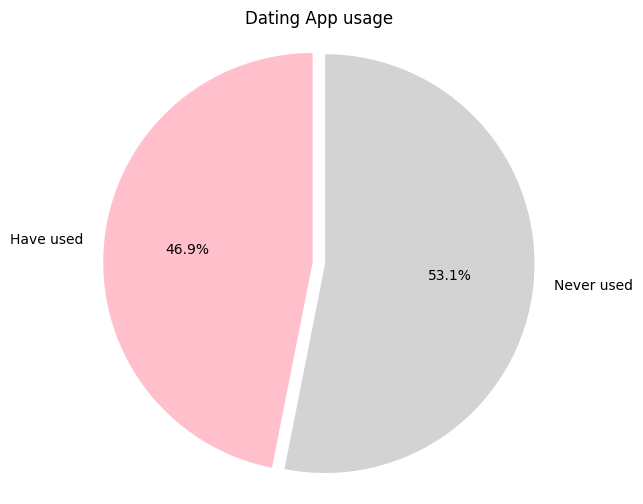

In [ ]:
# Prepare data for the pie chart
labels = ['Have used', 'Never used']
sizes = [used.shape[0], not_used.shape[0]]
colors = ['pink', 'lightgrey']  # Optional: customize colors
explode = (0.03, 0.03)  # Optional: explode the first slice

# Create the pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)  # Autopct shows percentage
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title('Dating App usage')  # Add a title

# Show the plot
plt.show()


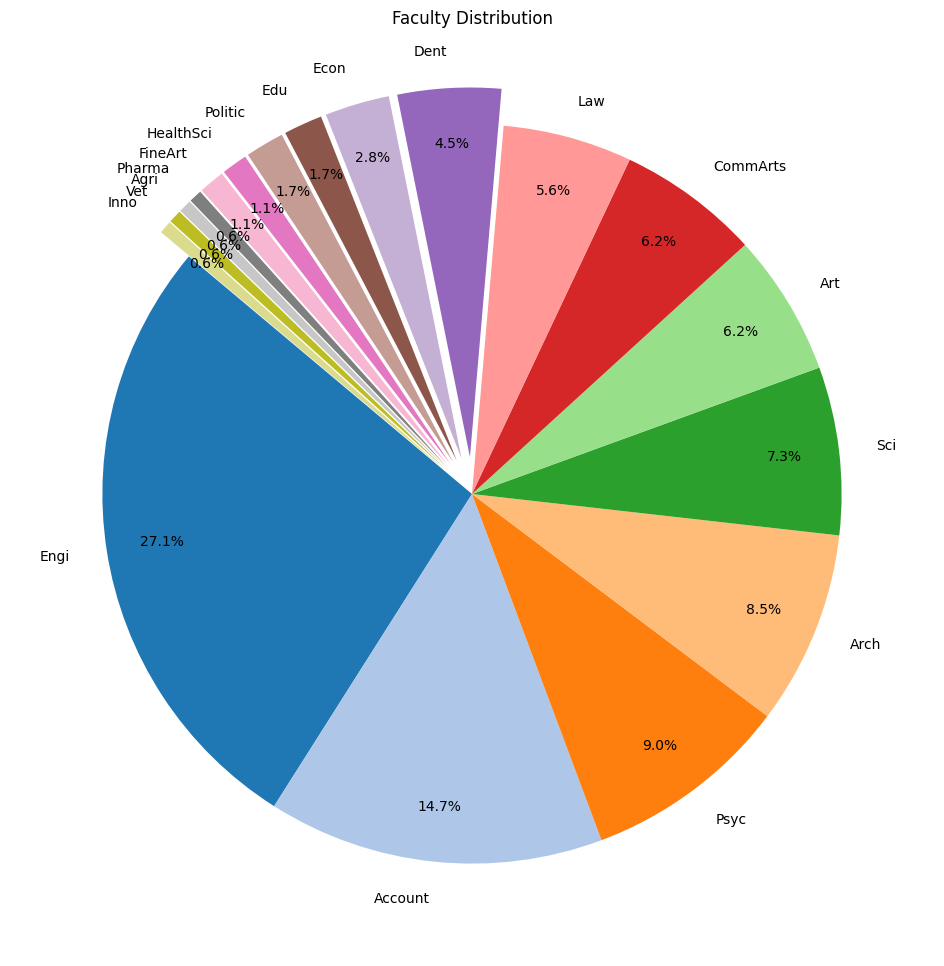

In [ ]:
# Group the data by 'Faculty' and count the occurrences of each faculty
faculty_counts = df['Faculty'].value_counts()

# Use a colormap to generate a list of colors for the pie chart
cmap = plt.get_cmap("tab20")  # Using 'tab20' for diverse colors
colors = [cmap(i) for i in range(len(faculty_counts))]

# Set an "explode" factor to highlight smaller slices
explode = [0.1 if count < 0.05 * faculty_counts.sum() else 0 for count in faculty_counts]

# Plot the pie chart with enhancements for readability
plt.figure(figsize=(12, 12))
wedges, texts, autotexts = plt.pie(
    faculty_counts,
    labels=faculty_counts.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,              # Explode small slices
    pctdistance=0.85,             # Percentage inside the pie slices
    labeldistance=1.1             # Distance of labels from the center
)

# Customize text properties for better readability
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_fontsize(10)



# Add a title
plt.title('Faculty Distribution')

# Show the pie chart
plt.show()


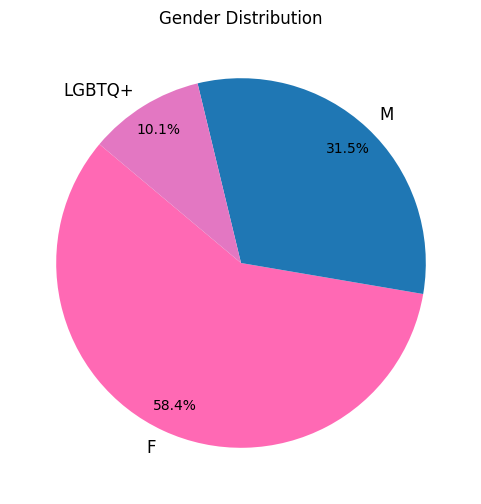

In [ ]:
# Group the data by 'Gender' and count the occurrences of each gender category
gender_counts = df['Gender'].value_counts()

# Define specific colors for each gender category
gender_colors = {
    'M': '#1f77b4',      # Blue for Male
    'F': '#ff69b4',      # Pink for Female
    'LGBTQ+': '#e377c2'  # A pleasant, inclusive purple for LGBTQ+
}

# Map colors based on gender categories
colors = [gender_colors.get(gender, '#cccccc') for gender in gender_counts.index]

# Set explode for better readability if needed
explode = [0.1 if count < 0.1 * gender_counts.sum() else 0 for count in gender_counts]

# Plot the pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    gender_counts,
    labels=gender_counts.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,           # Explode smaller slices for readability
    pctdistance=0.85,          # Position of percentage inside pie slices
    labeldistance=1.1          # Distance of labels from the center
)

# Customize text properties for readability
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(10)


# Add title
plt.title('Gender Distribution')

# Show the pie chart
plt.show()


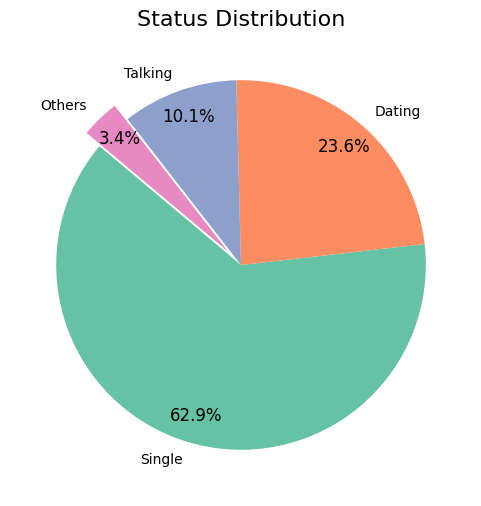

In [ ]:
# Group the data by 'Status' and count the occurrences of each status
status_counts = df['Status'].value_counts()

# Use a colormap to generate a list of colors for the pie chart
cmap = plt.get_cmap("Set2")  # Using 'Set2' for a more harmonious color palette
colors = [cmap(i) for i in range(len(status_counts))]

# Set an "explode" factor to highlight smaller slices, if needed
explode = [0.1 if count < 0.05 * status_counts.sum() else 0 for count in status_counts]

# Plot the pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    status_counts,
    labels=status_counts.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,               # Explode small slices if necessary
    pctdistance=0.85,              # Percentage inside the pie slices
    labeldistance=1.1              # Distance of labels from the center
)

# Customize text properties for readability
for text in texts:
    text.set_fontsize(10)          # Set font size for status labels
for autotext in autotexts:
    autotext.set_fontsize(12)      # Set font size for percentages

# Add a title
plt.title('Status Distribution', fontsize=16)

# Show the pie chart
plt.show()


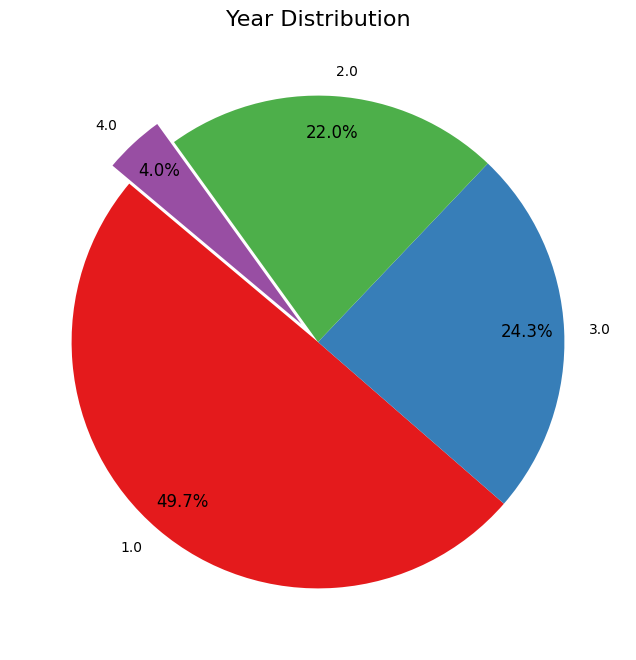

In [ ]:
# Group the data by 'Year' and count the occurrences of each year
year_counts = df['Year'].value_counts()

# Use a colormap to generate a list of colors for the pie chart
cmap = plt.get_cmap("Set1")  # Using 'Set3' for a soft, varied color palette
colors = [cmap(i) for i in range(len(year_counts))]

# Set an "explode" factor to highlight smaller slices, if needed
explode = [0.1 if count < 0.05 * year_counts.sum() else 0 for count in year_counts]

# Plot the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    year_counts,
    labels=year_counts.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,               # Explode small slices if necessary
    pctdistance=0.85,              # Percentage inside the pie slices
    labeldistance=1.1              # Distance of labels from the center
)

# Customize text properties for readability
for text in texts:
    text.set_fontsize(10)          # Set font size for year labels
for autotext in autotexts:
    autotext.set_fontsize(12)      # Set font size for percentages

# Add a title
plt.title('Year Distribution', fontsize=16)

# Show the pie chart
plt.show()


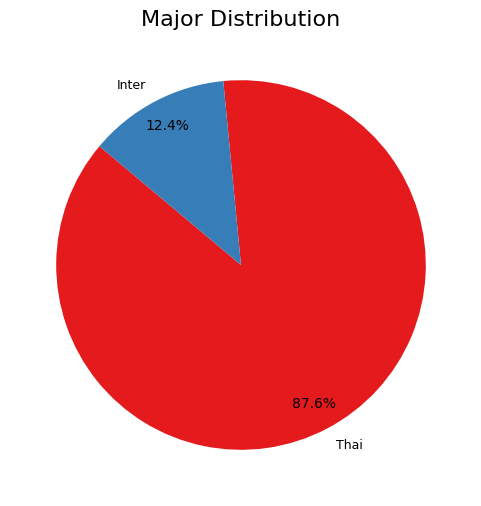

In [ ]:
# Group the data by 'Major' and count the occurrences of each major
major_counts = df['Major'].value_counts()

# Use a colormap to generate a list of colors for the pie chart
cmap = plt.get_cmap("Set1")  # Using 'tab20' for a varied set of colors
colors = [cmap(i) for i in range(len(major_counts))]

# Set an "explode" factor to highlight smaller slices if needed
explode = [0.1 if count < 0.05 * major_counts.sum() else 0 for count in major_counts]

# Plot the pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    major_counts,
    labels=major_counts.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,               # Explode small slices for readability
    pctdistance=0.85,              # Percentage inside the pie slices
    labeldistance=1.1              # Distance of labels from the center
)

# Customize text properties for better readability
for text in texts:
    text.set_fontsize(9)           # Set font size for major labels
for autotext in autotexts:
    autotext.set_fontsize(10)      # Set font size for percentages

# Add a title
plt.title('Major Distribution', fontsize=16)

# Show the pie chart
plt.show()


#####Preferred Features

In [ ]:
used['PreferredFeatures'].unique().tolist()

['คนเล่นเยอะ',
 'มีความหลากหลายสูง',
 'Secret admiral ',
 'รู้จักคนเยอะดี',
 'There are a high percentage of lesbians',
 'pick a card ดูคนที่กดถูกใจเรา (free version)',
 'Send a message',
 'ปัดได้ไว เรื่อยๆ',
 'เลือกให้คนในมหาวิทยาลัยเดียวกันขึ้นมาเยอะ ๆ ได้',
 'บอกความชอบส่วนตัวจองแต่ละคน',
 'Prompt question',
 'สามารถเจอคนได้หลากหลายและรวดเร็ว',
 'ความง่ายในการปัดและการแมช การคุยก็ทำได้สะดวกและไม่ยุ่งยาก',
 'ใช้ง่าย แค่ปัดซ้ายปัดขวา ',
 'ใช้งานง่าย',
 'Hee say,hornet :เลือกสถานที่ในmapแล้วหาคนใกล้เคียงได้ มีจำกัด ต้องซื้อหากต้องการเพิ่ม  tinder:ให้ดูคนที่ไลค์เราฟรี แต่ไม่ชอบ เพราะแอปมันกั๊ก อยากให้เราเติม',
 'จำกัดจำนวณlike',
 'ให้ดอกไม้',
 'รจำกัดจำนวนการปัดใน1วัน ',
 'Discover Feature แต่จริงๆไม่ได้ชอบอะไรขนาดนั้น ชอบสังคมที่อยู่ในแอพมากกว่า',
 'ฟีเจอร์ปัดๆหาคน',
 '-',
 'เข้าใช้งานง่าย ไม่ซับซ้อน',
 'ความใช้ง่าย สีที่โดดเด่น',
 'การกรองคนให้เหมาะกับเรา',
 'ใช้ง่าย',
 'คุ้นเคย',
 'ตอนมีคนกดไลก์เรามาก่อนจะขึ้นว่า They like you',
 'Count down time',
 'ปัดสนุก แชทไว คุยได้หลายคน',
 'ระ

GROUPING RESULT FROM CHAT GPT
1. User Experience and Accessibility

	  Ease of Use and Familiarity
	    •	ใช้งานง่าย (Easy to use)
	    •	Easy to use
	    •	ใช้ง่าย แค่ปัดซ้ายปัดขวา (Simple swipe left/right)
	    •	คุ้นเคย (Familiar)
	    •	เข้าใช้งานง่าย ไม่ซับซ้อน (Simple and straightforward access)
	    •	เล่นง่าย (Easy to play)
	    •	ชอบที่ต้อง match ทั้ง 2 ฝ่ายถึงจะคุยกันได้ (Requires mutual match to chat)
	    •	ความเป็นระเบียบ (Organized)
	    •	user active กว่าแอปอื่น (More active users compared to other apps)
	  •	Convenience and Speed
	    •	คนเล่นเยอะ (Large user base)
	    •	มีความหลากหลายสูง (High diversity)
	    •	ปัดได้ไว เรื่อยๆ (Quick and continuous swiping)
	    •	ปัดสนุก แชทไว คุยได้หลายคน (Fun swiping, quick chats, multi-conversation)
	    •	ใช้งานสะดวก (Convenient to use)
	  •	Visual and Design
	    •	ความง่ายในการปัดและการแมช การคุยก็ทำได้สะดวกและไม่ยุ่งยาก (Easy to swipe, match, and chat)
	    •	ความใช้ง่าย สีที่โดดเด่น (Ease of use, with bold colors)

2. Matching and Interaction Features

	  •	Basic and Popular Matching
	    •	ฟีเจอร์ปัดๆหาคน (Swipe feature for matching)
	    •	ปัดซ้าย ปัดขวา เป็นแอปหาคู่ที่เบสิคที่สุดที่ทุกคนน่าจะเคยได้ยิน (Basic dating app with left/right swiping)
	  •	Communication and Notifications
	    •	Prompt question
	    •	ตอนมีคนกดไลก์เรามาก่อนจะขึ้นว่า They like you (Notification for who liked us)
	    •	Send a message
	    •	Count down time
	    •	มีการกด super like ให้เค้าเห็นเรามากขึ้น (Super like for greater visibility)
	    •	การที่ต้องรอการกดไลค์เพราะทำให้เราเลือกที่เราชอบจริงๆ (Waiting for a like helps select real preferences)
	  •	Advanced Matching Features
	    •	pick a card ดูคนที่กดถูกใจเรา (Pick a card to see who liked us)
	    •	Top picks
	    •	Music Mode (Matchmaking through music)
	    •	Blind date ให้คุยโดยไม่เห็นรูปก่อน (Blind date feature for chatting without seeing photo)

3. Filtering and Demographics

	  •	User Preferences and Interest Matching
	    •	การกรองคนให้เหมาะกับเรา (Filter for compatible matches)
	    •	เลือกคนจากความชอบเราได้ (Select people based on preferences)
	    •	บอกความชอบส่วนตัวของแต่ละคน (Shows individual interests)
	    •	มีฟีเจอร์ที่ระบุบุคลิก values ต่างๆ ทำให้เข้าใจนิสัยมากขึ้น (Feature indicating values for better understanding)
	  •	Demographic and Location-Based Filtering
	    •	ตลาดแคบ (chula and bangkok universities) (Narrowed market focused on Chula and Bangkok universities)
	    •	เลือกให้คนในมหาวิทยาลัยเดียวกันขึ้นมาเยอะ ๆ ได้ (Option to prioritize people from the same university)
	    •	mutual friend เยอะ (Many mutual friends)
	    •	ระยะทาง (Shows distance)

4. Social and Community Aspects

	  •	Community Preferences
	    •	There are a high percentage of lesbians
	    •	Secret admiral
	    •	Hee say, hornet: เลือกสถานที่ใน map แล้วหาคนใกล้เคียงได้ (Hornet allows location-based search with limited use unless paid)
	    •	Discover Feature จริงๆ ชอบสังคมในแอพมากกว่า (Likes the community in the app)
	    •	Recognition and Familiarity
	    •	ชอบ demographic ของคนใช้แอปนี้ (Likes the demographic of the app users)
	    •	ดูเป็นที่รู้จักเยอะเลยลองใช้ (Seems well-known, so decided to try it)

5. Additional Features and Specific Preferences

	  •	Interactive Features
	    •	Super like ให้เค้าเห็นเรามากขึ้น (Super like for better visibility)
	    •	ให้ดอกไม้ (Gifting flowers)
	    •	ปัดสนุก แชทไว คุยได้หลายคน (Fun swiping, quick chats, multi-conversation)
	    •	คำอธิบาย สิ่งที่ชอบ (Description and likes)
	    •	Mutual friend เยอะ (Many mutual friends)
	    •	Premium or Limited Access Features
	    •	จำกัดจำนวณ like (Limits on the number of likes)
	    •	Hee say, hornet: มีจำกัด ต้องซื้อหากต้องการเพิ่ม (Hornet limits usage unless paid)
	    •	Tinder gold
	    •	Blind date ให้คุยโดยไม่เห็นรูปก่อน ตื่นเต้นดี (Exciting blind date without seeing photo)
	    •	รู้ได้เลยว่าใครกดไลก์เรา ไม่ต้องปัดให้ตรงกันถึงค่อยรู้ (Shows who liked us without matching)

Conclusion

Based on the patterns in user preferences, a dating app that excels in usability, match filtering, and engagement through exclusive features would likely appeal to this user base. Additionally, building a community-focused, diverse environment with strong privacy controls would increase user comfort and trust in the platform.

Core Feature Summary for Development:

	•	Simple, intuitive interface with swipe functionality.
	•	Comprehensive match filtering (interests, demographics, location).
	•	Engagement features (Secret Admirer, Blind Date, limited-time match prompts).
	•	Social community focus (mutual connections, diversity indicators).
	•	Privacy-oriented controls (incognito mode, selective visibility).

# Touch


In [ ]:
df1 = pd.concat([used, not_used],axis = 0)

## Purpose of use

In [ ]:
used['Year'].unique()

array([1., 2., 3., 4.])

In [ ]:
overall_used_purpose = used['PurposeOfUse']
overall_purpose = {'Serious':0, 'Casual':0, 'Friends':0, 'Hook Up':0, 'Not Sure':0, 'Others':0}
key = ['Serious', 'Casual', 'Friends', 'Hook Up', 'Not Sure']


for list_each in overall_used_purpose:
  for each in list_each:
    if each in key:
      overall_purpose[each] += 1
    else:
      overall_purpose['Others'] +=1

##### By year

In [ ]:
used_1 = used[used['Year'] == 1.0]
used_2 = used[used['Year'] == 2.0]
used_3 = used[used['Year'] == 3.0]
used_4 = used[used['Year'] == 4.0]

y1_purpose = {'Serious':0, 'Casual':0, 'Friends':0, 'Hook Up':0, 'Not Sure':0, 'Others':0}
y2_purpose = {'Serious':0, 'Casual':0, 'Friends':0, 'Hook Up':0, 'Not Sure':0, 'Others':0}
y3_purpose = {'Serious':0, 'Casual':0, 'Friends':0, 'Hook Up':0, 'Not Sure':0, 'Others':0}
y4_purpose = {'Serious':0, 'Casual':0, 'Friends':0, 'Hook Up':0, 'Not Sure':0, 'Others':0}

key = ['Serious', 'Casual', 'Friends', 'Hook Up', 'Not Sure']

for list_each in used_1['PurposeOfUse']:
  for each in list_each:
    if each in key:
      y1_purpose[each] += 1
    else:
      y1_purpose['Others'] +=1

for list_each in used_2['PurposeOfUse']:
  for each in list_each:
    if each in key:
      y2_purpose[each] += 1
    else:
      y2_purpose['Others'] +=1

for list_each in used_3['PurposeOfUse']:
  for each in list_each:
    if each in key:
      y3_purpose[each] += 1
    else:
      y3_purpose['Others'] +=1

for list_each in used_4['PurposeOfUse']:
  for each in list_each:
    if each in key:
      y4_purpose[each] += 1
    else:
      y4_purpose['Others'] +=1

In [ ]:
print(y1_purpose)

{'Serious': 16, 'Casual': 16, 'Friends': 20, 'Hook Up': 5, 'Not Sure': 10, 'Others': 2}


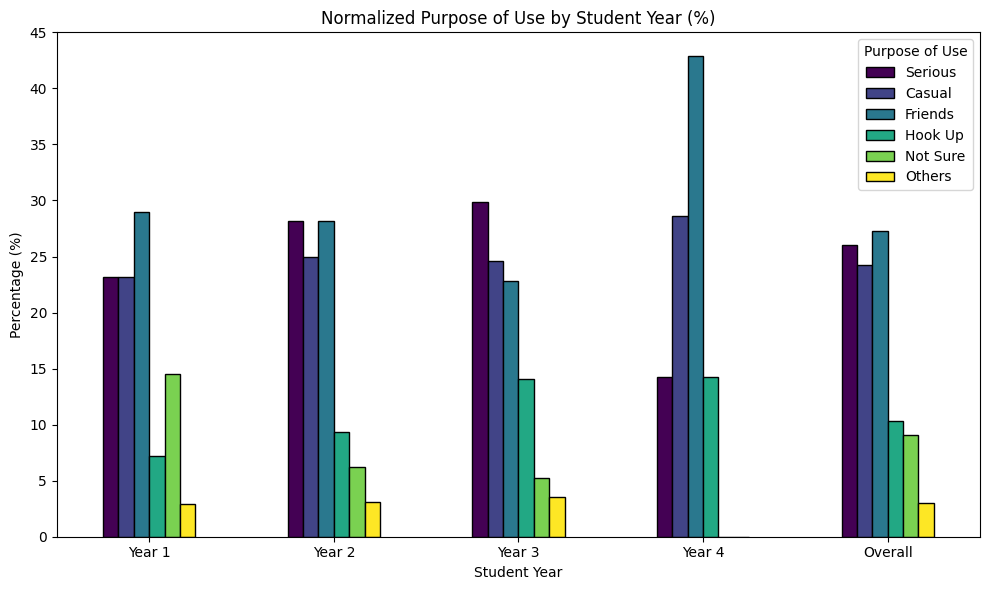

In [ ]:
# Create a DataFrame for the raw counts
purpose_df = pd.DataFrame([y1_purpose, y2_purpose, y3_purpose, y4_purpose,overall_purpose], index=['Year 1', 'Year 2', 'Year 3', 'Year 4','Overall'])

# Normalize each row by dividing by the row's total count to get proportions
purpose_df_normalized = purpose_df.div(purpose_df.sum(axis=1), axis=0) * 100  # Multiply by 100 to get percentages

# Plotting the normalized data
purpose_df_normalized.plot(kind='bar', figsize=(10, 6), colormap='viridis', edgecolor='black')

# Adding labels and title
plt.title("Normalized Purpose of Use by Student Year (%)")
plt.xlabel("Student Year")
plt.ylabel("Percentage (%)")
plt.legend(title="Purpose of Use")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
print(purpose_df)

         Serious  Casual  Friends  Hook Up  Not Sure  Others
Year 1        16      16       20        5        10       2
Year 2         9       8        9        3         2       1
Year 3        17      14       13        8         3       2
Year 4         1       2        3        1         0       0
Overall       43      40       45       17        15       5


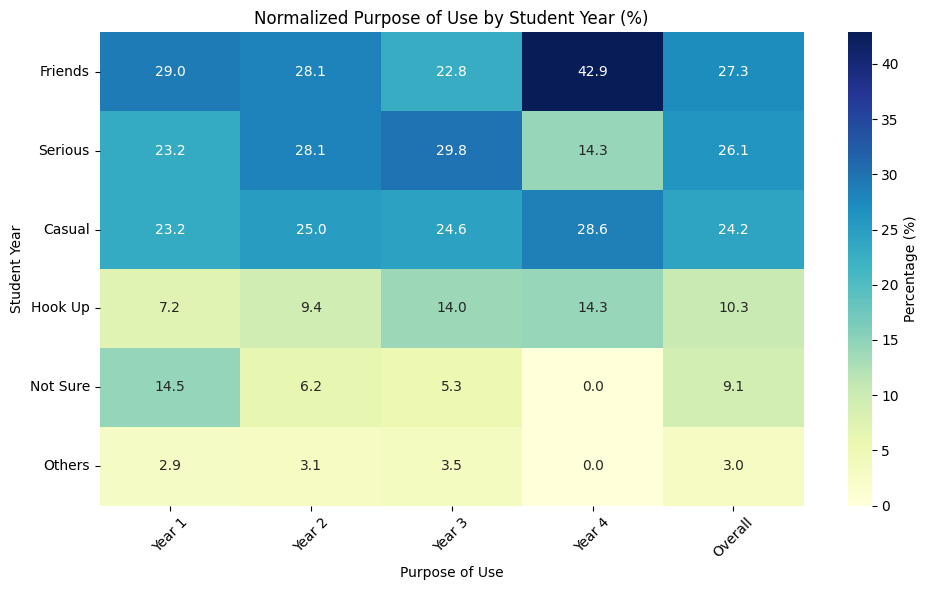

In [ ]:
# Step 1: Create a DataFrame for the raw counts
purpose_df = pd.DataFrame([y1_purpose, y2_purpose, y3_purpose, y4_purpose,overall_purpose], index=['Year 1', 'Year 2', 'Year 3', 'Year 4','Overall'])

# Step 2: Normalize each row by dividing by the row's total count to get proportions
purpose_df_normalized = purpose_df.div(purpose_df.sum(axis=1), axis=0) * 100  # Multiply by 100 to get percentages

# Step 3: Create a heatmap of the normalized data
plt.figure(figsize=(10, 6))
sns.heatmap(purpose_df_normalized.T.sort_values(by='Overall', ascending=False), annot=True, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'Percentage (%)'})

# Adding title and labels
plt.title("Normalized Purpose of Use by Student Year (%)")
plt.xlabel("Purpose of Use")
plt.ylabel("Student Year")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

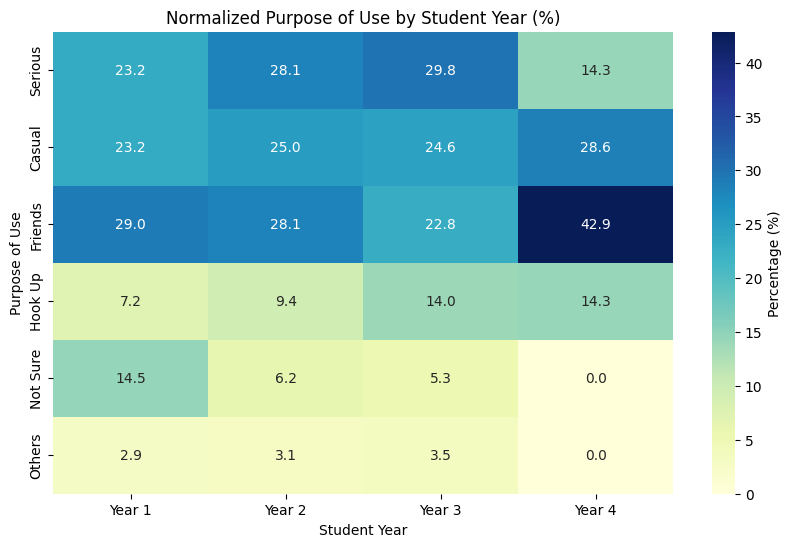

In [ ]:
# Create a DataFrame for the raw counts
purpose_df = pd.DataFrame([y1_purpose, y2_purpose, y3_purpose, y4_purpose], index=['Year 1', 'Year 2', 'Year 3', 'Year 4'])

# Normalize each row by dividing by the row's total count to get proportions
purpose_df_normalized = purpose_df.div(purpose_df.sum(axis=1), axis=0) * 100  # Multiply by 100 to get percentages

# Plotting the heatmap with years on the x-axis
plt.figure(figsize=(10, 6))
sns.heatmap(purpose_df_normalized.T, annot=True, cmap="YlGnBu", fmt=".1f", cbar_kws={'label': 'Percentage (%)'})

# Adding title and labels
plt.title("Normalized Purpose of Use by Student Year (%)")
plt.xlabel("Student Year")
plt.ylabel("Purpose of Use")
plt.show()

#### By Faculty

In [ ]:
# Count occurrences of each faculty
faculty_counts = df1['Faculty'].value_counts()

# Filter faculties with more than 3 samples
faculties_to_keep = faculty_counts[faculty_counts >= 10].index

# Create a new DataFrame with only the faculties that have more than 3 samples
filtered_used = used[used['Faculty'].isin(faculties_to_keep)]

In [ ]:
filtered_used['Faculty'].value_counts()

Faculty
Engi        17
Account     10
Psyc         8
CommArts     8
Art          7
Arch         7
Sci          6
Law          3
Name: count, dtype: int64

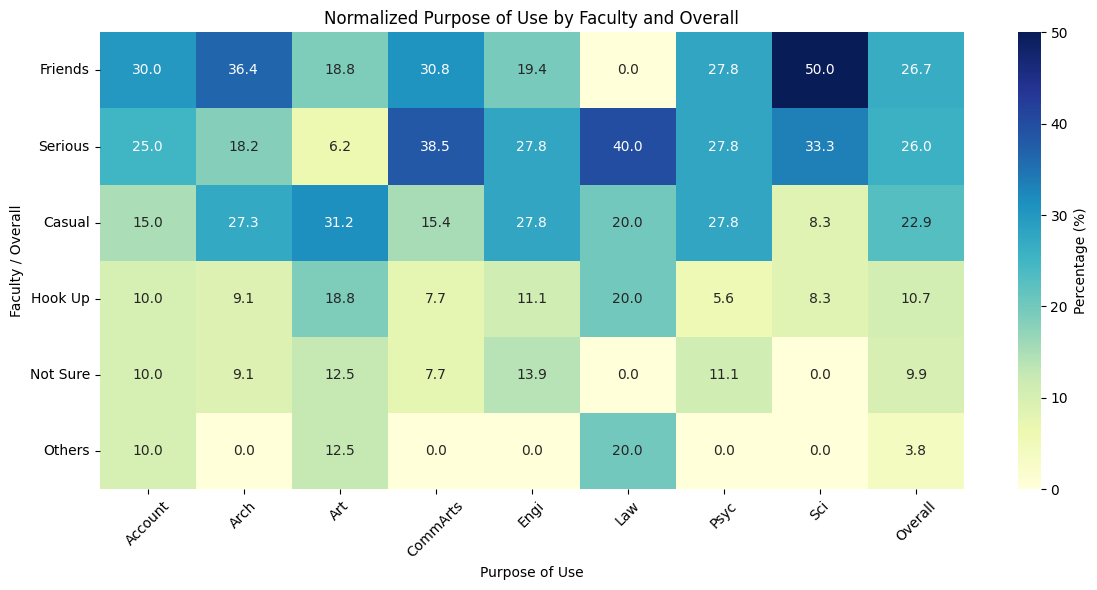

In [ ]:
# Assuming `filtered_used` is your DataFrame with 'PurposeOfUse' column

# Step 1: Explode the PurposeOfUse lists into separate rows
exploded_df = filtered_used.explode('PurposeOfUse')

# Step 2: Count occurrences of each purpose of use per faculty
purpose_counts = exploded_df.groupby(['Faculty', 'PurposeOfUse']).size().unstack(fill_value=0)

# Step 3: Calculate overall counts
overall_counts = exploded_df['PurposeOfUse'].value_counts()

# Step 4: Create a DataFrame from the overall counts and rename it
overall_df = overall_counts.rename('Overall').to_frame().T  # Transpose to match the structure

# Step 5: Combine overall counts with faculty counts using pd.concat
combined_counts = pd.concat([purpose_counts, overall_df])

# Step 6: Normalize the counts by the total count per faculty and overall
normalized_counts = combined_counts.div(combined_counts.sum(axis=1), axis=0) * 100  # Convert to percentages

# Step 7: Create a heatmap of the normalized data
plt.figure(figsize=(12, 6))
sns.heatmap(normalized_counts.T.sort_values(by='Overall', ascending=False), annot=True, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'Percentage (%)'})

# Adding title and labels
plt.title("Normalized Purpose of Use by Faculty and Overall")
plt.xlabel("Purpose of Use")
plt.ylabel("Faculty / Overall")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

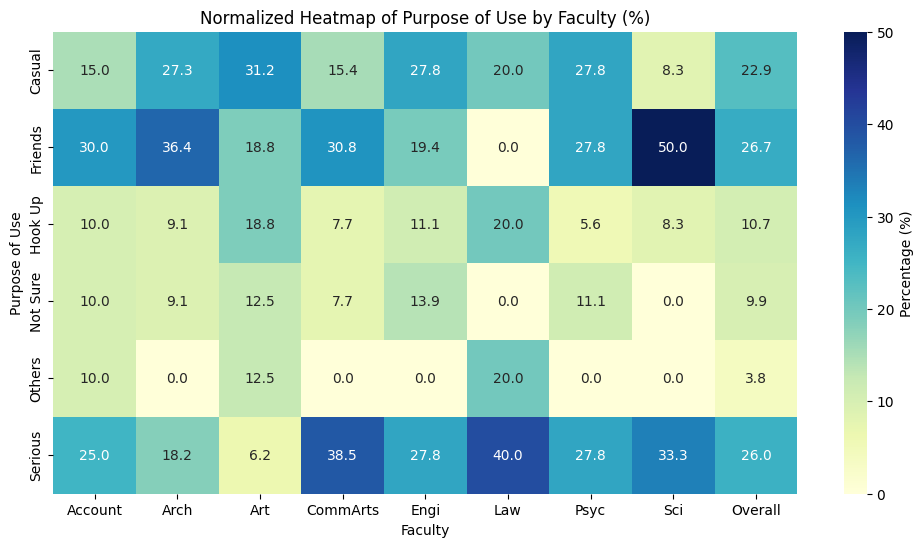

In [ ]:
# Step 4: Create a heatmap of the normalized counts with faculties on the x-axis
plt.figure(figsize=(12, 6))
sns.heatmap(normalized_counts.T, annot=True, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'Percentage (%)'})

# Adding title and labels
plt.title("Normalized Heatmap of Purpose of Use by Faculty (%)")
plt.xlabel("Faculty")
plt.ylabel("Purpose of Use")
plt.show()

#### By Major

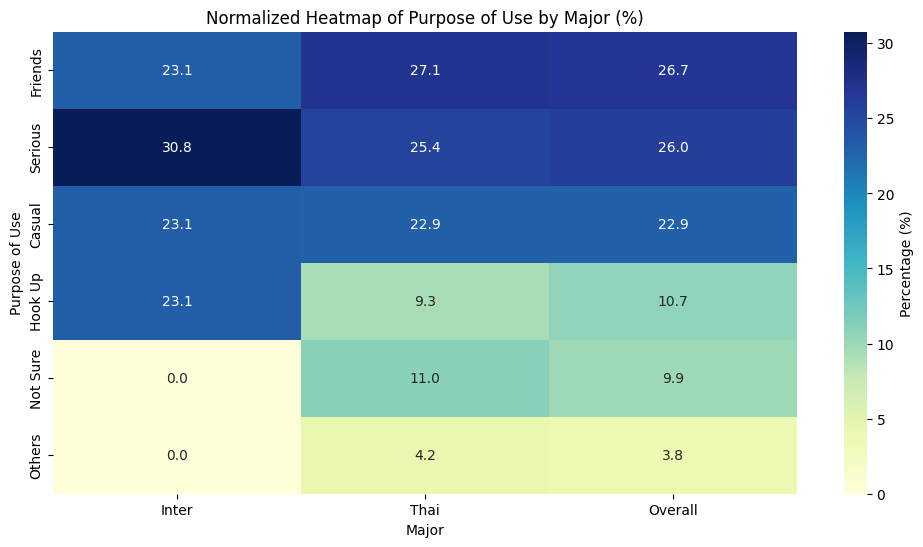

In [ ]:
# Step 2: Count occurrences of each purpose of use per faculty
purpose_counts_major = exploded_df.groupby(['Major', 'PurposeOfUse']).size().unstack(fill_value=0)

# Step 3: Calculate overall counts
overall_counts = exploded_df['PurposeOfUse'].value_counts()

# Step 4: Create a DataFrame from the overall counts and rename it
overall_df = overall_counts.rename('Overall').to_frame().T  # Transpose to match the structure

# Step 5: Combine overall counts with faculty counts using pd.concat
combined_counts = pd.concat([purpose_counts_major, overall_df])

# Step 6: Normalize the counts by the total count per faculty and overall
normalized_counts_major = combined_counts.div(combined_counts.sum(axis=1), axis=0) * 100  # Convert to percentages


# Step 4: Create a heatmap of the normalized counts with faculties on the x-axis
plt.figure(figsize=(12, 6))
sns.heatmap(normalized_counts_major.T.sort_values(by='Overall', ascending=False), annot=True, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'Percentage (%)'})

# Adding title and labels
plt.title("Normalized Heatmap of Purpose of Use by Major (%)")
plt.xlabel("Major")
plt.ylabel("Purpose of Use")
plt.show()

#### By status

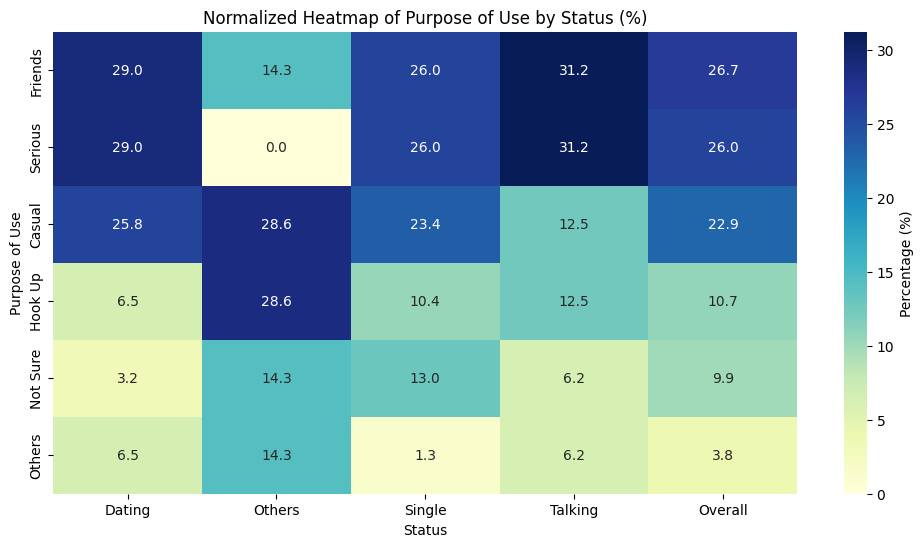

In [ ]:
# Step 2: Count occurrences of each purpose of use per faculty
purpose_counts_status = exploded_df.groupby(['Status', 'PurposeOfUse']).size().unstack(fill_value=0)

# Step 3: Calculate overall counts
overall_counts = exploded_df['PurposeOfUse'].value_counts()

# Step 4: Create a DataFrame from the overall counts and rename it
overall_df = overall_counts.rename('Overall').to_frame().T  # Transpose to match the structure

# Step 5: Combine overall counts with faculty counts using pd.concat
combined_counts = pd.concat([purpose_counts_status, overall_df])

# Step 6: Normalize the counts by the total count per faculty and overall
normalized_counts_status = combined_counts.div(combined_counts.sum(axis=1), axis=0) * 100  # Convert to percentages
# Step 4: Create a heatmap of the normalized counts with faculties on the x-axis
plt.figure(figsize=(12, 6))
sns.heatmap(normalized_counts_status.T.sort_values(by='Overall', ascending=False), annot=True, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'Percentage (%)'})

# Adding title and labels
plt.title("Normalized Heatmap of Purpose of Use by Status (%)")
plt.xlabel("Status")
plt.ylabel("Purpose of Use")
plt.show()

## Favorite App

##### By Faculty

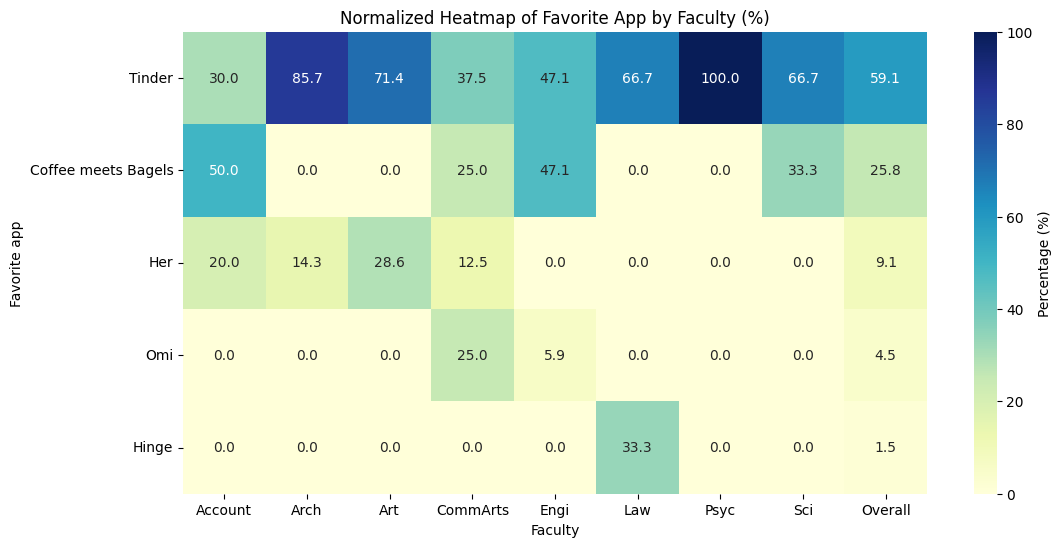

In [ ]:
# Count occurrences of each faculty
faculty_counts = df1['Faculty'].value_counts()

# Filter faculties with more than 3 samples
faculties_to_keep = faculty_counts[faculty_counts >= 10].index

# Create a new DataFrame with only the faculties that have more than 3 samples
filtered_used = used[used['Faculty'].isin(faculties_to_keep)]

# Step 1: Explode the PurposeOfUse lists into separate rows
exploded_df = filtered_used.explode('FavApp')

# Step 2: Count occurrences of each purpose of use per faculty
favapp_counts_faculty = exploded_df.groupby(['Faculty', 'FavApp']).size().unstack(fill_value=0)

# Step 3: Calculate overall counts
overall_counts = exploded_df['FavApp'].value_counts()

# Step 4: Create a DataFrame from the overall counts and rename it
overall_df = overall_counts.rename('Overall').to_frame().T  # Transpose to match the structure

# Step 5: Combine overall counts with faculty counts using pd.concat
combined_counts = pd.concat([favapp_counts_faculty, overall_df])

# Step 6: Normalize the counts by the total count per faculty and overall
normalized_counts_faculty = combined_counts.div(combined_counts.sum(axis=1), axis=0) * 100  # Convert to percentages

# Step 4: Create a heatmap of the normalized counts with faculties on the x-axis
plt.figure(figsize=(12, 6))
sns.heatmap(normalized_counts_faculty.T.sort_values(by='Overall', ascending=False), annot=True, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'Percentage (%)'})

# Adding title and labels
plt.title("Normalized Heatmap of Favorite App by Faculty (%)")
plt.xlabel("Faculty")
plt.ylabel("Favorite app")
plt.show()

##### By Gender

FavApp
Tinder                 39
Coffee meets Bagels    17
Her                     6
Omi                     3
Hinge                   1
Name: count, dtype: int64


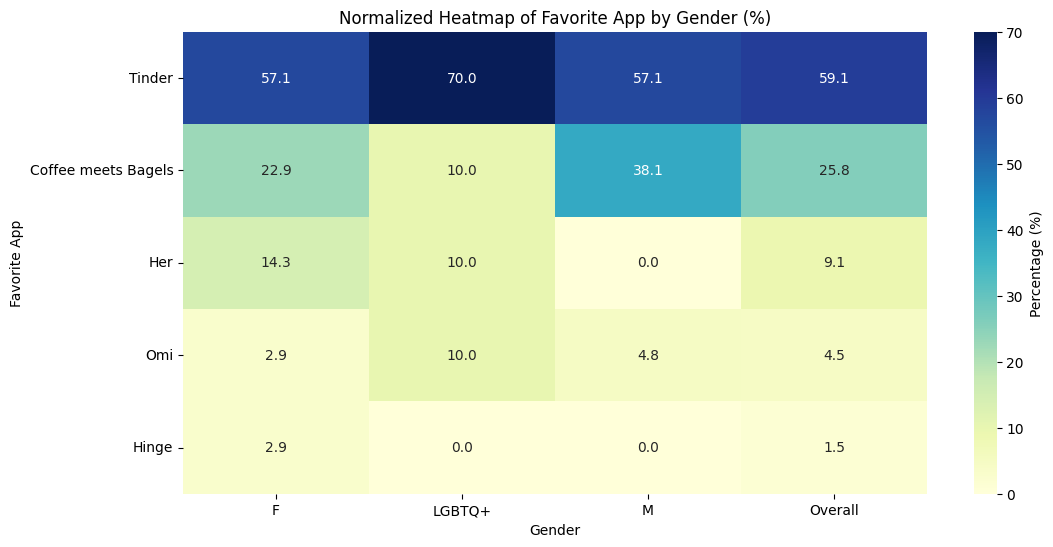

In [ ]:
# Step 1: Explode the PurposeOfUse lists into separate rows
exploded_df_gender = used.explode('FavApp')

# Step 2: Count occurrences of each purpose of use per faculty
favapp_counts_gender = exploded_df.groupby(['Gender', 'FavApp']).size().unstack(fill_value=0)

# Step 3: Calculate overall counts
overall_counts = exploded_df['FavApp'].value_counts()
print(overall_counts)
# Step 4: Create a DataFrame from the overall counts and rename it
overall_df = overall_counts.rename('Overall').to_frame().T  # Transpose to match the structure

# Step 5: Combine overall counts with faculty counts using pd.concat
combined_counts = pd.concat([favapp_counts_gender, overall_df])

# Step 6: Normalize the counts by the total count per faculty and overall
normalized_counts_gender = combined_counts.div(combined_counts.sum(axis=1), axis=0) * 100  # Convert to percentages

# Step 4: Create a heatmap of the normalized counts with faculties on the x-axis
plt.figure(figsize=(12, 6))
sns.heatmap(normalized_counts_gender.T.sort_values(by='Overall', ascending=False), annot=True, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'Percentage (%)'})

# Adding title and labels
plt.title("Normalized Heatmap of Favorite App by Gender (%)")
plt.xlabel("Gender")
plt.ylabel("Favorite App")
plt.show()

##### By year

FavApp
Tinder                 39
Coffee meets Bagels    17
Her                     6
Omi                     3
Hinge                   1
Name: count, dtype: int64


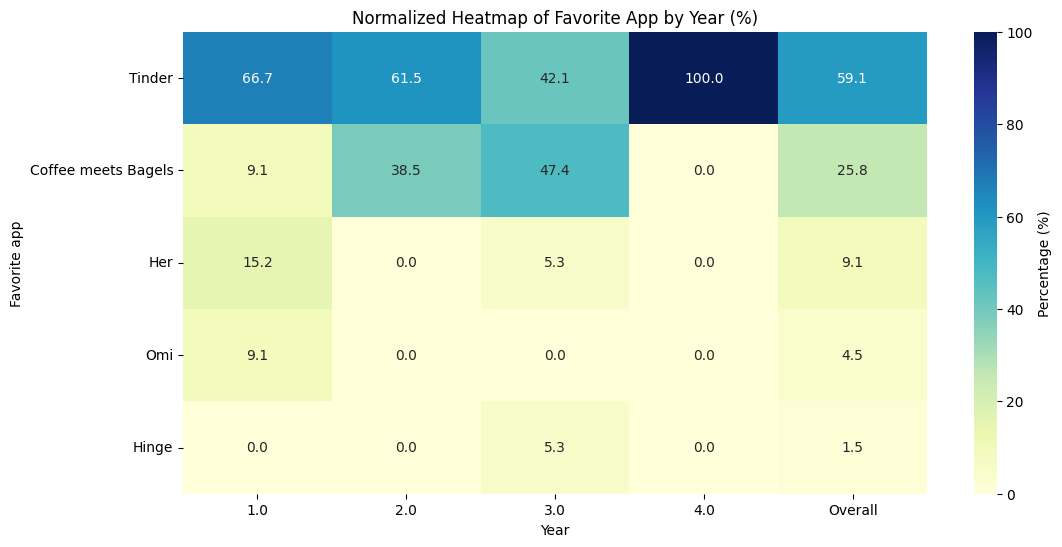

In [ ]:
# Step 1: Explode the PurposeOfUse lists into separate rows
exploded_df_gender = used.explode('FavApp')

# Step 2: Count occurrences of each purpose of use per faculty
favapp_counts_year = exploded_df.groupby(['Year', 'FavApp']).size().unstack(fill_value=0)

# Step 3: Calculate overall counts
overall_counts = exploded_df['FavApp'].value_counts()
print(overall_counts)

# Step 4: Create a DataFrame from the overall counts and rename it
overall_df = overall_counts.rename('Overall').to_frame().T  # Transpose to match the structure

# Step 5: Combine overall counts with faculty counts using pd.concat
combined_counts = pd.concat([favapp_counts_year, overall_df])

# Step 6: Normalize the counts by the total count per faculty and overall
normalized_counts_year = combined_counts.div(combined_counts.sum(axis=1), axis=0) * 100  # Convert to percentages

# Step 4: Create a heatmap of the normalized counts with faculties on the x-axis
plt.figure(figsize=(12, 6))
sns.heatmap(normalized_counts_year.T.sort_values(by='Overall', ascending=False), annot=True, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'Percentage (%)'})

# Adding title and labels
plt.title("Normalized Heatmap of Favorite App by Year (%)")
plt.xlabel("Year")
plt.ylabel("Favorite app")
plt.show()

##### By Major

FavApp
Tinder                 47
Coffee meets Bagels    25
Her                     6
Omi                     3
Bumble                  1
Hinge                   1
Name: count, dtype: int64


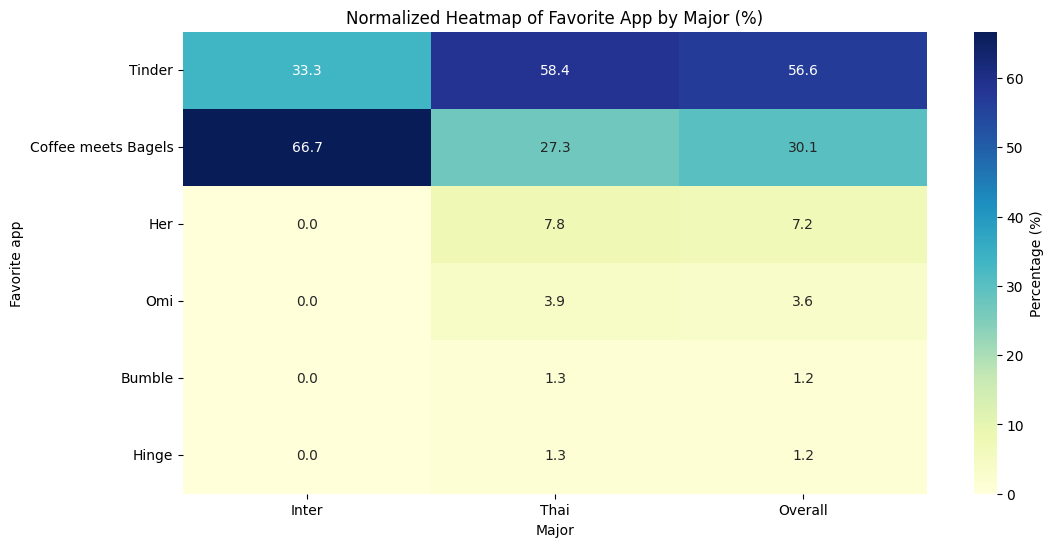

In [ ]:
# Step 1: Explode the PurposeOfUse lists into separate rows
exploded_df = used.explode('FavApp')

# Step 2: Count occurrences of each purpose of use per faculty
favapp_counts_major = exploded_df.groupby(['Major', 'FavApp']).size().unstack(fill_value=0)

# Step 3: Calculate overall counts
overall_counts = exploded_df['FavApp'].value_counts()
print(overall_counts)

# Step 4: Create a DataFrame from the overall counts and rename it
overall_df = overall_counts.rename('Overall').to_frame().T  # Transpose to match the structure

# Step 5: Combine overall counts with faculty counts using pd.concat
combined_counts = pd.concat([favapp_counts_major, overall_df])

# Step 6: Normalize the counts by the total count per faculty and overall
normalized_counts_major = combined_counts.div(combined_counts.sum(axis=1), axis=0) * 100  # Convert to percentages

# Step 4: Create a heatmap of the normalized counts with faculties on the x-axis
plt.figure(figsize=(12, 6))
sns.heatmap(normalized_counts_major.T.sort_values(by='Overall', ascending=False), annot=True, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'Percentage (%)'})

# Adding title and labels
plt.title("Normalized Heatmap of Favorite App by Major (%)")
plt.xlabel("Major")
plt.ylabel("Favorite app")
plt.show()

##### By Status

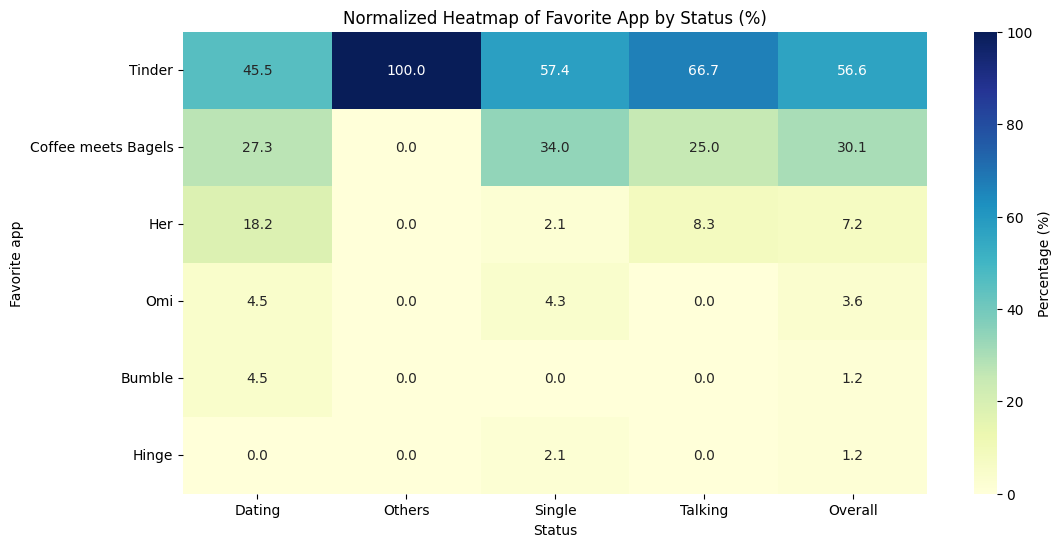

In [ ]:
# Step 1: Explode the PurposeOfUse lists into separate rows
exploded_df = used.explode('FavApp')

# Step 2: Count occurrences of each purpose of use per faculty
favapp_counts_status = exploded_df.groupby(['Status', 'FavApp']).size().unstack(fill_value=0)

# Step 3: Calculate overall counts
overall_counts = exploded_df['FavApp'].value_counts()

# Step 4: Create a DataFrame from the overall counts and rename it
overall_df = overall_counts.rename('Overall').to_frame().T  # Transpose to match the structure

# Step 5: Combine overall counts with faculty counts using pd.concat
combined_counts = pd.concat([favapp_counts_status, overall_df])

# Step 6: Normalize the counts by the total count per faculty and overall
normalized_counts_status = combined_counts.div(combined_counts.sum(axis=1), axis=0) * 100  # Convert to percentages

# Step 4: Create a heatmap of the normalized counts with faculties on the x-axis
plt.figure(figsize=(12, 6))
sns.heatmap(normalized_counts_status.T.sort_values(by='Overall', ascending=False), annot=True, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'Percentage (%)'})

# Adding title and labels
plt.title("Normalized Heatmap of Favorite App by Status (%)")
plt.xlabel("Status")
plt.ylabel("Favorite app")
plt.show()

## Favorite Features

##### GENDER

In [ ]:
preferred_features_by_gender = used.groupby('Gender')['PreferredFeatures'].apply(list).reset_index()

In [ ]:
preferred_features_by_gender

Gender                                  PreferredFeatures
0       F  [คนเล่นเยอะ, มีความหลากหลายสูง, รู้จักคนเยอะดี...
1  LGBTQ+  [Secret admiral , ใช้ง่าย แค่ปัดซ้ายปัดขวา , ใ...
2       M  [บอกความชอบส่วนตัวจองแต่ละคน, ความง่ายในการปัด...

###### Female

Groupping by CHAT GPT female

Usability

    เข้าใช้งานง่าย ไม่ซับซ้อน
    ปัดได้ไว เรื่อยๆ
    การกรองคนให้เหมาะกับเรา
    ส่งข้อความ
    ดูคนที่กดถูกใจเรา (free version)
    ปัดซ้าย ปัดขวา เป็นแอปหาคู่ที่เบสิคที่สุดที่ทุกคนน่าจะเคยได้ยิน
    ปัดเลือก
    ใช้งานสะดวก

Matching Features

    ชอบที่ต้อง match ทั้ง2ฝ่ายถึงจะคุยกันได้
    รู้ได้เลยว่าใครกดไลก์เรา ไม่ต้องปัดให้ตรงกันถึงค่อยรู้
    Prompt question
    ให้ดอกไม้
    แชท
User Engagement

    คนเล่นเยอะ
    user active กว่าแอปอื่น
    มีการกด super like ให้เค้าเห็นเรามากขึ้น
    รวดเร็วแก้เหงาทันใจ
    สุ่มคุยได้หลายคน
    ส่วนใหญ่เป็นคนโปรไฟล์ดี
    เห็นแค่ 20 คนต่อวัน
    การที่มีจำกัดเวลาแชท
Community

    มีความหลากหลายสูง
    สามารถเจอคนได้หลากหลายและรวดเร็ว
    There are a high percentage of lesbians
    คนเล่นเยอะ
    mutual friend เยอะ
    ดูเป็นที่รู้จักเยอะเลยลองใช้
    ชอบผญ
Privacy

    ข้อมูลส่วนตัวมาก
    มีการจำกัดจำนวนการปัดใน 1 วัน

SUGGESTION BY CHATGPT

Usability Features:

    User-Friendly Interface:
    Ensure the app is easy to navigate with intuitive design, allowing users to get started without confusion.
    Swipe Functionality:
    Implement a quick and engaging swiping feature (left/right) for users to browse potential matches.
    Profile Filtering:
    Allow users to filter profiles based on their preferences, ensuring they see matches that are most relevant to them.
    Visibility of Likes: Introduce a feature that shows users who liked them before they decide to swipe, enhancing engagement.
Matching Features:

    Mutual Matching Requirement:
    Require both users to express interest before they can chat, fostering more meaningful connections.
    Prompt Questions:
    Include prompts to help users express their interests and preferences, making conversations easier and more engaging.
    Gift Features:
    Introduce a virtual gift system (e.g., sending flowers) as a way for users to express interest.
User Engagement:

    Active User Engagement:
    Highlight active users to encourage more interaction. For example, show when a user has recently been online.
    Super Like Feature:
    Implement a feature that allows users to "super like" someone, increasing visibility for that user.
    Daily Limit on Swipes:
    Set a cap on the number of swipes per day to encourage thoughtful engagement rather than mindless swiping.
    Random Chats:
    Allow users to initiate random chats with new users to diversify their interactions.
Community Features:

    Diverse User Base:
    Promote a diverse range of users on the platform, perhaps by allowing users to select interests or identity markers that reflect their preferences (e.g., LGBTQ+ inclusivity).
    Visibility of Common Connections:
    Highlight mutual friends or connections to enhance trust and encourage users to engage.
Privacy and Security:

    Personal Information Control:
    Provide users with the ability to control how much personal information they share on their profiles.
    Limited Chat Time:
    Introduce a feature that allows users to chat for a limited time, encouraging them to meet in person or switch to a more permanent form of communication.

###### LGBTQ+

Grouping by GPT

Usability Features:

    Simple User Interface: ใช้ง่าย แค่ปัดซ้ายปัดขวา
    Easy to Use: ใช้งานง่าย
    Seamless Experience: เล่นง่าย
Location-Based Features:

    Map-Based Matching: Hornet: เลือกสถานที่ใน map แล้วหาคนใกล้เคียงได้ มีจำกัด ต้องซื้อหากต้องการเพิ่ม
    Distance Settings: ระยะทาง
Engagement Features:

    Blind Date Option: มี blind date ให้คุยโดยไม่เห็นรูปก่อน ตื่นเต้นดี
    Interactive Matching: ปัดจวาแมทช์ได้เลย
    User Feedback on Features: Tinder: ให้ดูคนที่ไลค์เราฟรี แต่ไม่ชอบ เพราะแอปมันกั๊ก อยากให้เราเติม
Interaction Limits:

    Like Limitations: จำกัดจำนวณ like
Personality Insights:

    Understanding Traits: มีฟีเจอร์ที่ระบุบุคลิก values ต่างๆ ทำให้เข้าใจนิสัยมากขึ้น

SUGGESTION CHAT GPT

Usability Features:

    Simple User Interface:
    Ensure that the app is straightforward and intuitive, allowing users to easily navigate with features like swiping (left/right).

    Easy Registration and Setup:
    Provide a seamless onboarding experience that allows users to quickly create profiles and start using the app without unnecessary steps.
  Location-Based Features:

    Map-Based Matching:
    Implement a feature that allows users to select locations on a map to find potential matches nearby. This can help users connect with others in their area more effectively.

    Distance Filters:
    Allow users to set preferences for how far away potential matches can be, enhancing the relevance of connections.
Engagement Features:

    Blind Date Feature:
    Introduce a blind date option where users can chat without seeing each other’s photos initially, creating an element of surprise and excitement.

    Personality Insights:
    Incorporate personality assessment features that provide insights into users' traits and values, helping them find better matches based on compatibility.
Transparent Matching Process:

    Visibility of Likes:
    Consider implementing a feature similar to Tinder where users can see who has liked them. However, ensure that the implementation does not feel restrictive or limiting, as some users have expressed dissatisfaction with apps that withhold information.

    Balanced Interaction Limits:
    Introduce reasonable limits on the number of likes or matches to encourage more thoughtful engagement without feeling overly restrictive.
Community Engagement:

    Encouraging User Feedback:
    Create avenues for users to provide feedback on the app features, helping to tailor the experience more closely to their preferences.
    
    Inclusive Community Features:
    Highlight diverse representations within the user base and ensure that marketing and features reflect the values and identities of LGBTQ+ individuals.

###### MALE

Grouping by GPT

Usability Features:

    User Preferences: บอกความชอบส่วนตัวจองแต่ละคน
    Ease of Use: ความง่ายในการปัดและการแมช การคุยก็ทำได้สะดวกและไม่ยุ่งยาก
    Prominent Design: ความใช้ง่าย สีที่โดดเด่น
    Familiarity: คุ้นเคย
    Organized Interface: ความเป็นระเบียบ
Engagement Features:

    Discover Feature: Discover Feature แต่จริงๆไม่ได้ชอบอะไรขนาดนั้น ชอบสังคมที่อยู่ในแอพมากกว่า
    Fun Swiping: ฟีเจอร์ปัดๆหาคน
    Countdown Timer: Count down time
    Multiple Conversations: ปัดสนุก แชทไว คุยได้หลายคน
Matching Features:

    Filtering Options: Filter
    Top Picks: Top picks
    Spec-based Matching: คนที่ปัดเจอตรง spec มากกว่า
    Music Mode: Music Mode (การหาคู่ด้วยเพลง)
    Awareness of Likes: รู้ว่าเขาปัดเรามาก่อน
    Selection Control: การที่ต้องรอการกดไลค์เพราะทำให้เราเลือกที่เราชอบจริงๆ
User Base and Demographics:

    Active User Base: จำนวนคนเล่นเยอะ
    Targeted Market: ตลาดแคบ (Chula and Bangkok universities)
    Demographics Preference: ชอบ demographic ของคนใช้แอปนี้
Monetization and Value:

    Affordability: ราคาเสียเงินไม่แพงมาก
    Comparison with Other Apps: รู้สึกว่า Bumble คัดคน

SUGGESTION BY GPT

Usability Enhancements:

    Customizable Preferences:
    Allow users to specify personal preferences for matches, enhancing the personalization of their experience.

    Intuitive Design:
    Ensure the app is visually appealing and easy to navigate, with prominent colors and features to draw users in.

    Organized Layout:
    Develop a clean and organized interface that allows users to find and use features effortlessly.

Engagement Features:

    Social Interaction Focus:
    Enhance social features to create a sense of community within the app, possibly through group chats or community events.

    Fun Swiping Experience:
    Maintain a light-hearted and engaging swiping feature that encourages users to explore multiple profiles quickly.

    Countdown Timers for Actions:
    Introduce countdown timers for certain actions (e.g., swiping, responding to messages) to create urgency and excitement.
Advanced Matching Capabilities:

    Enhanced Filtering:
    Provide robust filtering options to help users find matches that align closely with their preferences (e.g., interests, demographics).

    Top Picks Feature:
    Highlight top match suggestions based on user preferences and activity, enhancing the likelihood of meaningful connections.

    Music-Based Matching:
    Introduce a feature that allows users to connect based on shared musical tastes, which can be a fun conversation starter.
Demographic and Market Focus:

    Targeted User Experience:
    Cater the app's marketing and features specifically to university students in targeted areas (Chula and Bangkok) to foster a close-knit community.

    Emphasize User Demographics:
    Allow users to see demographic information about potential matches, helping them find others who share similar backgrounds or interests.
Affordability and Monetization:

    Affordable Premium Features:
    Offer premium features at a reasonable price point to encourage users to upgrade without feeling pressured.

    Value Comparison with Competitors:
    Clearly communicate the unique value propositions of your app compared to others, like Bumble, to attract users.

###### SUMMARY (common things)

GROUPING BY GPT

Usability Features:

    User-Friendly Interface:
    All groups emphasize the need for an easy-to-use and intuitive interface. Users want to navigate the app without confusion, highlighting the importance of straightforward design across all demographics.

    Ease of Swiping and Matching:
    The swiping feature is favored among all user groups, indicating a universal preference for quick and engaging interaction styles.
Engagement Features:

    Social Interaction:
    Each group expresses a desire for features that facilitate social engagement, whether through community elements, fun swiping mechanics, or quick chat options. Building a sense of community is a consistent theme.

    Active User Base:
    All groups appreciate an active user base, suggesting that users value the vibrancy of the platform and the ability to connect with many potential matches.
Matching Features:

    Enhanced Filtering Options:
    There is a shared interest in robust filtering capabilities that allow users to find matches based on specific preferences (e.g., interests, demographics). This points to a universal need for more control over the matching process.

    Awareness of Likes:
    Users across all demographics want to know who has expressed interest in them, emphasizing the importance of transparency in the matching process.
Community and Demographics:

    Targeted Marketing:
    Each group shows an inclination towards community-oriented features tailored to their demographic (e.g., university students for men and women, LGBTQ+ community features). This indicates a demand for personalized experiences based on shared backgrounds and interests.
Affordability and Value:

    Reasonable Pricing for Features: All groups suggest a preference for affordable premium features, indicating that users are more likely to engage with a platform that offers good value for money.

SUGGESTION FROM GPT

Universal Usability:

    Develop a sleek, user-friendly interface with consistent navigation and clear design elements that appeal to all user groups.
Engaging Social Features:

    Create community-driven features such as group chats or interest-based discussions to foster connections and enhance user interaction.
Customizable Matching Experience:

    Implement advanced filtering options that allow users to refine their search based on demographics, interests, and preferences, ensuring a more tailored matching experience.
Transparency in Engagement:

    Include features that allow users to see who has liked them or expressed interest, promoting a sense of transparency and encouraging users to engage with potential matches.
Value-Driven Monetization:

    Offer premium features at reasonable price points, making it attractive for users to consider upgrading while ensuring they feel they receive value from the app.
Tailored Community Experiences:

    Ensure that marketing and features reflect the diversity and specific needs of different user groups, enhancing the relevance and appeal of the app.

## Factor to like

###### By Favorite app

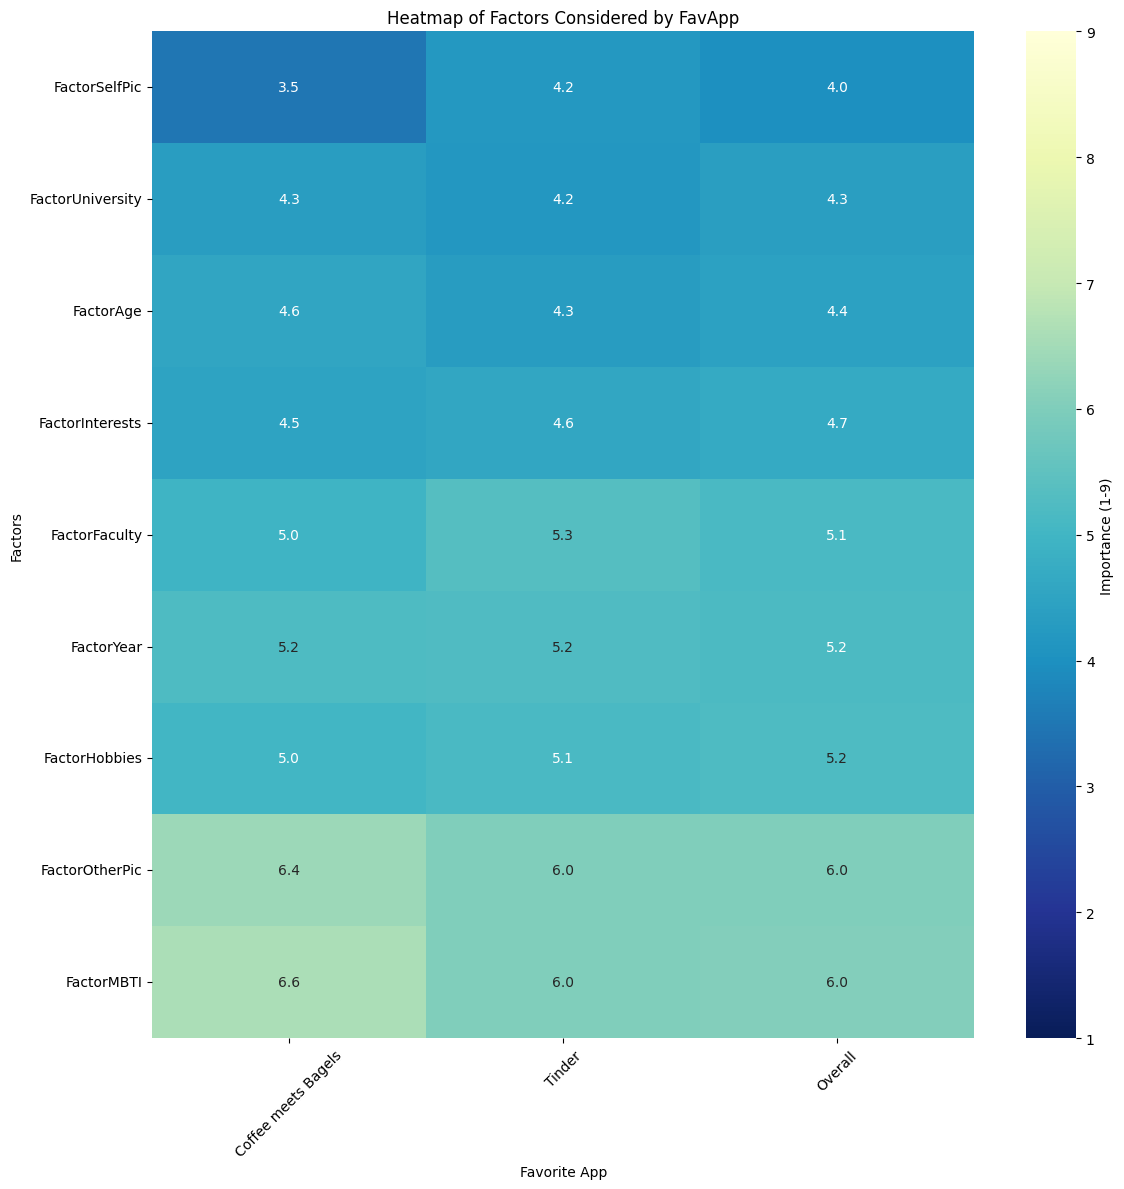

In [ ]:
# Step 1: Filter out apps with fewer than 10 entries, then group by 'FavApp' and calculate the mean for each factor
factors = ['FactorAge', 'FactorFaculty', 'FactorYear', 'FactorInterests', 'FactorHobbies', 'FactorMBTI', 'FactorUniversity', 'FactorSelfPic', 'FactorOtherPic']
app_counts = used['FavApp'].value_counts()  # Count entries for each app
filtered_apps = app_counts[app_counts >= 10].index  # Get apps with at least 10 entries
filtered_data = used[used['FavApp'].isin(filtered_apps)]  # Filter the dataset

grouped_data_favapp = filtered_data.groupby('FavApp')[factors].mean().reset_index()

# Step 2: Calculate overall averages and append to the DataFrame
overall_data = used[factors].mean().to_frame().T  # Calculate overall means and transpose
overall_data['FavApp'] = 'Overall'  # Add a column for overall label
combined_data = pd.concat([grouped_data_favapp, overall_data], ignore_index=True)  # Combine the data

# Step 3: Set the index to 'FavApp' for the heatmap
heatmap_data = combined_data.set_index('FavApp')

# Step 4: Create a heatmap with a custom color palette where lower numbers are darker red and higher numbers are light red
plt.figure(figsize=(12, 12))
sns.heatmap(heatmap_data.T.sort_values(by='Overall', ascending=True), annot=True, cmap='YlGnBu_r', fmt='.1f', cbar_kws={'label': 'Importance (1-9)'}, vmin=1, vmax=9)

# Adding title and labels
plt.title("Heatmap of Factors Considered by FavApp")
plt.ylabel("Factors")
plt.xlabel("Favorite App")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


###### By year

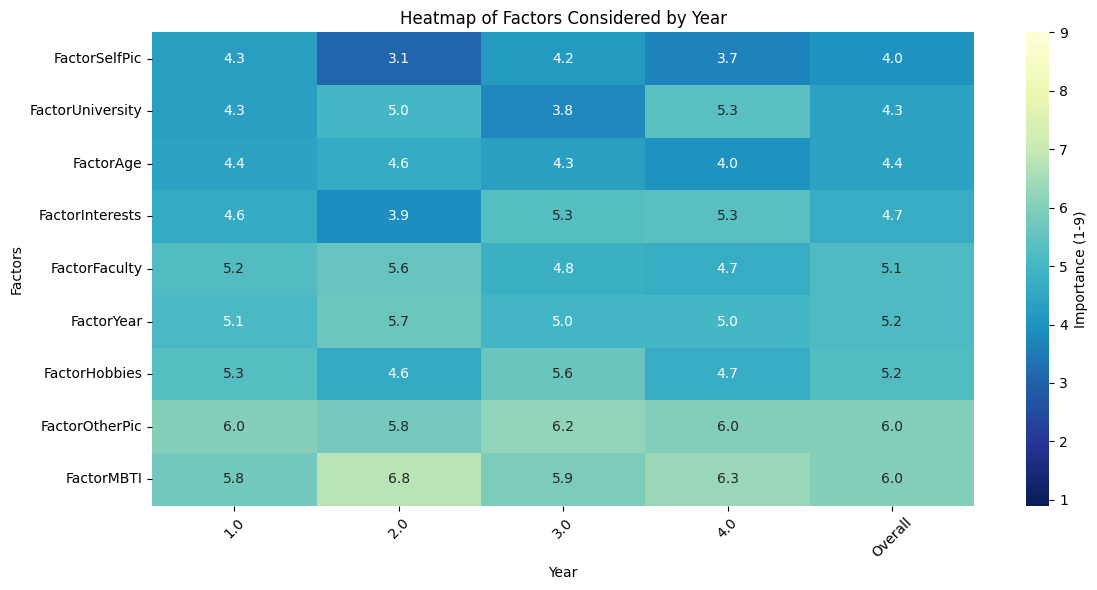

Year
1.0    38
2.0    18
3.0    24
4.0     3
dtype: int64


In [ ]:
# Assuming `used` is your DataFrame

# Step 1: Group by 'Year' and calculate the mean for each factor
factors = ['FactorAge', 'FactorFaculty', 'FactorYear', 'FactorInterests', 'FactorHobbies', 'FactorMBTI', 'FactorUniversity', 'FactorSelfPic', 'FactorOtherPic']
grouped_data_year = used.groupby('Year')[factors].mean().reset_index()

# Step 2: Calculate overall averages and append to the DataFrame
overall_data = used[factors].mean().to_frame().T  # Calculate overall means and transpose
overall_data['Year'] = 'Overall'  # Add a column for overall label
combined_data = pd.concat([grouped_data_year, overall_data], ignore_index=True)  # Combine the data

# Step 2: Set the index to 'Year' for the heatmap
heatmap_data = combined_data.set_index('Year')

# Create a heatmap with a custom color palette where lower numbers are darker red and higher numbers are light red
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.T.sort_values(by='Overall', ascending=True), annot=True, cmap='YlGnBu_r', fmt='.1f', cbar_kws={'label': 'Importance (1-9)'},vmin=9, vmax=1)

# Adding title and labels
plt.title("Heatmap of Factors Considered by Year")
plt.ylabel("Factors")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print(used.groupby('Year').size())

###### By Faculty

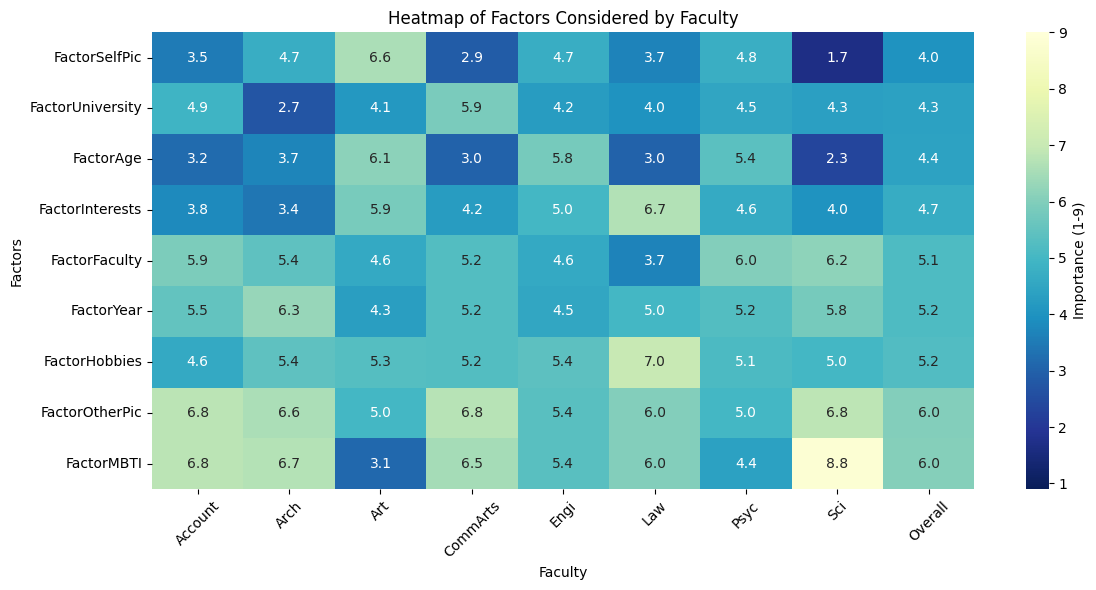

In [ ]:
# Assuming `used` is your DataFrame

# Step 1: Group by 'Faculty' and calculate the mean for each factor
factors = ['FactorAge', 'FactorFaculty', 'FactorYear', 'FactorInterests', 'FactorHobbies', 'FactorMBTI', 'FactorUniversity', 'FactorSelfPic', 'FactorOtherPic']
grouped_data_faculty = filtered_used.groupby('Faculty')[factors].mean().reset_index()

# Step 2: Calculate overall averages and append to the DataFrame
overall_data = used[factors].mean().to_frame().T  # Calculate overall means and transpose
overall_data['Faculty'] = 'Overall'  # Add a column for overall label
combined_data = pd.concat([grouped_data_faculty, overall_data], ignore_index=True)  # Combine the data

# Step 2: Set the index to 'Year' for the heatmap
heatmap_data = combined_data.set_index('Faculty')

# Create a heatmap with a custom color palette where lower numbers are darker red and higher numbers are light red
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.T.sort_values(by='Overall', ascending=True), annot=True, cmap='YlGnBu_r', fmt='.1f', cbar_kws={'label': 'Importance (1-9)'},vmin=9, vmax=1)

# Adding title and labels
plt.title("Heatmap of Factors Considered by Faculty")
plt.ylabel("Factors")
plt.xlabel("Faculty")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

###### By Major

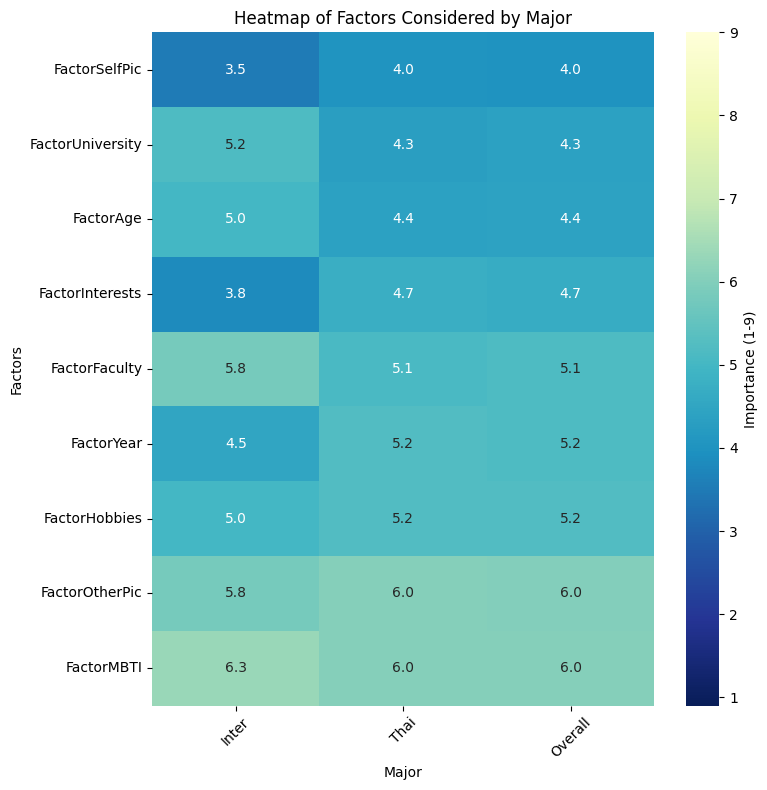

In [ ]:
# Assuming `used` is your DataFrame

# Step 1: Group by 'Major' and calculate the mean for each factor
factors = ['FactorAge', 'FactorFaculty', 'FactorYear', 'FactorInterests', 'FactorHobbies', 'FactorMBTI', 'FactorUniversity', 'FactorSelfPic', 'FactorOtherPic']
grouped_data_major = used.groupby('Major')[factors].mean().reset_index()

# Step 2: Calculate overall averages and append to the DataFrame
overall_data = used[factors].mean().to_frame().T  # Calculate overall means and transpose
overall_data['Major'] = 'Overall'  # Add a column for overall label
combined_data = pd.concat([grouped_data_major, overall_data], ignore_index=True)  # Combine the data

# Step 2: Set the index to 'Year' for the heatmap
heatmap_data = combined_data.set_index('Major')

# Create a heatmap with a custom color palette where lower numbers are darker red and higher numbers are light red
plt.figure(figsize=(8, 8))
sns.heatmap(heatmap_data.T.sort_values(by='Overall', ascending=True), annot=True, cmap='YlGnBu_r', fmt='.1f', cbar_kws={'label': 'Importance (1-9)'},vmin=9, vmax=1)

# Adding title and labels
plt.title("Heatmap of Factors Considered by Major")
plt.ylabel("Factors")
plt.xlabel("Major")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### By Status

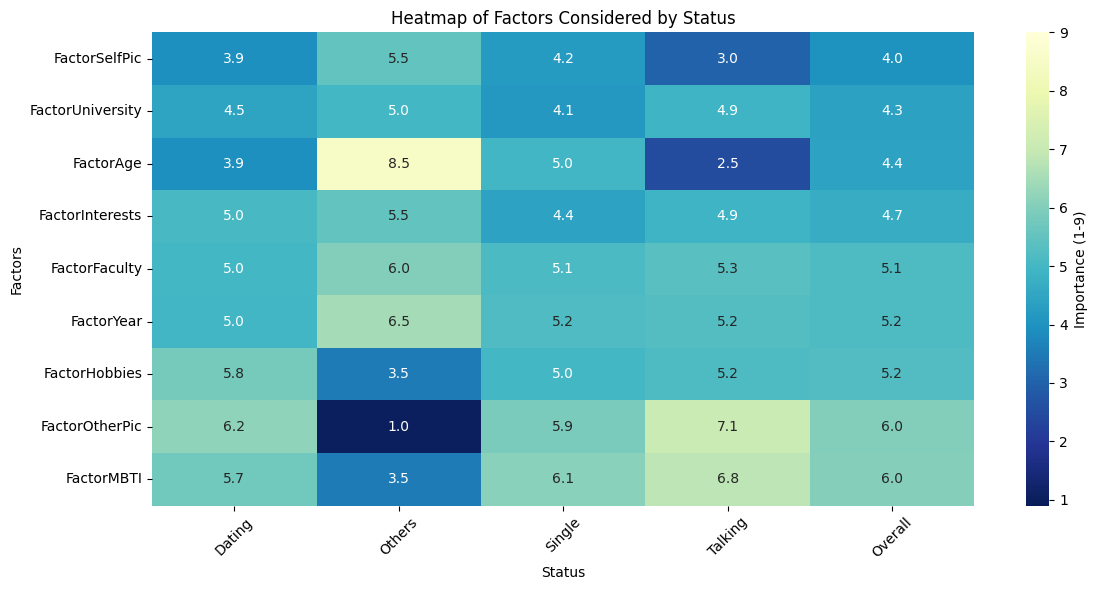

In [ ]:
# Assuming `used` is your DataFrame

# Step 1: Group by 'Status' and calculate the mean for each factor
factors = ['FactorAge', 'FactorFaculty', 'FactorYear', 'FactorInterests', 'FactorHobbies', 'FactorMBTI', 'FactorUniversity', 'FactorSelfPic', 'FactorOtherPic']
grouped_data_status = used.groupby('Status')[factors].mean().reset_index()

# Step 2: Calculate overall averages and append to the DataFrame
overall_data = used[factors].mean().to_frame().T  # Calculate overall means and transpose
overall_data['Status'] = 'Overall'  # Add a column for overall label
combined_data = pd.concat([grouped_data_status, overall_data], ignore_index=True)  # Combine the data

# Step 2: Set the index to 'Year' for the heatmap
heatmap_data = combined_data.set_index('Status')

# Create a heatmap with a custom color palette where lower numbers are darker red and higher numbers are light red
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.T.sort_values(by='Overall', ascending=True), annot=True, cmap='YlGnBu_r', fmt='.1f', cbar_kws={'label': 'Importance (1-9)'},vmin=9, vmax=1)

# Adding title and labels
plt.title("Heatmap of Factors Considered by Status")
plt.ylabel("Factors")
plt.xlabel("Status")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Microtransaction

In [ ]:
used['BoughtSubscription'].unique()

array([0, 1])

In [ ]:
used['BoughtSuperlike'].unique()

array([0, 1])

### Subscription

###### By Gender

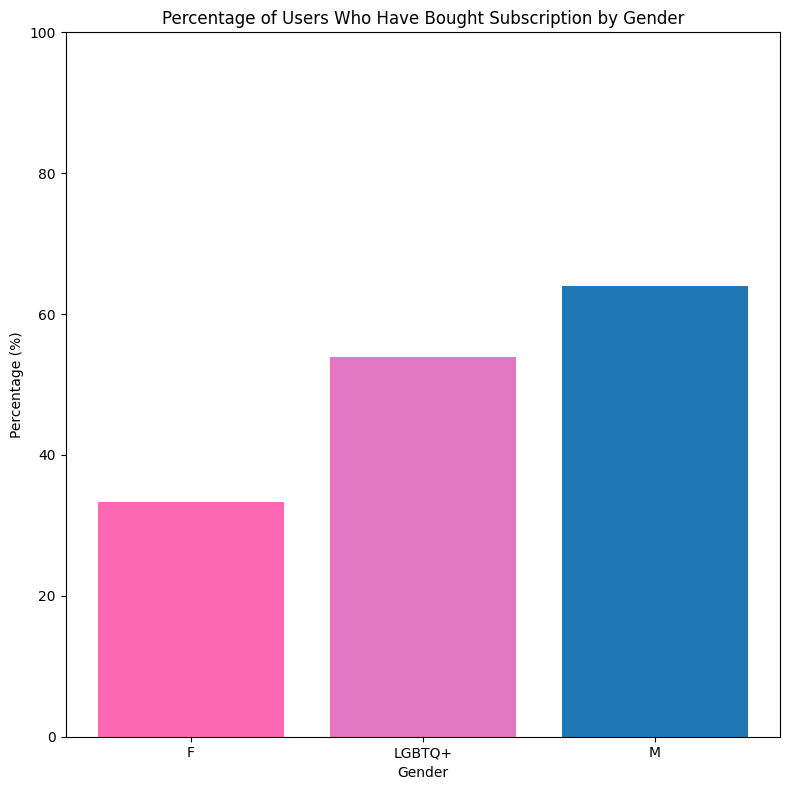

In [ ]:
# Assuming `used` is your DataFrame and it is already loaded

# Step 1: Calculate the percentage of users who have bought a subscription grouped by gender
subscription_counts = used.groupby('Gender')['BoughtSubscription'].mean() * 100

# Step 2: Convert to DataFrame for better display
subscription_percentage = subscription_counts.reset_index()
subscription_percentage.columns = ['Gender', 'Percentage of Bought Subscription']

# Define the colors for each gender (replace with your actual colors)
gender_colors = {
    'M': '#1f77b4',      # Blue for Male
    'F': '#ff69b4',      # Pink for Female
    'LGBTQ+': '#e377c2'  # A pleasant, inclusive purple for LGBTQ+
}

# Step 3: Plotting the graph with custom colors
plt.figure(figsize=(8, 8))
plt.bar(subscription_percentage['Gender'],
        subscription_percentage['Percentage of Bought Subscription'],
        color=[gender_colors[gender] for gender in subscription_percentage['Gender']])

# Adding title and labels
plt.title('Percentage of Users Who Have Bought Subscription by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
plt.tight_layout()
plt.show()


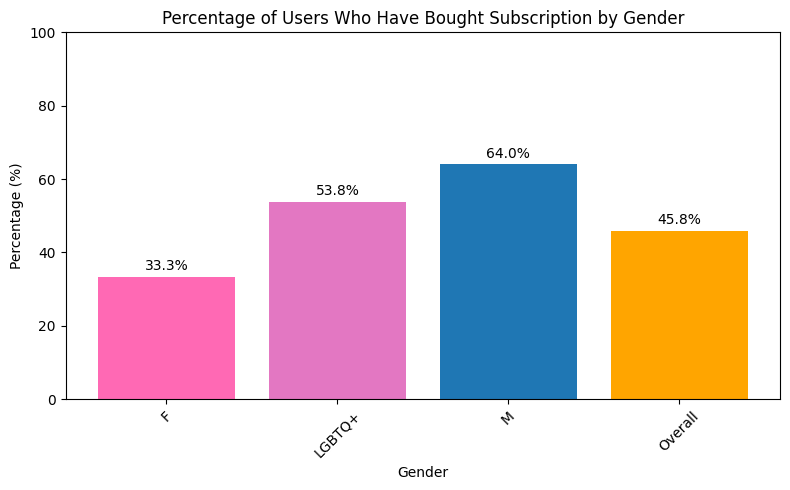

In [ ]:
# Assuming `used` is your DataFrame and it is already loaded

# Step 1: Calculate the percentage of users who have bought a subscription grouped by gender
subscription_counts = used.groupby('Gender')['BoughtSubscription'].mean() * 100

# Step 2: Convert to DataFrame for better display
subscription_percentage = subscription_counts.reset_index()
subscription_percentage.columns = ['Gender', 'Percentage of Bought Subscription']

# Step 3: Calculate the overall mean
overall_mean = used['BoughtSubscription'].mean() * 100  # Overall mean percentage
gender_colors = {
    'M': '#1f77b4',      # Blue for Male
    'F': '#ff69b4',      # Pink for Female
    'LGBTQ+': '#e377c2'  # A pleasant, inclusive purple for LGBTQ+
}

# Step 4: Append overall mean to the DataFrame
overall_row = pd.DataFrame({'Gender': ['Overall'], 'Percentage of Bought Subscription': [overall_mean]})
subscription_percentage = pd.concat([subscription_percentage, overall_row], ignore_index=True)

# Step 5: Plotting the graph with gender colors
plt.figure(figsize=(8, 5))

# Assign colors based on gender, using 'orange' for the overall mean
bar_colors = [gender_colors.get(gender, 'orange') for gender in subscription_percentage['Gender']]
bars = plt.bar(subscription_percentage['Gender'],
               subscription_percentage['Percentage of Bought Subscription'],
               color=bar_colors)

# Add data values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

# Adding title and labels
plt.title('Percentage of Users Who Have Bought Subscription by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

###### By Year

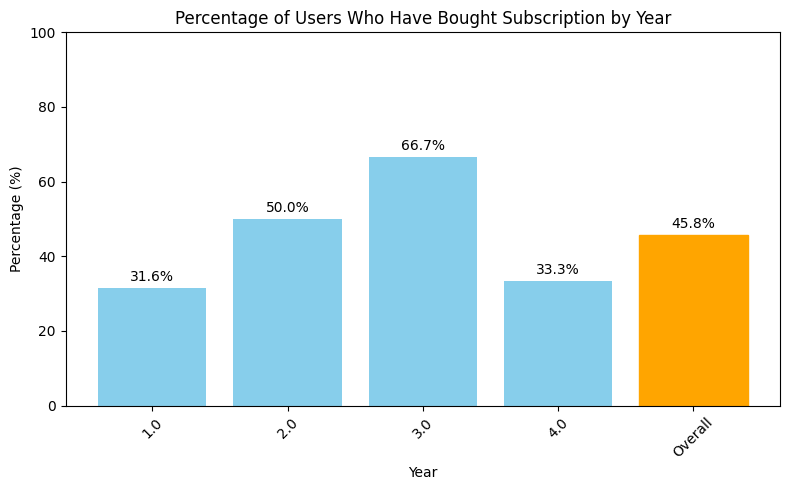

In [ ]:
# Step 1: Calculate the percentage of users who have bought a subscription grouped by Year
subscription_counts = used.groupby('Year')['BoughtSubscription'].mean() * 100

# Step 2: Convert to DataFrame for better display
subscription_percentage = subscription_counts.reset_index()
subscription_percentage.columns = ['Year', 'Percentage of Bought Subscription']

# Step 3: Calculate the overall mean
overall_mean = used['BoughtSubscription'].mean() * 100  # Overall mean percentage

# Step 4: Append overall mean to the DataFrame
overall_row = pd.DataFrame({'Year': ['Overall'], 'Percentage of Bought Subscription': [overall_mean]})
subscription_percentage = pd.concat([subscription_percentage, overall_row], ignore_index=True)

# Convert 'Year' to string to avoid type issues
subscription_percentage['Year'] = subscription_percentage['Year'].astype(str)

# Step 5: Plotting the graph
plt.figure(figsize=(8, 5))
bars = plt.bar(subscription_percentage['Year'], subscription_percentage['Percentage of Bought Subscription'], color='skyblue')

# Highlight the overall mean with a different color
bars[-1].set_color('orange')  # Change color of the overall mean bar

# Add data values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

# Adding title and labels
plt.title('Percentage of Users Who Have Bought Subscription by Year')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100

# Set x-axis ticks to be whole numbers
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

###### By Faculty

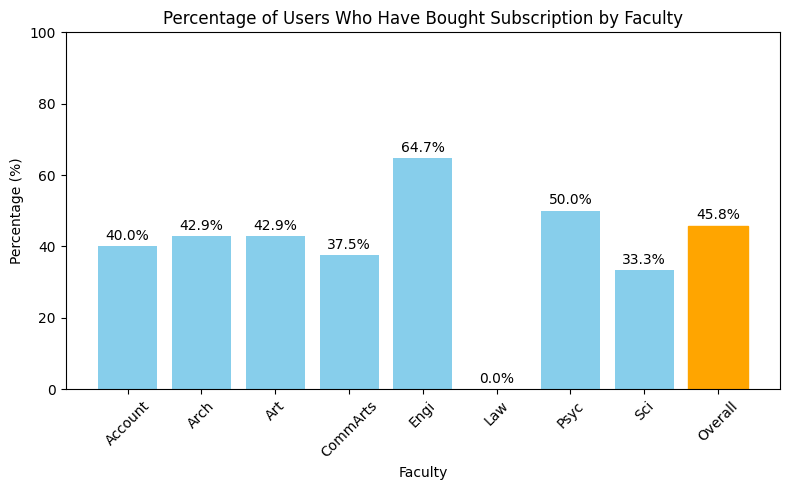

In [ ]:
# Assuming `used` is your DataFrame and it is already loaded

# Step 1: Calculate the percentage of users who have bought a subscription grouped by Year
subscription_counts = filtered_used.groupby('Faculty')['BoughtSubscription'].mean() * 100

# Step 2: Convert to DataFrame for better display
subscription_percentage = subscription_counts.reset_index()
subscription_percentage.columns = ['Faculty', 'Percentage of Bought Subscription']

# Step 3: Calculate the overall mean
overall_mean = used['BoughtSubscription'].mean() * 100  # Overall mean percentage

# Step 4: Append overall mean to the DataFrame
overall_row = pd.DataFrame({'Faculty': ['Overall'], 'Percentage of Bought Subscription': [overall_mean]})
subscription_percentage = pd.concat([subscription_percentage, overall_row], ignore_index=True)

# Step 5: Plotting the graph
plt.figure(figsize=(8, 5))
bars = plt.bar(subscription_percentage['Faculty'], subscription_percentage['Percentage of Bought Subscription'], color='skyblue')

# Highlight the overall mean with a different color
bars[-1].set_color('orange')  # Change color of the overall mean bar

# Add data values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')
# Adding title and labels
plt.title('Percentage of Users Who Have Bought Subscription by Faculty')
plt.xlabel('Faculty')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100

# Set x-axis ticks to be whole numbers
plt.xticks(ticks=subscription_percentage['Faculty'], labels=subscription_percentage['Faculty'].astype(str), rotation=45)

plt.tight_layout()
plt.show()

###### By Status

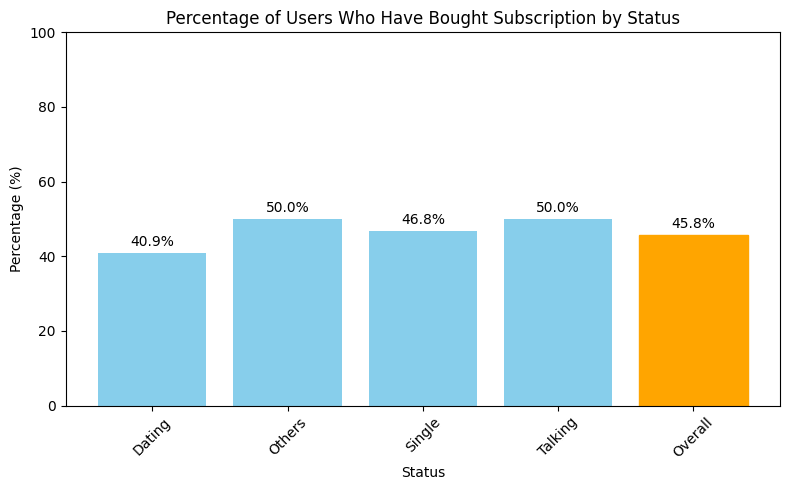

In [ ]:
# Assuming `used` is your DataFrame and it is already loaded

# Step 1: Calculate the percentage of users who have bought a subscription grouped by Year
subscription_counts = used.groupby('Status')['BoughtSubscription'].mean() * 100

# Step 2: Convert to DataFrame for better display
subscription_percentage = subscription_counts.reset_index()
subscription_percentage.columns = ['Status', 'Percentage of Bought Subscription']

# Step 3: Calculate the overall mean
overall_mean = used['BoughtSubscription'].mean() * 100  # Overall mean percentage

# Step 4: Append overall mean to the DataFrame
overall_row = pd.DataFrame({'Status': ['Overall'], 'Percentage of Bought Subscription': [overall_mean]})
subscription_percentage = pd.concat([subscription_percentage, overall_row], ignore_index=True)

# Step 5: Plotting the graph
plt.figure(figsize=(8, 5))
bars = plt.bar(subscription_percentage['Status'], subscription_percentage['Percentage of Bought Subscription'], color='skyblue')

# Highlight the overall mean with a different color
bars[-1].set_color('orange')  # Change color of the overall mean bar

# Add data values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

# Adding title and labels
plt.title('Percentage of Users Who Have Bought Subscription by Status')
plt.xlabel('Status')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100

# Set x-axis ticks to be whole numbers
plt.xticks(ticks=subscription_percentage['Status'], labels=subscription_percentage['Status'].astype(str), rotation=45)

plt.tight_layout()
plt.show()

### SuperLike

######By Gender

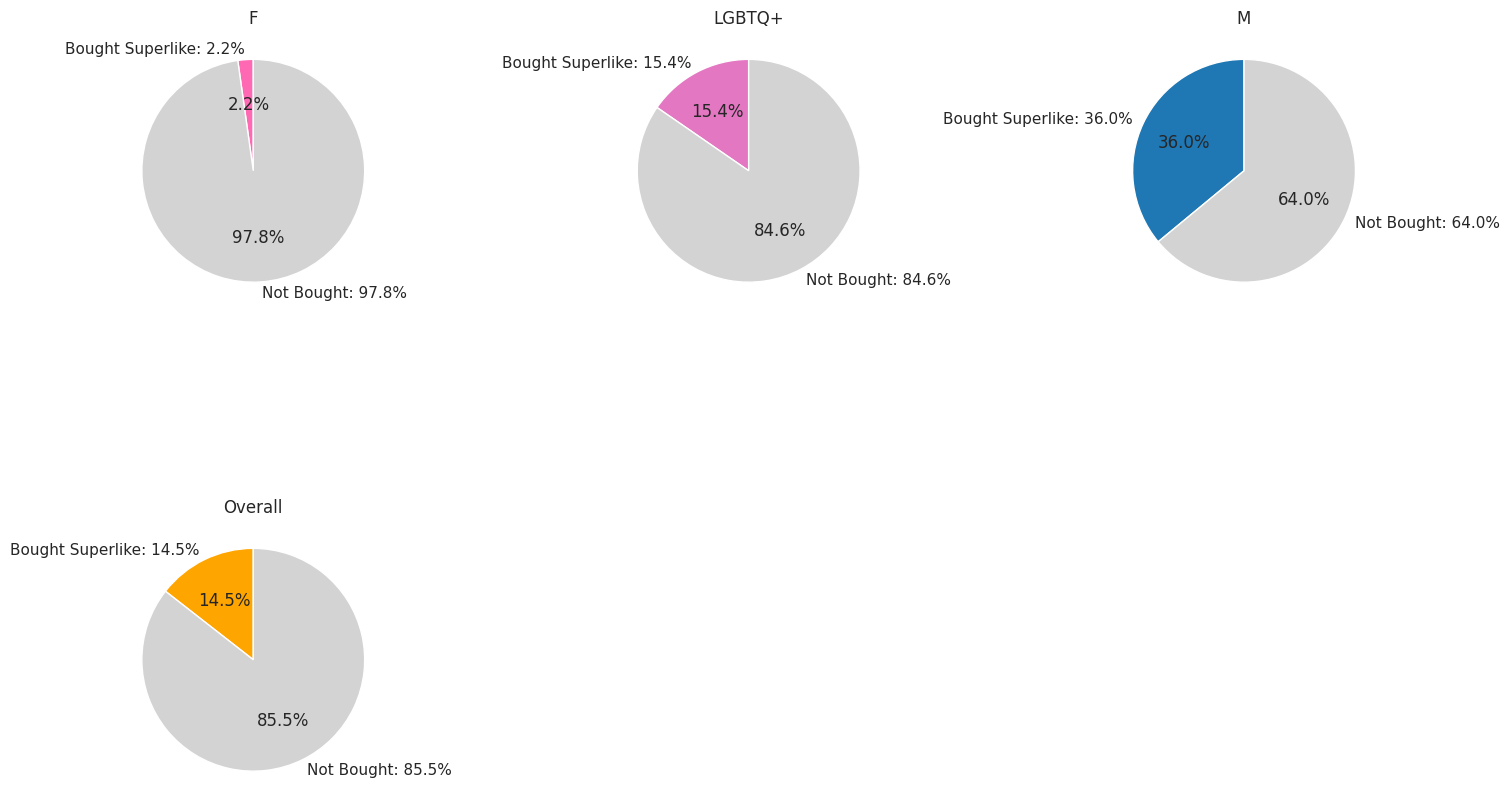

In [ ]:
# Assuming `used` is your DataFrame and it is already loaded

# Step 1: Calculate the percentage of users who have bought a Superlike grouped by gender
subscription_counts = used.groupby('Gender')['BoughtSuperlike'].mean() * 100

# Step 2: Convert to DataFrame for better display
subscription_percentage = subscription_counts.reset_index()
subscription_percentage.columns = ['Gender', 'Percentage of Bought Superlike']

# Step 3: Calculate the overall mean percentage
overall_mean = used['BoughtSuperlike'].mean() * 100  # Overall mean percentage

# Step 4: Append overall mean to the DataFrame
overall_row = pd.DataFrame({'Gender': ['Overall'], 'Percentage of Bought Superlike': [overall_mean]})
subscription_percentage = pd.concat([subscription_percentage, overall_row], ignore_index=True)

# Define the colors for each gender (replace with your actual colors)
gender_colors = {
    'M': '#1f77b4',      # Blue for Male
    'F': '#ff69b4',      # Pink for Female
    'LGBTQ+': '#e377c2',  # A pleasant, inclusive purple for LGBTQ+
    'Overall': '#ffa500'  # Orange for Overall
}

# Step 5: Plotting the pie charts
num_genders = subscription_percentage.shape[0]
num_columns = 3  # Set the number of pie charts per row
num_rows = (num_genders + num_columns - 1) // num_columns  # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 5, num_rows * 5))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for ax, (gender, percentage) in zip(axes, subscription_percentage.values):
    # Create a pie chart for each gender and overall
    ax.pie([percentage, 100 - percentage],
           labels=[f'Bought Superlike: {percentage:.1f}%', f'Not Bought: {100 - percentage:.1f}%'],
           autopct='%1.1f%%',
           startangle=90,
           colors=[gender_colors[gender], 'lightgray'])
    ax.set_title(gender)

# Hide any unused subplots if there are fewer entries than slots
for i in range(num_genders, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

###### By Year

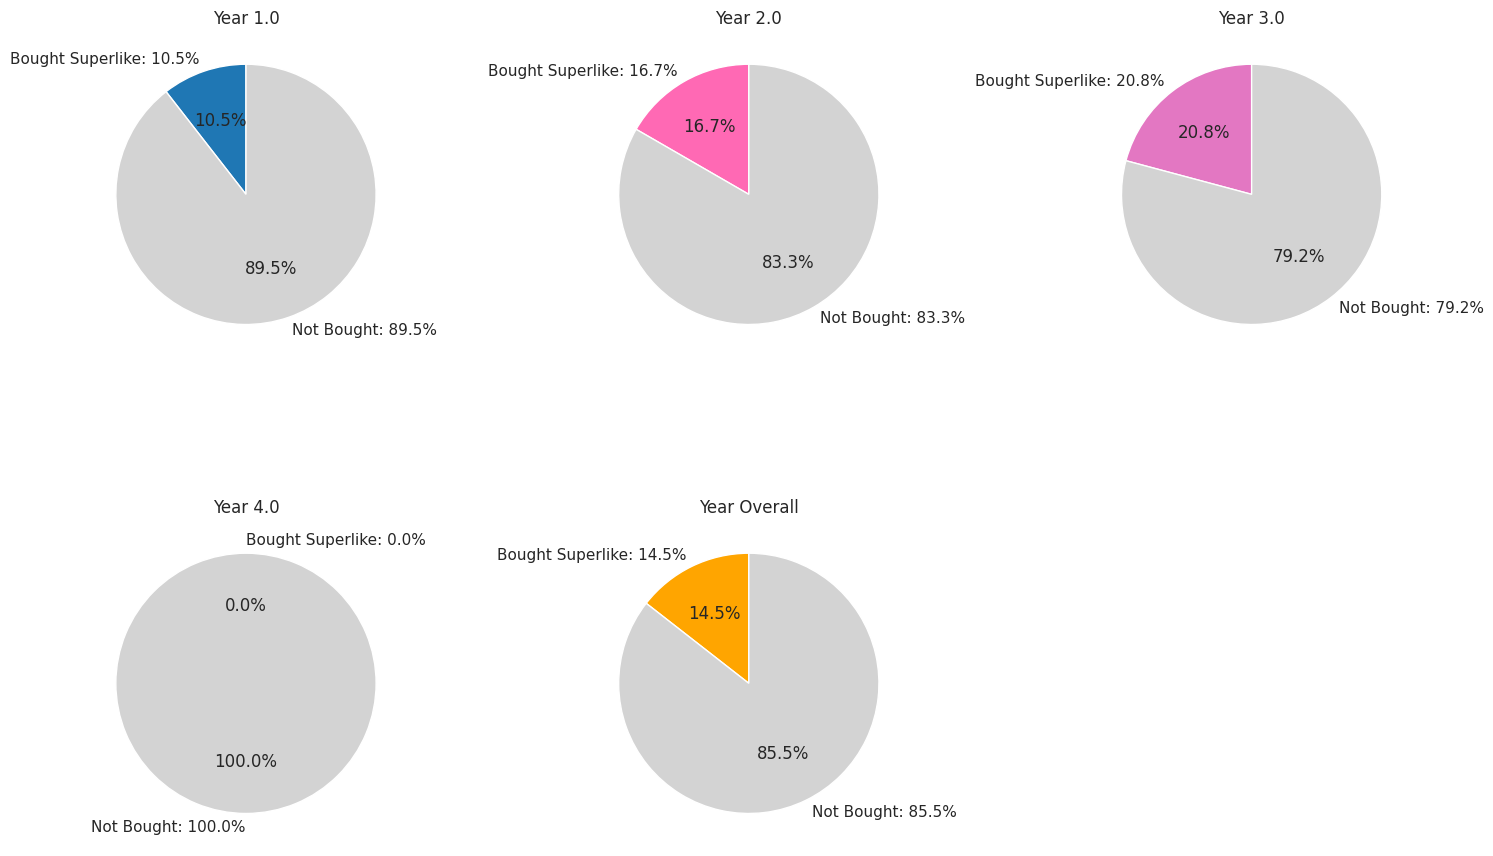

In [ ]:
# Assuming `used` is your DataFrame and it is already loaded

# Step 1: Calculate the percentage of users who have bought a Superlike grouped by Year
subscription_counts = used.groupby('Year')['BoughtSuperlike'].mean() * 100

# Step 2: Convert to DataFrame for better display
subscription_percentage = subscription_counts.reset_index()
subscription_percentage.columns = ['Year', 'Percentage of Bought Superlike']

# Step 3: Calculate the overall mean percentage
overall_mean = used['BoughtSuperlike'].mean() * 100  # Overall mean percentage

# Step 4: Append overall mean to the DataFrame
overall_row = pd.DataFrame({'Year': ['Overall'], 'Percentage of Bought Superlike': [overall_mean]})
subscription_percentage = pd.concat([subscription_percentage, overall_row], ignore_index=True)

# Define the colors for each year (replace with your actual colors)
year_colors = {
    1: '#1f77b4',      # Color for Year 1
    2: '#ff69b4',      # Color for Year 2
    3: '#e377c2',      # Color for Year 3
    4: '#ff7f0e',      # Color for Year 4
    'Overall': '#ffa500'  # Orange for Overall
}

# Step 5: Plotting the pie charts
num_years = subscription_percentage.shape[0]
num_columns = 3  # Set the number of pie charts per row
num_rows = (num_years + num_columns - 1) // num_columns  # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 5, num_rows * 5))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for ax, (year, percentage) in zip(axes, subscription_percentage.values):
    # Create a pie chart for each year and overall
    ax.pie([percentage, 100 - percentage],
           labels=[f'Bought Superlike: {percentage:.1f}%', f'Not Bought: {100 - percentage:.1f}%'],
           autopct='%1.1f%%',
           startangle=90,
           colors=[year_colors[year], 'lightgray'])
    ax.set_title(f'Year {year}')

# Hide any unused subplots if there are fewer entries than slots
for i in range(num_years, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

###### By Faculty

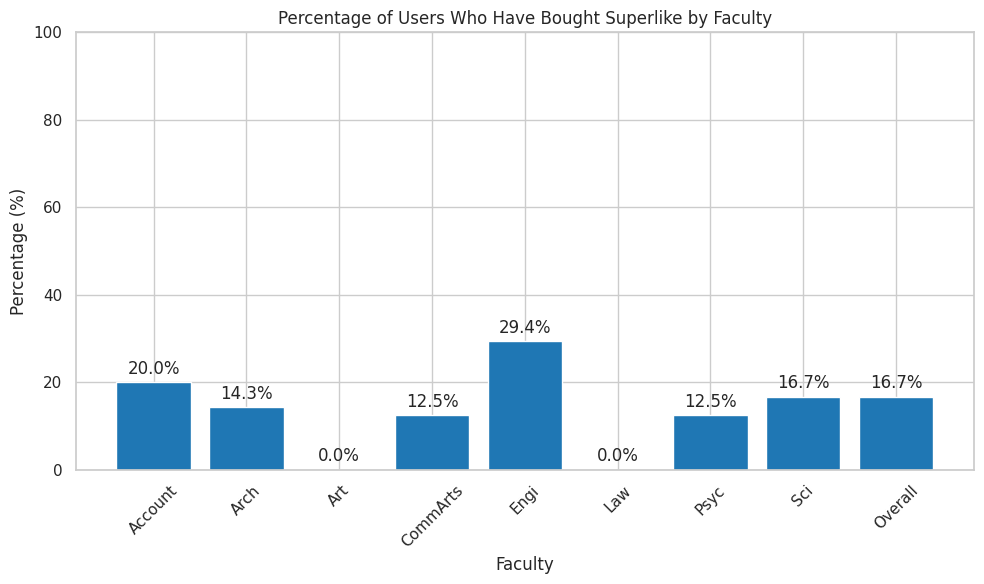

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `filtered_used` is your DataFrame and it is already loaded

# Step 1: Calculate the percentage of users who have bought a Superlike grouped by Faculty
subscription_counts = filtered_used.groupby('Faculty')['BoughtSuperlike'].mean() * 100

# Step 2: Convert to DataFrame for better display
subscription_percentage = subscription_counts.reset_index()
subscription_percentage.columns = ['Faculty', 'Percentage of Bought Superlike']

# Step 3: Calculate the overall mean percentage
overall_mean = filtered_used['BoughtSuperlike'].mean() * 100  # Overall mean percentage

# Step 4: Append overall mean to the DataFrame
overall_row = pd.DataFrame({'Faculty': ['Overall'], 'Percentage of Bought Superlike': [overall_mean]})
subscription_percentage = pd.concat([subscription_percentage, overall_row], ignore_index=True)

# Step 5: Calculate the data size for each faculty
data_sizes = filtered_used['Faculty'].value_counts().reset_index()
data_sizes.columns = ['Faculty', 'Size']
subscription_percentage = subscription_percentage.merge(data_sizes, on='Faculty', how='left')

# Step 6: Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(subscription_percentage['Faculty'], subscription_percentage['Percentage of Bought Superlike'], color='#1f77b4')

# Adding data values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

# Adding title and labels
plt.title('Percentage of Users Who Have Bought Superlike by Faculty')
plt.xlabel('Faculty')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

###### By Status

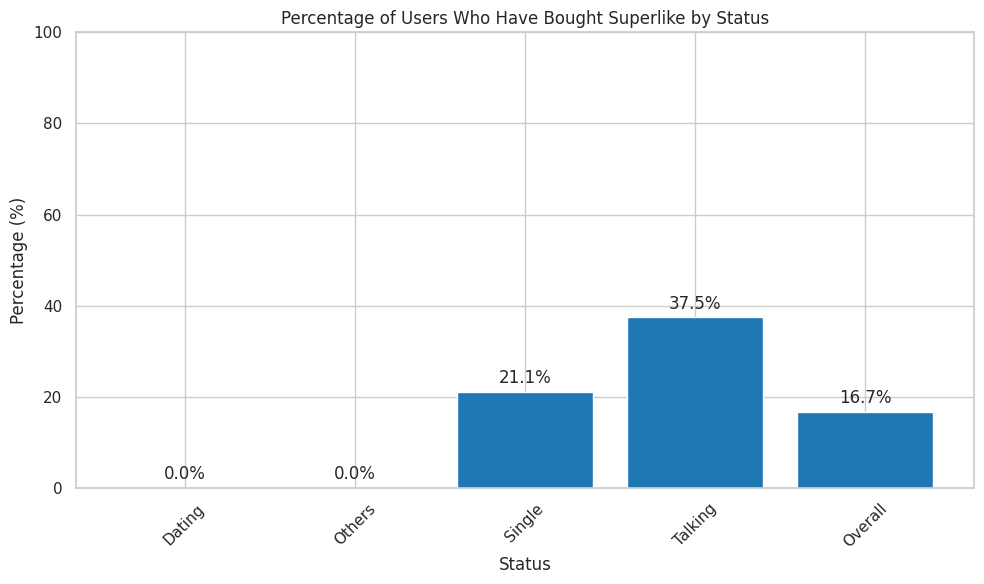

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `filtered_used` is your DataFrame and it is already loaded

# Step 1: Calculate the percentage of users who have bought a Superlike grouped by Status
subscription_counts = filtered_used.groupby('Status')['BoughtSuperlike'].mean() * 100

# Step 2: Convert to DataFrame for better display
subscription_percentage = subscription_counts.reset_index()
subscription_percentage.columns = ['Status', 'Percentage of Bought Superlike']

# Step 3: Calculate the overall mean percentage
overall_mean = filtered_used['BoughtSuperlike'].mean() * 100  # Overall mean percentage

# Step 4: Append overall mean to the DataFrame
overall_row = pd.DataFrame({'Status': ['Overall'], 'Percentage of Bought Superlike': [overall_mean]})
subscription_percentage = pd.concat([subscription_percentage, overall_row], ignore_index=True)

# Step 5: Calculate the data size for each status
data_sizes = filtered_used['Status'].value_counts().reset_index()
data_sizes.columns = ['Status', 'Size']
subscription_percentage = subscription_percentage.merge(data_sizes, on='Status', how='left')

# Step 6: Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(subscription_percentage['Status'], subscription_percentage['Percentage of Bought Superlike'], color='#1f77b4')

# Adding data values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

# Adding title and labels
plt.title('Percentage of Users Who Have Bought Superlike by Status')
plt.xlabel('Status')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

###### By Major

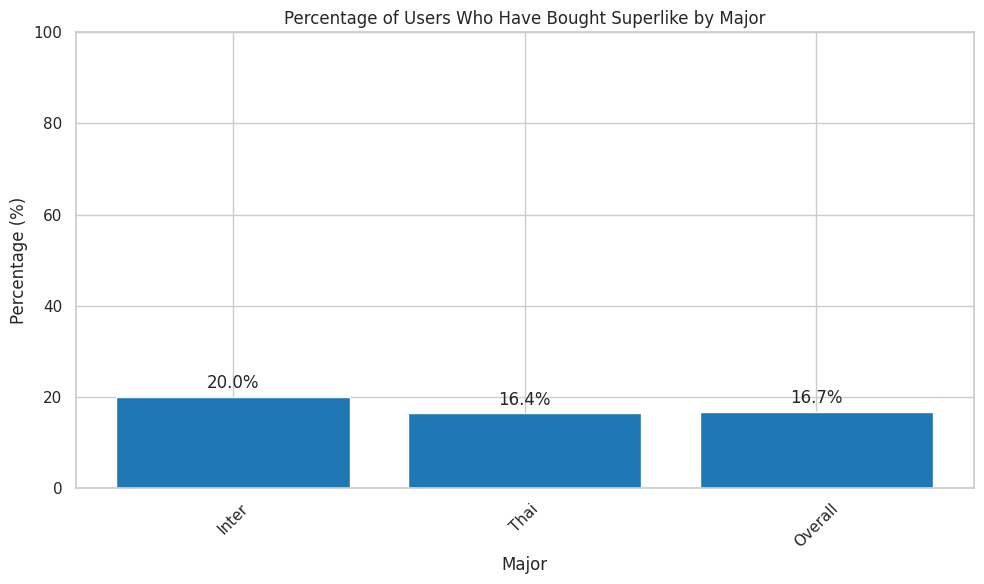

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `filtered_used` is your DataFrame and it is already loaded

# Step 1: Calculate the percentage of users who have bought a Superlike grouped by Major
subscription_counts = filtered_used.groupby('Major')['BoughtSuperlike'].mean() * 100

# Step 2: Convert to DataFrame for better display
subscription_percentage = subscription_counts.reset_index()
subscription_percentage.columns = ['Major', 'Percentage of Bought Superlike']

# Step 3: Calculate the overall mean percentage
overall_mean = filtered_used['BoughtSuperlike'].mean() * 100  # Overall mean percentage

# Step 4: Append overall mean to the DataFrame
overall_row = pd.DataFrame({'Major': ['Overall'], 'Percentage of Bought Superlike': [overall_mean]})
subscription_percentage = pd.concat([subscription_percentage, overall_row], ignore_index=True)

# Step 5: Calculate the data size for each major
data_sizes = filtered_used['Major'].value_counts().reset_index()
data_sizes.columns = ['Major', 'Size']
subscription_percentage = subscription_percentage.merge(data_sizes, on='Major', how='left')

# Step 6: Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(subscription_percentage['Major'], subscription_percentage['Percentage of Bought Superlike'], color='#1f77b4')

# Adding data values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

# Adding title and labels
plt.title('Percentage of Users Who Have Bought Superlike by Major')
plt.xlabel('Major')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

## Pain

In [ ]:
used[['PainDidntMatch', 'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo']]

PainDidntMatch  PainNoConvo  PainMetKnow  PainPercept  PainNoInfo
3                 1            1            0            1           1
4                -1            1            0            1           2
9                 2            2            0           -2           0
12                1            1            1            0           1
13                0            1            0            1           1
..              ...          ...          ...          ...         ...
172               1            2           -1           -1           0
173               2            2           -1           -1           2
174               0            1            2            2           1
176               0            1           -1            2           1
177               1            1            1           -2           1

[83 rows x 5 columns]

In [ ]:
used[['PainDidntMatch', 'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo']].mean()

PainDidntMatch    0.626506
PainNoConvo       1.373494
PainMetKnow       0.493976
PainPercept      -0.012048
PainNoInfo        0.975904
dtype: float64

###### By Gender

In [ ]:
men_pain = used[used['Gender'] == 'M'][['PainDidntMatch', 'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo']]
women_pain = used[used['Gender'] == 'F'][['PainDidntMatch', 'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo']]
lgbt_pain = used[used['Gender'] == 'LGBTQ+'][['PainDidntMatch', 'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo']]

# men_pain_others = used[used['Gender']=='M']['PainOthers']
# women_pain_others = used[used['Gender']=='F']['PainOthers']
# lgbt_pain_others = used[used['Gender']=='LGBTQ+']['PainOthers']
overall_pain_others = used['PainOthers']

men_mean_pain = men_pain.mean().sort_values(ascending=False)
women_mean_pain = women_pain.mean().sort_values(ascending=False)
lgbt_mean_pain = lgbt_pain.mean().sort_values(ascending=False)
overall_mean_pain = used[['PainDidntMatch', 'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo']].mean().sort_values(ascending=False)

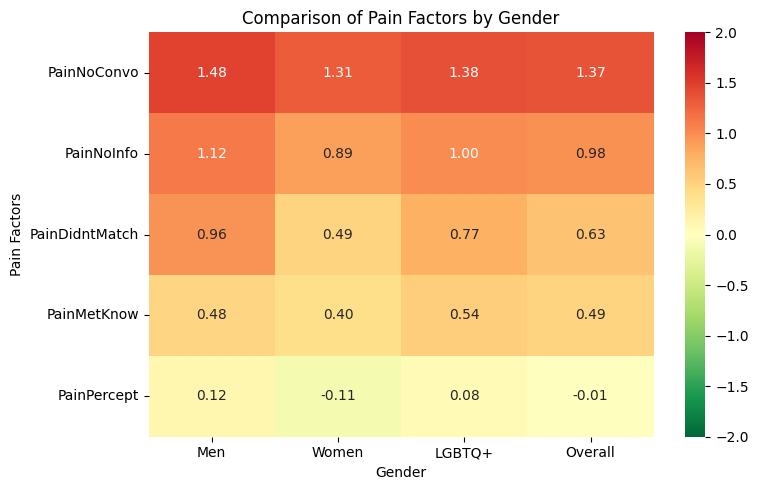

In [ ]:
# Get the pain factor categories
categories = men_mean_pain.index

# Create a DataFrame for the heatmap
data_pain_means = pd.DataFrame({
    'Men': men_mean_pain.values,
    'Women': women_mean_pain.values,
    'LGBTQ+': lgbt_mean_pain.values,
    'Overall': overall_mean_pain.values
}, index=categories)  # Set categories as the index

# Create the heatmap
plt.figure(figsize=(8, 5))  # Set the figure size
sns.heatmap(data_pain_means, annot=True, cmap='RdYlGn_r', fmt='.2f', cbar=True, vmin=-2, vmax=2)  # Create heatmap with annotations
plt.title('Comparison of Pain Factors by Gender')  # Add a title
plt.xlabel('Gender')  # Label for the x-axis
plt.ylabel('Pain Factors')  # Label for the y-axis
plt.xticks(rotation=0)  # Rotate x labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()


###### By Faculty

In [ ]:
# Assuming mean_pain_by_faculty is already calculated
mean_pain_by_faculty = used.groupby('Faculty')[['PainDidntMatch', 'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo']].mean()
used_count_by_faculty = used.groupby('Faculty')['Faculty'].count()
count_by_faculty = df.groupby('Faculty')['Faculty'].count()
print(used_count_by_faculty, count_by_faculty)

low_size_mask = (count_by_faculty >= 10)
# Filter with low_size_mask if it's defined
mean_pain_by_faculty = mean_pain_by_faculty[low_size_mask]

# Calculate overall mean across the filtered faculties
overall_mean = mean_pain_by_faculty.mean()

# Create a new DataFrame for the overall mean
overall_mean_df = pd.DataFrame(overall_mean).T
overall_mean_df.index = ['Overall']  # Set the index name

# Concatenate the overall mean with the existing DataFrame
mean_pain_by_faculty_with_overall = pd.concat([mean_pain_by_faculty, overall_mean_df])

# Print the updated DataFrame
print(mean_pain_by_faculty_with_overall)


Faculty
Account      10
Agri          1
Arch          7
Art           7
CommArts      8
Dent          3
Econ          4
Edu           2
Engi         17
FineArt       1
HealthSci     2
Law           3
Politic       3
Psyc          8
Sci           6
Vet           1
Name: Faculty, dtype: int64 Faculty
Account      26
Agri          1
Arch         15
Art          11
CommArts     11
Dent          8
Econ          5
Edu           3
Engi         48
FineArt       2
HealthSci     2
Inno          1
Law          10
Pharma        1
Politic       3
Psyc         16
Sci          13
Vet           1
Name: Faculty, dtype: int64
          PainDidntMatch  PainNoConvo  PainMetKnow  PainPercept  PainNoInfo
Account         0.300000     1.400000     0.800000     0.000000    0.100000
Arch            0.000000     1.142857     1.142857     0.000000    0.857143
Art             0.142857     1.285714     0.000000     0.142857    1.142857
CommArts        1.375000     1.875000    -0.125000    -0.375000    1.250000
Engi

<ipython-input-98-cd944ef9eb8b>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_pain_by_faculty = mean_pain_by_faculty[low_size_mask]


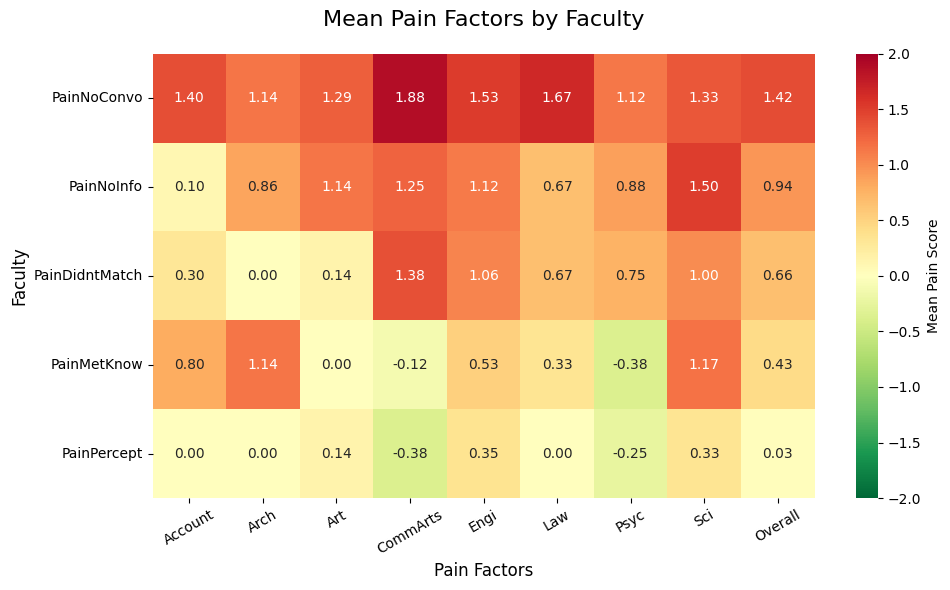

In [ ]:
# Set up the figure size for the heatmap
plt.figure(figsize=(10, 6))

# Create the heatmap with the custom color map
sns.heatmap(mean_pain_by_faculty_with_overall.T.sort_values(by='Overall', ascending=False),  # Transpose the DataFrame
            annot=True,
            cmap="RdYlGn_r",
            center=0,
            cbar_kws={'label': 'Mean Pain Score'},
            fmt=".2f",
            vmin=-2,
            vmax=2)

# Customize the plot
plt.title("Mean Pain Factors by Faculty", fontsize=16, pad=20)
plt.xlabel("Pain Factors", fontsize=12)
plt.ylabel("Faculty", fontsize=12)
plt.xticks(rotation=30)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to fit labels

# Display the heatmap
plt.show()


###### By year

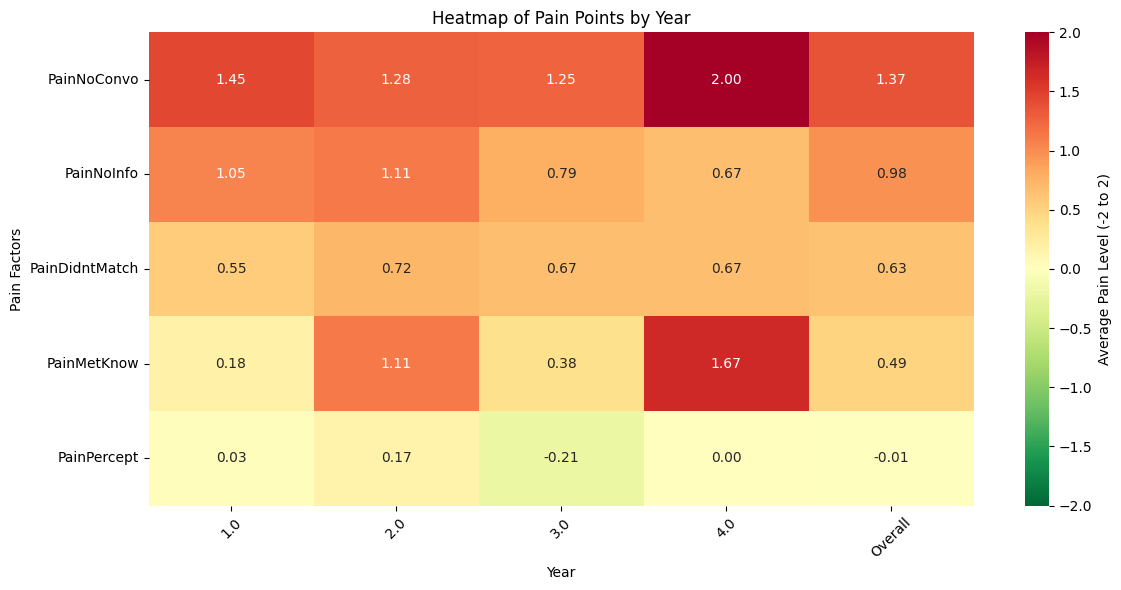

In [ ]:
# Step 1: Calculate the mean for each pain factor grouped by Year
pain_factors = ['PainDidntMatch', 'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo']
grouped_data = used.groupby('Year')[pain_factors].mean().reset_index()


# Step 2: Calculate overall means and append to the DataFrame
overall_data = used[pain_factors].mean().to_frame().T  # Calculate overall means and transpose
overall_data['Year'] = 'Overall'  # Add a column for overall label
combined_data = pd.concat([grouped_data, overall_data], ignore_index=True)  # Combine the data

# Step 3: Set the index to 'Year' for the heatmap and transpose the data
heatmap_data = combined_data.set_index('Year').T

# Step 4: Create a heatmap with Years on the x-axis
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.sort_values(by='Overall', ascending=False), annot=True, cmap='RdYlGn_r', fmt='.2f', cbar_kws={'label': 'Average Pain Level (-2 to 2)'}, vmin=-2, vmax=2)

# Adding title and labels
plt.title("Heatmap of Pain Points by Year")
plt.xlabel("Year")
plt.ylabel("Pain Factors")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)    # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()

###### By Major

In [ ]:
# Assuming mean_pain_by_major is already calculated
mean_pain_by_major = used.groupby('Major')[['PainDidntMatch', 'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo']].mean()

# Calculate overall mean across all majors
overall_mean = mean_pain_by_major.mean()
# Step 2: Calculate overall means and append to the DataFrame
overall_data = used[pain_factors].mean().to_frame().T  # Calculate overall means and transpose
overall_data['Year'] = 'Overall'  # Add a column for overall label
combined_data = pd.concat([grouped_data, overall_data], ignore_index=True)  # Combine the data

# Create a new DataFrame for the overall mean
overall_mean_df = pd.DataFrame(overall_mean).T
overall_mean_df.index = ['Overall']  # Set the index name

# Concatenate the overall mean with the existing DataFrame
mean_pain_by_major_with_overall = pd.concat([mean_pain_by_major, overall_mean_df])

# Print the updated DataFrame
print(mean_pain_by_major_with_overall)

         PainDidntMatch  PainNoConvo  PainMetKnow  PainPercept  PainNoInfo
Inter          0.833333     1.333333    -0.333333    -0.333333    0.833333
Thai           0.610390     1.376623     0.558442     0.012987    0.987013
Overall        0.721861     1.354978     0.112554    -0.160173    0.910173


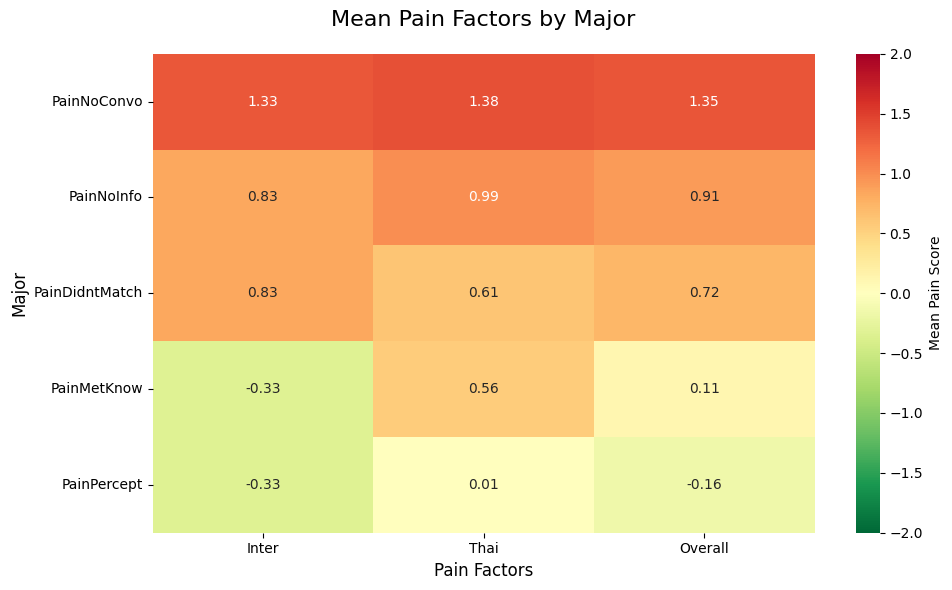

In [ ]:
# Set up the figure size for the heatmap
plt.figure(figsize=(10, 6))

# Create the heatmap with the custom color map
sns.heatmap(mean_pain_by_major_with_overall.T.sort_values(by='Overall', ascending=False), annot=True, cmap="RdYlGn_r", center=0,
            cbar_kws={'label': 'Mean Pain Score'}, fmt=".2f", vmin=-2, vmax=2)

# Customize the plot
plt.title("Mean Pain Factors by Major", fontsize=16, pad=20)  # Updated title
plt.xlabel("Pain Factors", fontsize=12)
plt.ylabel("Major", fontsize=12)  # Updated y-label
plt.tight_layout()  # Adjust layout to fit labels

# Display the heatmap
plt.show()


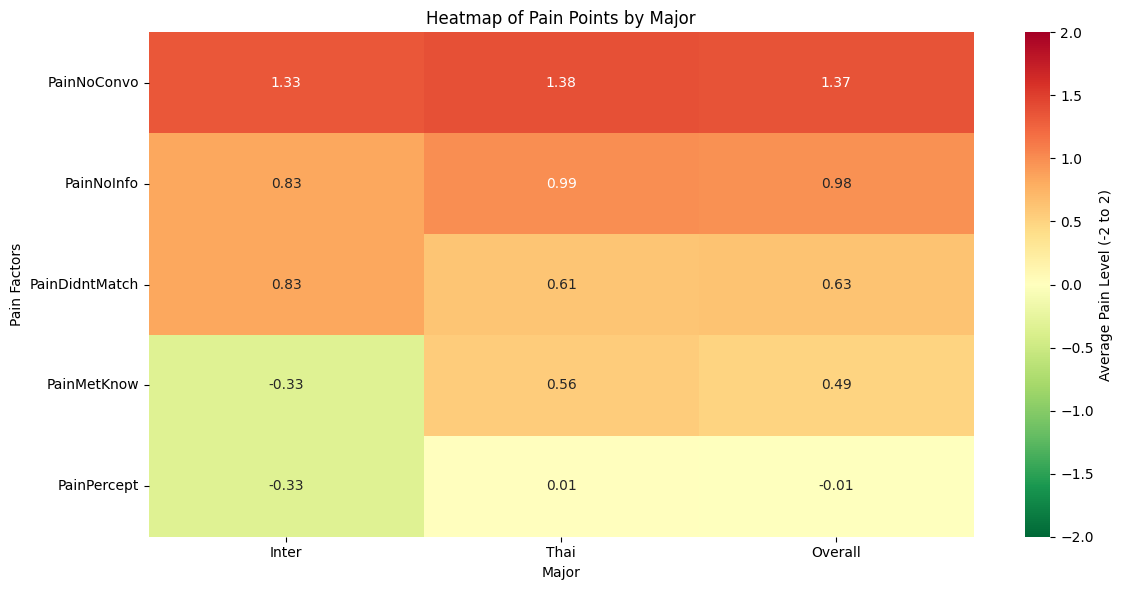

In [ ]:
# Step 1: Calculate the mean for each pain factor grouped by Major
pain_factors = ['PainDidntMatch', 'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo']
grouped_data_major = used.groupby('Major')[pain_factors].mean().reset_index()

# Step 2: Calculate overall means and append to the DataFrame
overall_data_major = used[pain_factors].mean().to_frame().T  # Calculate overall means and transpose
overall_data_major['Major'] = 'Overall'  # Add a column for overall label
combined_data_major = pd.concat([grouped_data_major, overall_data_major], ignore_index=True)  # Combine the data

# Step 3: Set the index to 'Major' for the heatmap and transpose the data
heatmap_data_major = combined_data_major.set_index('Major').T

# Step 4: Create a heatmap with Majors on the x-axis
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_major.sort_values(by='Overall', ascending=False), annot=True, cmap='RdYlGn_r', fmt='.2f', cbar_kws={'label': 'Average Pain Level (-2 to 2)'}, vmin=-2, vmax=2)

# Adding title and labels
plt.title("Heatmap of Pain Points by Major")
plt.xlabel("Major")
plt.ylabel("Pain Factors")
  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)    # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()


##### Other Pain

PAIN OTHERS combined all genders: analyze by CHAT GPT

the answer can be grouped into these

Authenticity and Mismatched Expectations: (ส่วนมากคือไม่ตรงปก)

	'catfishing'
	"People sometimes don't use their real pictures and put so much efforts to look aesthetic on social which contrast to their real lives"
	'ไม่ตรงปก'
	'รูปไม่ตรงปก'
	'แมทช์แล้วไม่ค่อยคุย ภาพไม่ตรงปก'
	'เอารูปปลอมมาใส่ มาเล่นเพื่อจุดประสงค์ไม่ดีอื่นๆ ซึ่งตามแต่ละคาแรคเตอร์ของแอปจะมี%ต่างกันในเรื่องนี้'
	'Avatar'
Safety and Trust Issues:

	'เจอคนแปลกๆน่ากลัว'
	'Safety ครับ บางครั้งมันไม่สะอาด/อันตราย ครับ'
	'รำคาญพวกแอคเค่อมุ่งนัดเยที่ไม่ใส่รูปไม่มีข้อมูลไรเลย เล่นทำไม😭'
Lack of Serious Engagement:

	'หาคนจริงจังได้ยาก'
	'matchแล้วมีบทสนทนาเพียงแค่ไม่กี่วัน ก็จบแล้ว'
	'คุยไม่เก่ง ไม่กล้าทัก'
	'ไม่มีการตอบกลับ'
	'โดนอันแมชโดยไม่ทราบสาเหตุ คนที่คุยด้วยไม่ตอบแชท'
	'ต่อบทสนทนาไม่ได้'
Repetitive or Poor Matching Algorithms:

	'แอปขึ้นคนเดิมซ้ำมาทั้งๆที่ปัดไปแล้ว'
	'Tinder can’t search university so it’s hard to see each person by the way I use tinder platinum'
Reputation and Privacy Concerns:

	'เจอคนรู้จัก+เสียภาพลักษณ์'
Technical Issues:

	'ปัญหาทางเทคนิค'
	'การใช้โค้ดส่วนลดtinder gold แล้วเสี่ยงaccounted banned'
Monetization and Excessive Costs:

	'มีการเรียกใช้ค่าใช้จ่ายมากเกินไป'




## Limit Daily matches

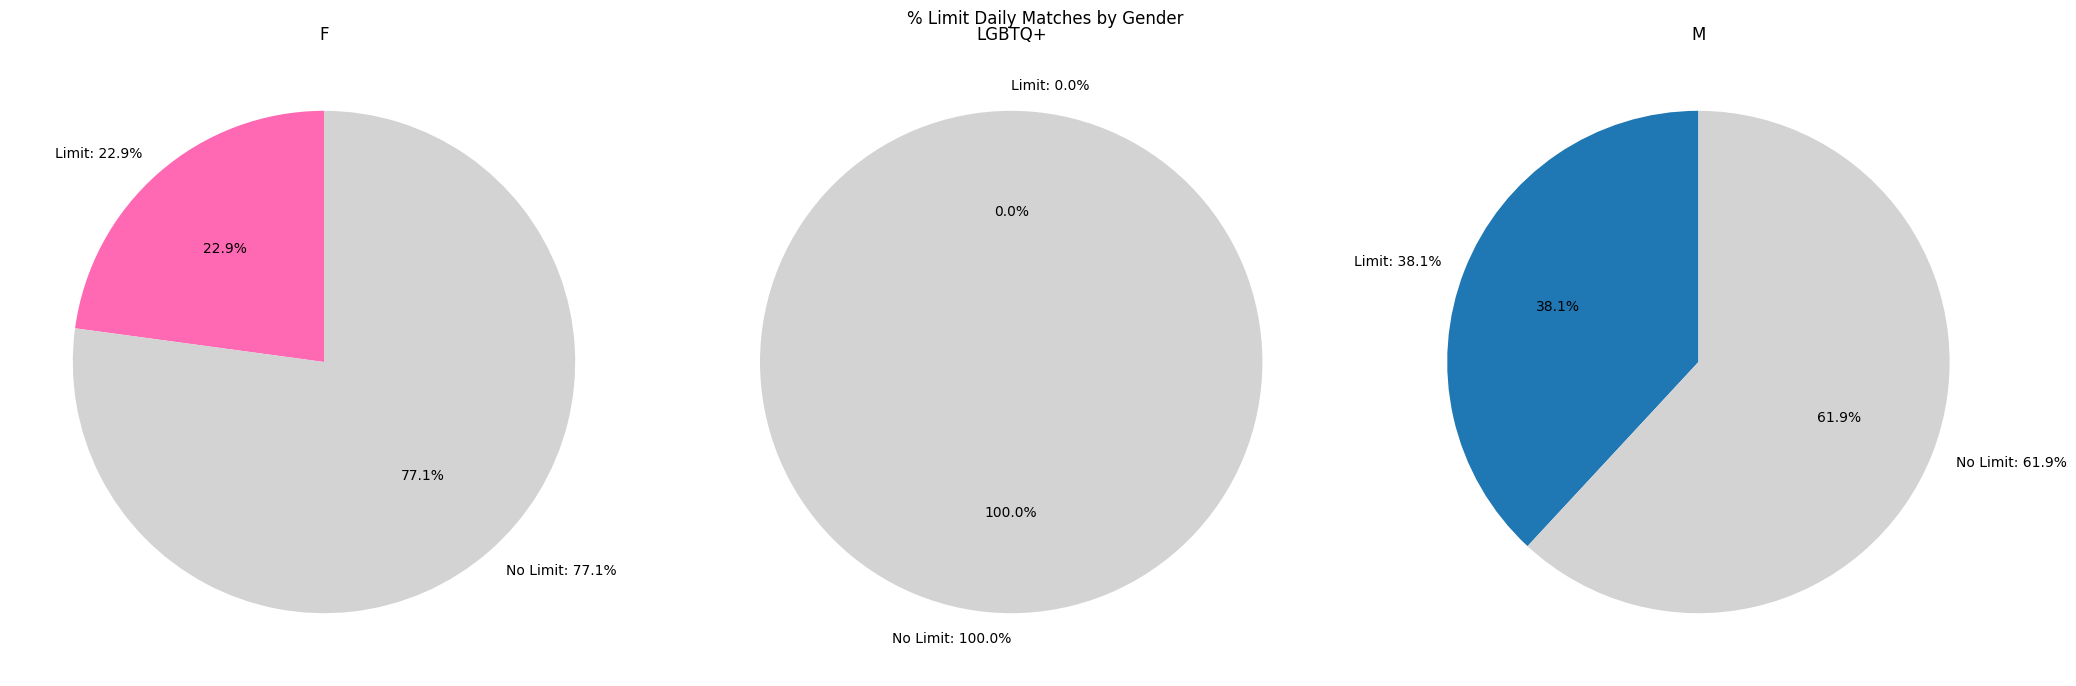

In [ ]:
# Step 1: Calculate the percentage of users who want to limit daily matches grouped by gender
limit_counts_gender = filtered_used.groupby('Gender')['LimitDailyMatches'].mean() * 100

# Step 2: Convert to DataFrame for better display
limit_percentage_gender = limit_counts_gender.reset_index()
limit_percentage_gender.columns = ['Gender', 'Percentage of Limit Daily Matches']

# Step 3: Plotting multiple pie charts
num_genders = limit_percentage_gender.shape[0]
num_columns = 3  # Number of pie charts per row
num_rows = (num_genders + num_columns - 1) // num_columns  # Calculate number of rows needed

# Increase the figure size for larger pie charts
fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 7, num_rows * 7))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for ax, (gender, percentage) in zip(axes, limit_percentage_gender.values):
    # Create a pie chart for each gender
    ax.pie([percentage, 100 - percentage], labels=[f'Limit: {percentage:.1f}%', f'No Limit: {100 - percentage:.1f}%'],
           autopct='%1.1f%%', startangle=90, colors=['#1f77b4' if gender == 'M' else '#ff69b4' if gender == 'F' else '#e377c2', 'lightgray'])
    ax.set_title(gender)

# Hide any unused subplots if there are fewer genders than slots
for i in range(num_genders, len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('% Limit Daily Matches by Gender')
plt.tight_layout()
plt.show()


###### By Faculty

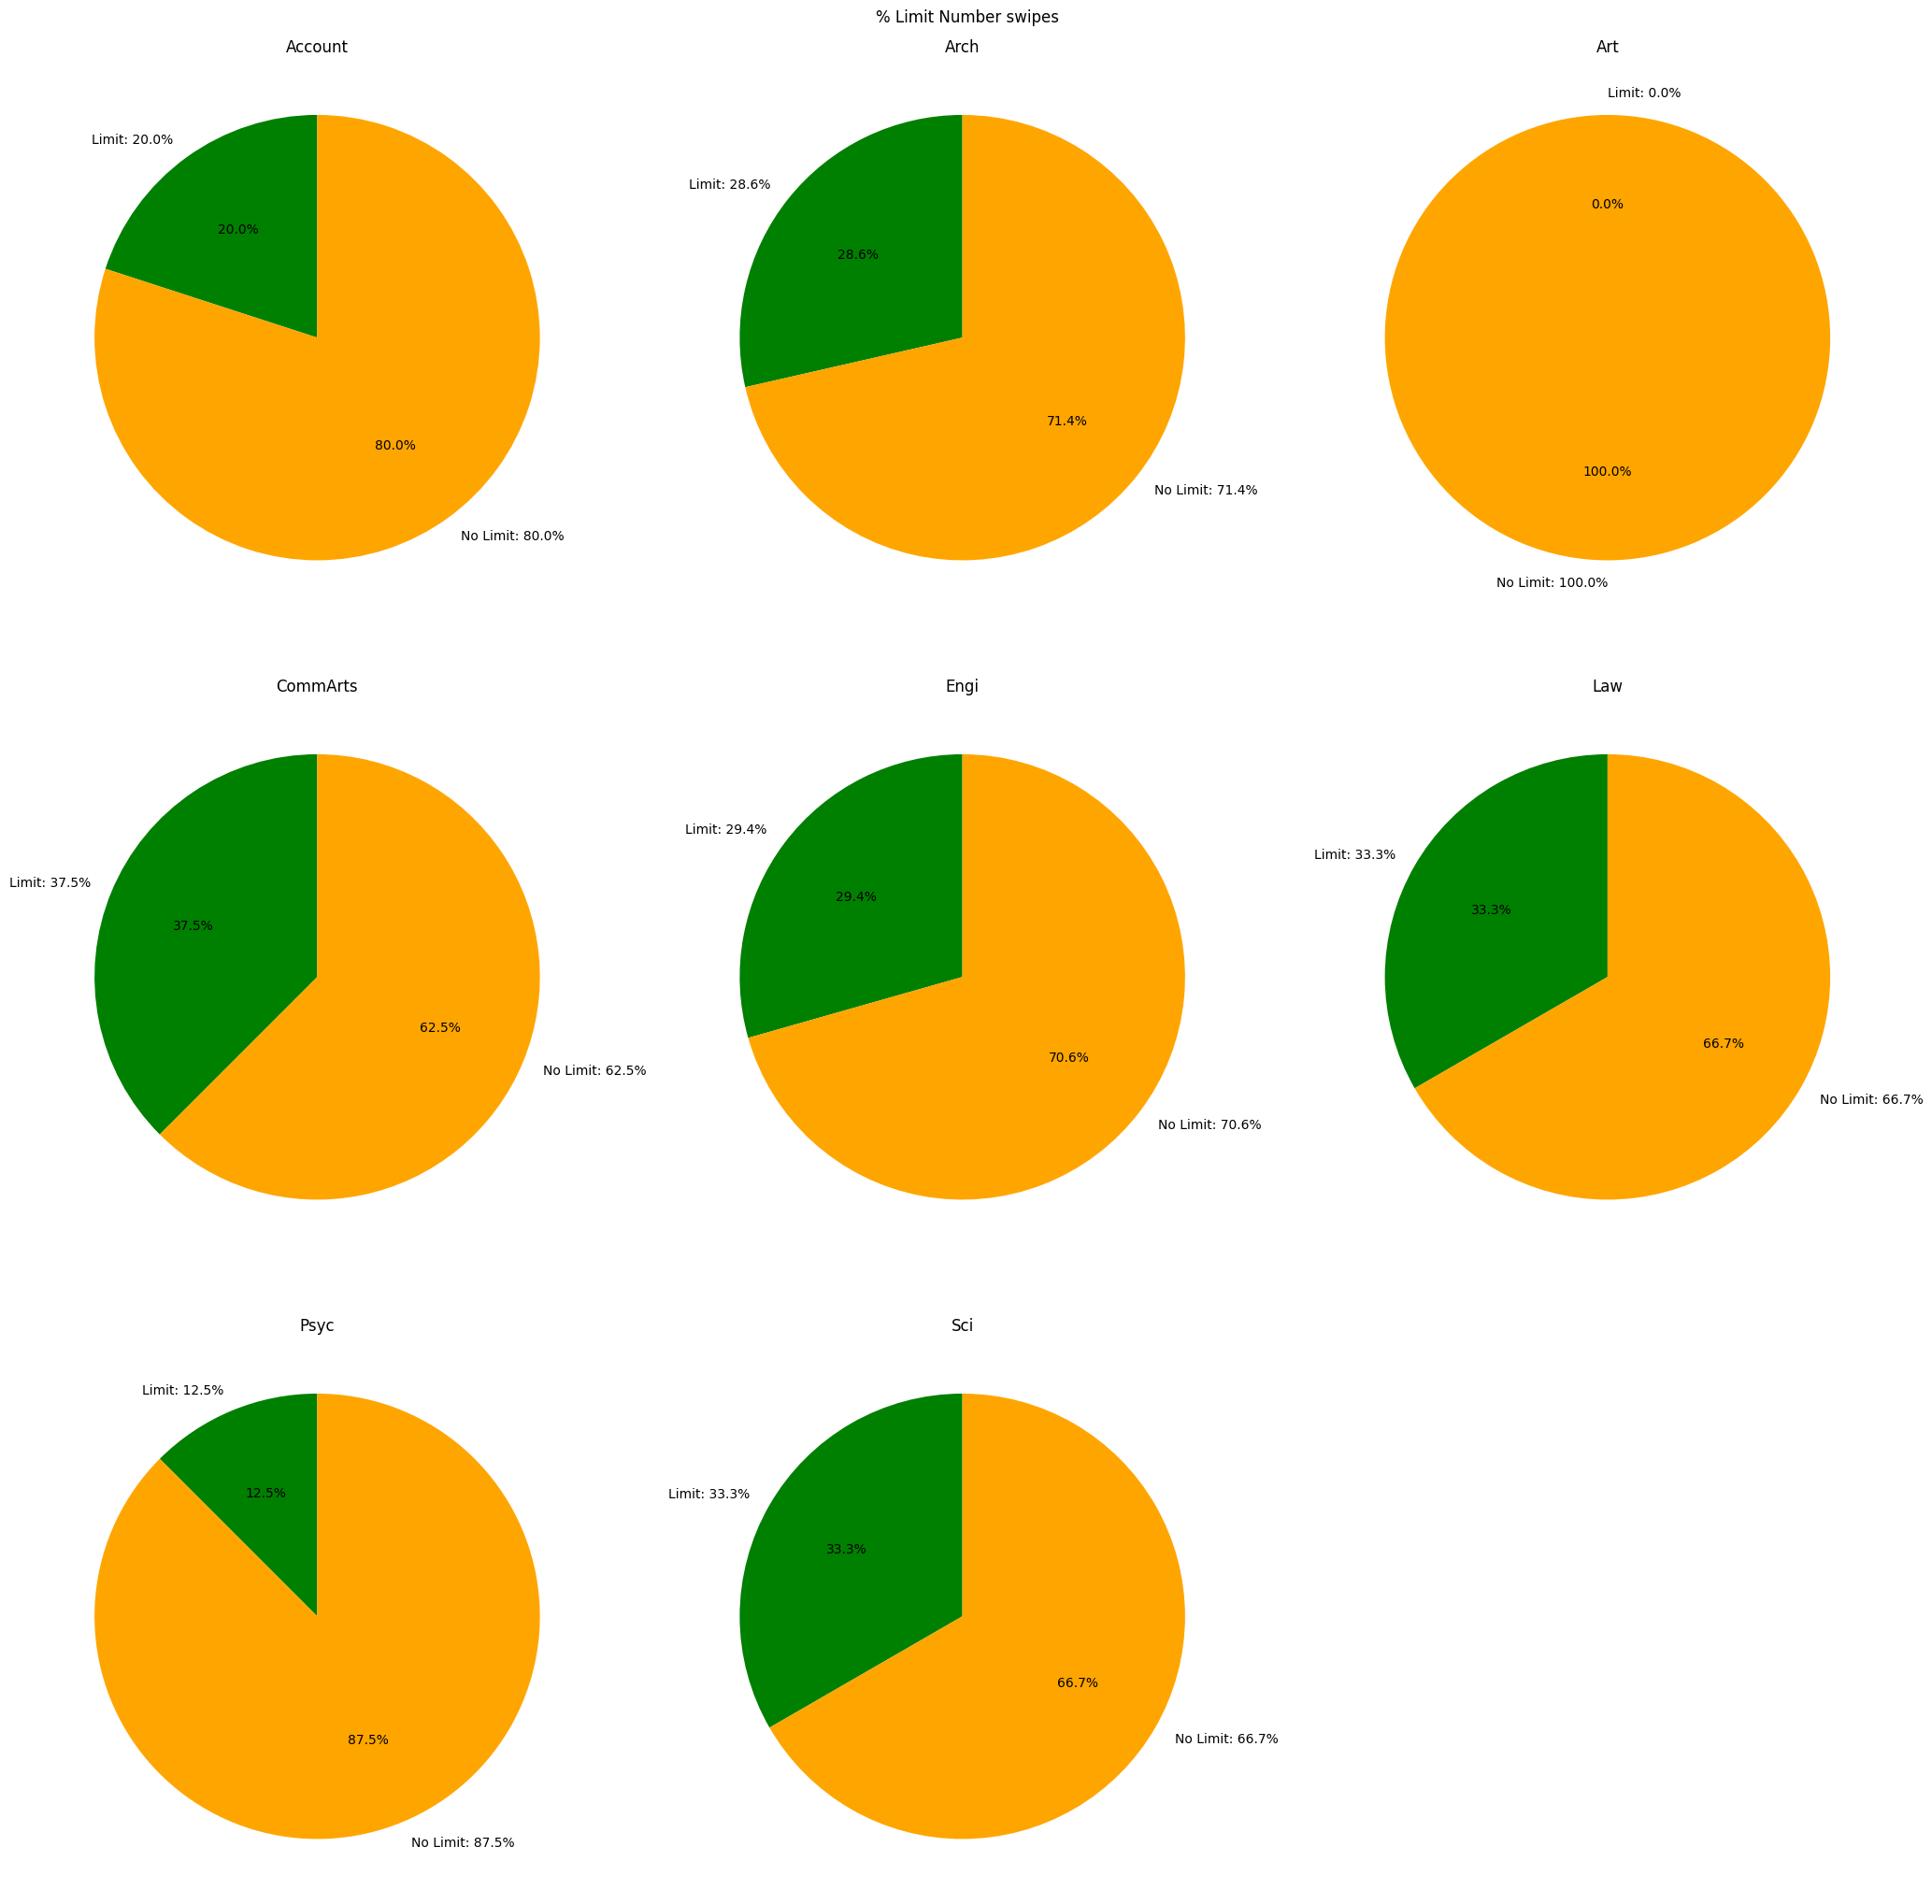

In [ ]:
# Step 1: Calculate the percentage of users who want to limit daily matches grouped by faculty
limit_counts = filtered_used.groupby('Faculty')['LimitDailyMatches'].mean() * 100

# Step 2: Convert to DataFrame for better display
limit_percentage = limit_counts.reset_index()
limit_percentage.columns = ['Faculty', 'Percentage of Limit Daily Matches']

# Step 3: Plotting multiple pie charts
num_faculties = limit_percentage.shape[0]
num_columns = 3  # Number of pie charts per row
num_rows = (num_faculties + num_columns - 1) // num_columns  # Calculate number of rows needed

# Increase the figure size for larger pie charts
fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 7, num_rows * 7))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for ax, (faculty, percentage) in zip(axes, limit_percentage.values):
    # Create a pie chart for each faculty
    ax.pie([percentage, 100 - percentage], labels=[f'Limit: {percentage:.1f}%', f'No Limit: {100 - percentage:.1f}%'],
           autopct='%1.1f%%', startangle=90, colors=['green', 'orange'])
    ax.set_title(faculty)

# Hide any unused subplots if there are fewer faculties than slots
for i in range(num_faculties, len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('% Limit Number swipes')
plt.tight_layout()
plt.show()

###### By Major

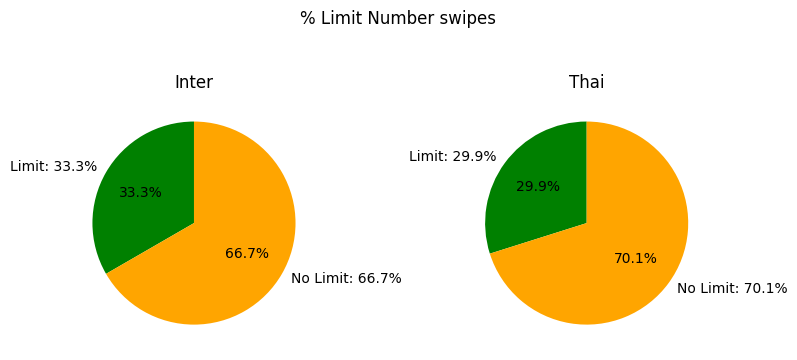

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `filtered_used` is your DataFrame and it is already loaded

# Step 1: Calculate the percentage of users who want to limit daily matches grouped by faculty
limit_counts = used.groupby('Major')['LimitDailyMatches'].mean() * 100

# Step 2: Convert to DataFrame for better display
limit_percentage = limit_counts.reset_index()
limit_percentage.columns = ['Major', 'Percentage of Limit Daily Matches']

# Step 3: Plotting multiple pie charts
num_major = limit_percentage.shape[0]
fig, axes = plt.subplots(1, num_major, figsize=(num_major * 4, 4))

for ax, (major, percentage) in zip(axes, limit_percentage.values):
    # Create a pie chart for each faculty
    ax.pie([percentage, 100 - percentage], labels=[f'Limit: {percentage:.1f}%', f'No Limit: {100 - percentage:.1f}%'],
           autopct='%1.1f%%', startangle=90, colors=['green', 'orange'])
    ax.set_title(major)

plt.suptitle('% Limit Number swipes')
plt.tight_layout()
plt.show()

###### By Status

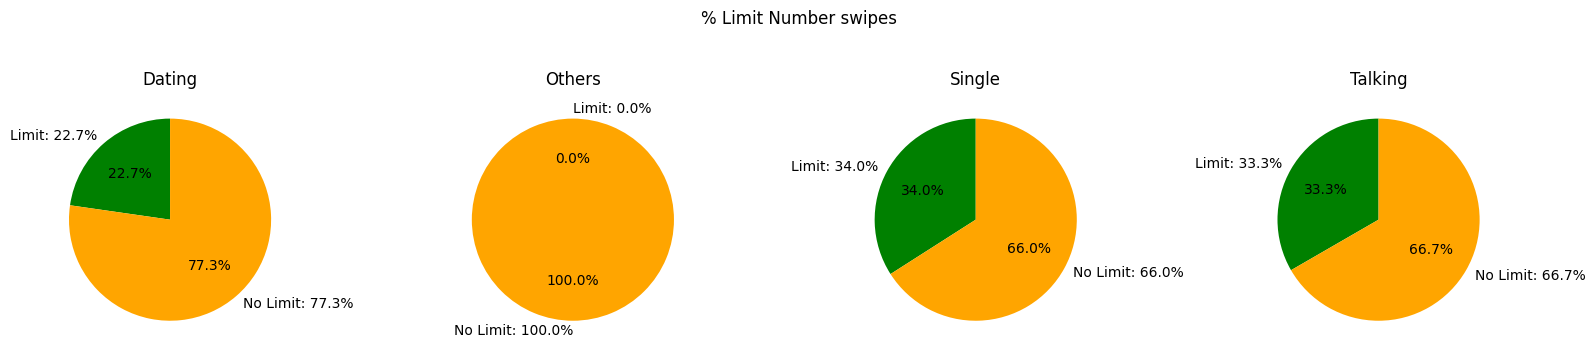

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `filtered_used` is your DataFrame and it is already loaded

# Step 1: Calculate the percentage of users who want to limit daily matches grouped by faculty
limit_counts = used.groupby('Status')['LimitDailyMatches'].mean() * 100

# Step 2: Convert to DataFrame for better display
limit_percentage = limit_counts.reset_index()
limit_percentage.columns = ['Status', 'Percentage of Limit Daily Matches']

# Step 3: Plotting multiple pie charts
num_status = limit_percentage.shape[0]
fig, axes = plt.subplots(1, num_status, figsize=(num_status * 4, 4))

for ax, (status, percentage) in zip(axes, limit_percentage.values):
    # Create a pie chart for each faculty
    ax.pie([percentage, 100 - percentage], labels=[f'Limit: {percentage:.1f}%', f'No Limit: {100 - percentage:.1f}%'],
           autopct='%1.1f%%', startangle=90, colors=['green', 'orange'])
    ax.set_title(status)

plt.suptitle('% Limit Number swipes')
plt.tight_layout()
plt.show()

In [ ]:
used['WillingToProvideInfo'].unique()

array([1, 0])

## OK to provide info

###### By gender

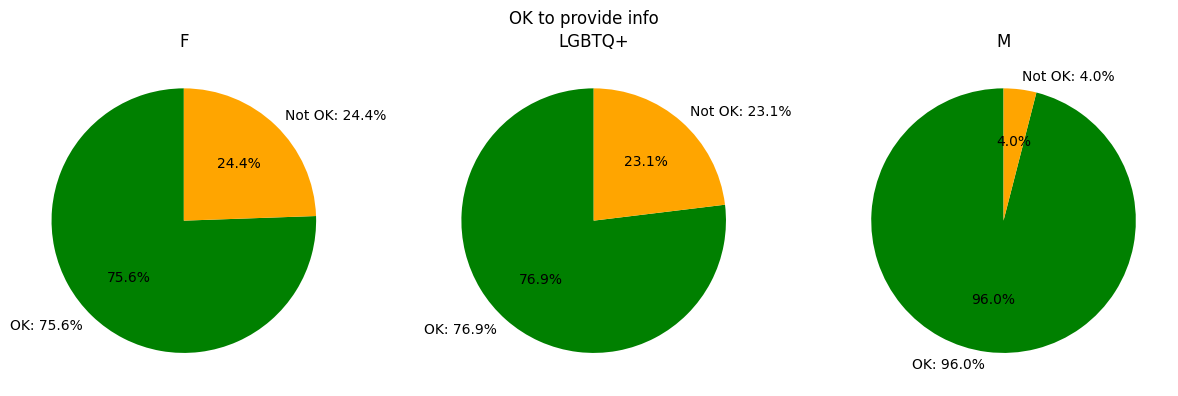

In [ ]:
# Assuming `filtered_used` is your DataFrame and it is already loaded

# Step 1: Calculate the percentage of users who want to limit daily matches grouped by faculty
limit_counts = used.groupby('Gender')['WillingToProvideInfo'].mean() * 100

# Step 2: Convert to DataFrame for better display
limit_percentage = limit_counts.reset_index()
limit_percentage.columns = ['Gender', 'Percentage of OK to provide info']

# Step 3: Plotting multiple pie charts
num_gender = limit_percentage.shape[0]
fig, axes = plt.subplots(1, num_gender, figsize=(num_gender * 4, 4))

for ax, (gender, percentage) in zip(axes, limit_percentage.values):
    # Create a pie chart for each faculty
    ax.pie([percentage, 100 - percentage], labels=[f'OK: {percentage:.1f}%', f'Not OK: {100 - percentage:.1f}%'],
           autopct='%1.1f%%', startangle=90, colors=['green', 'orange'])
    ax.set_title(gender)

plt.suptitle('OK to provide info')
plt.tight_layout()
plt.show()

###### By Faculty

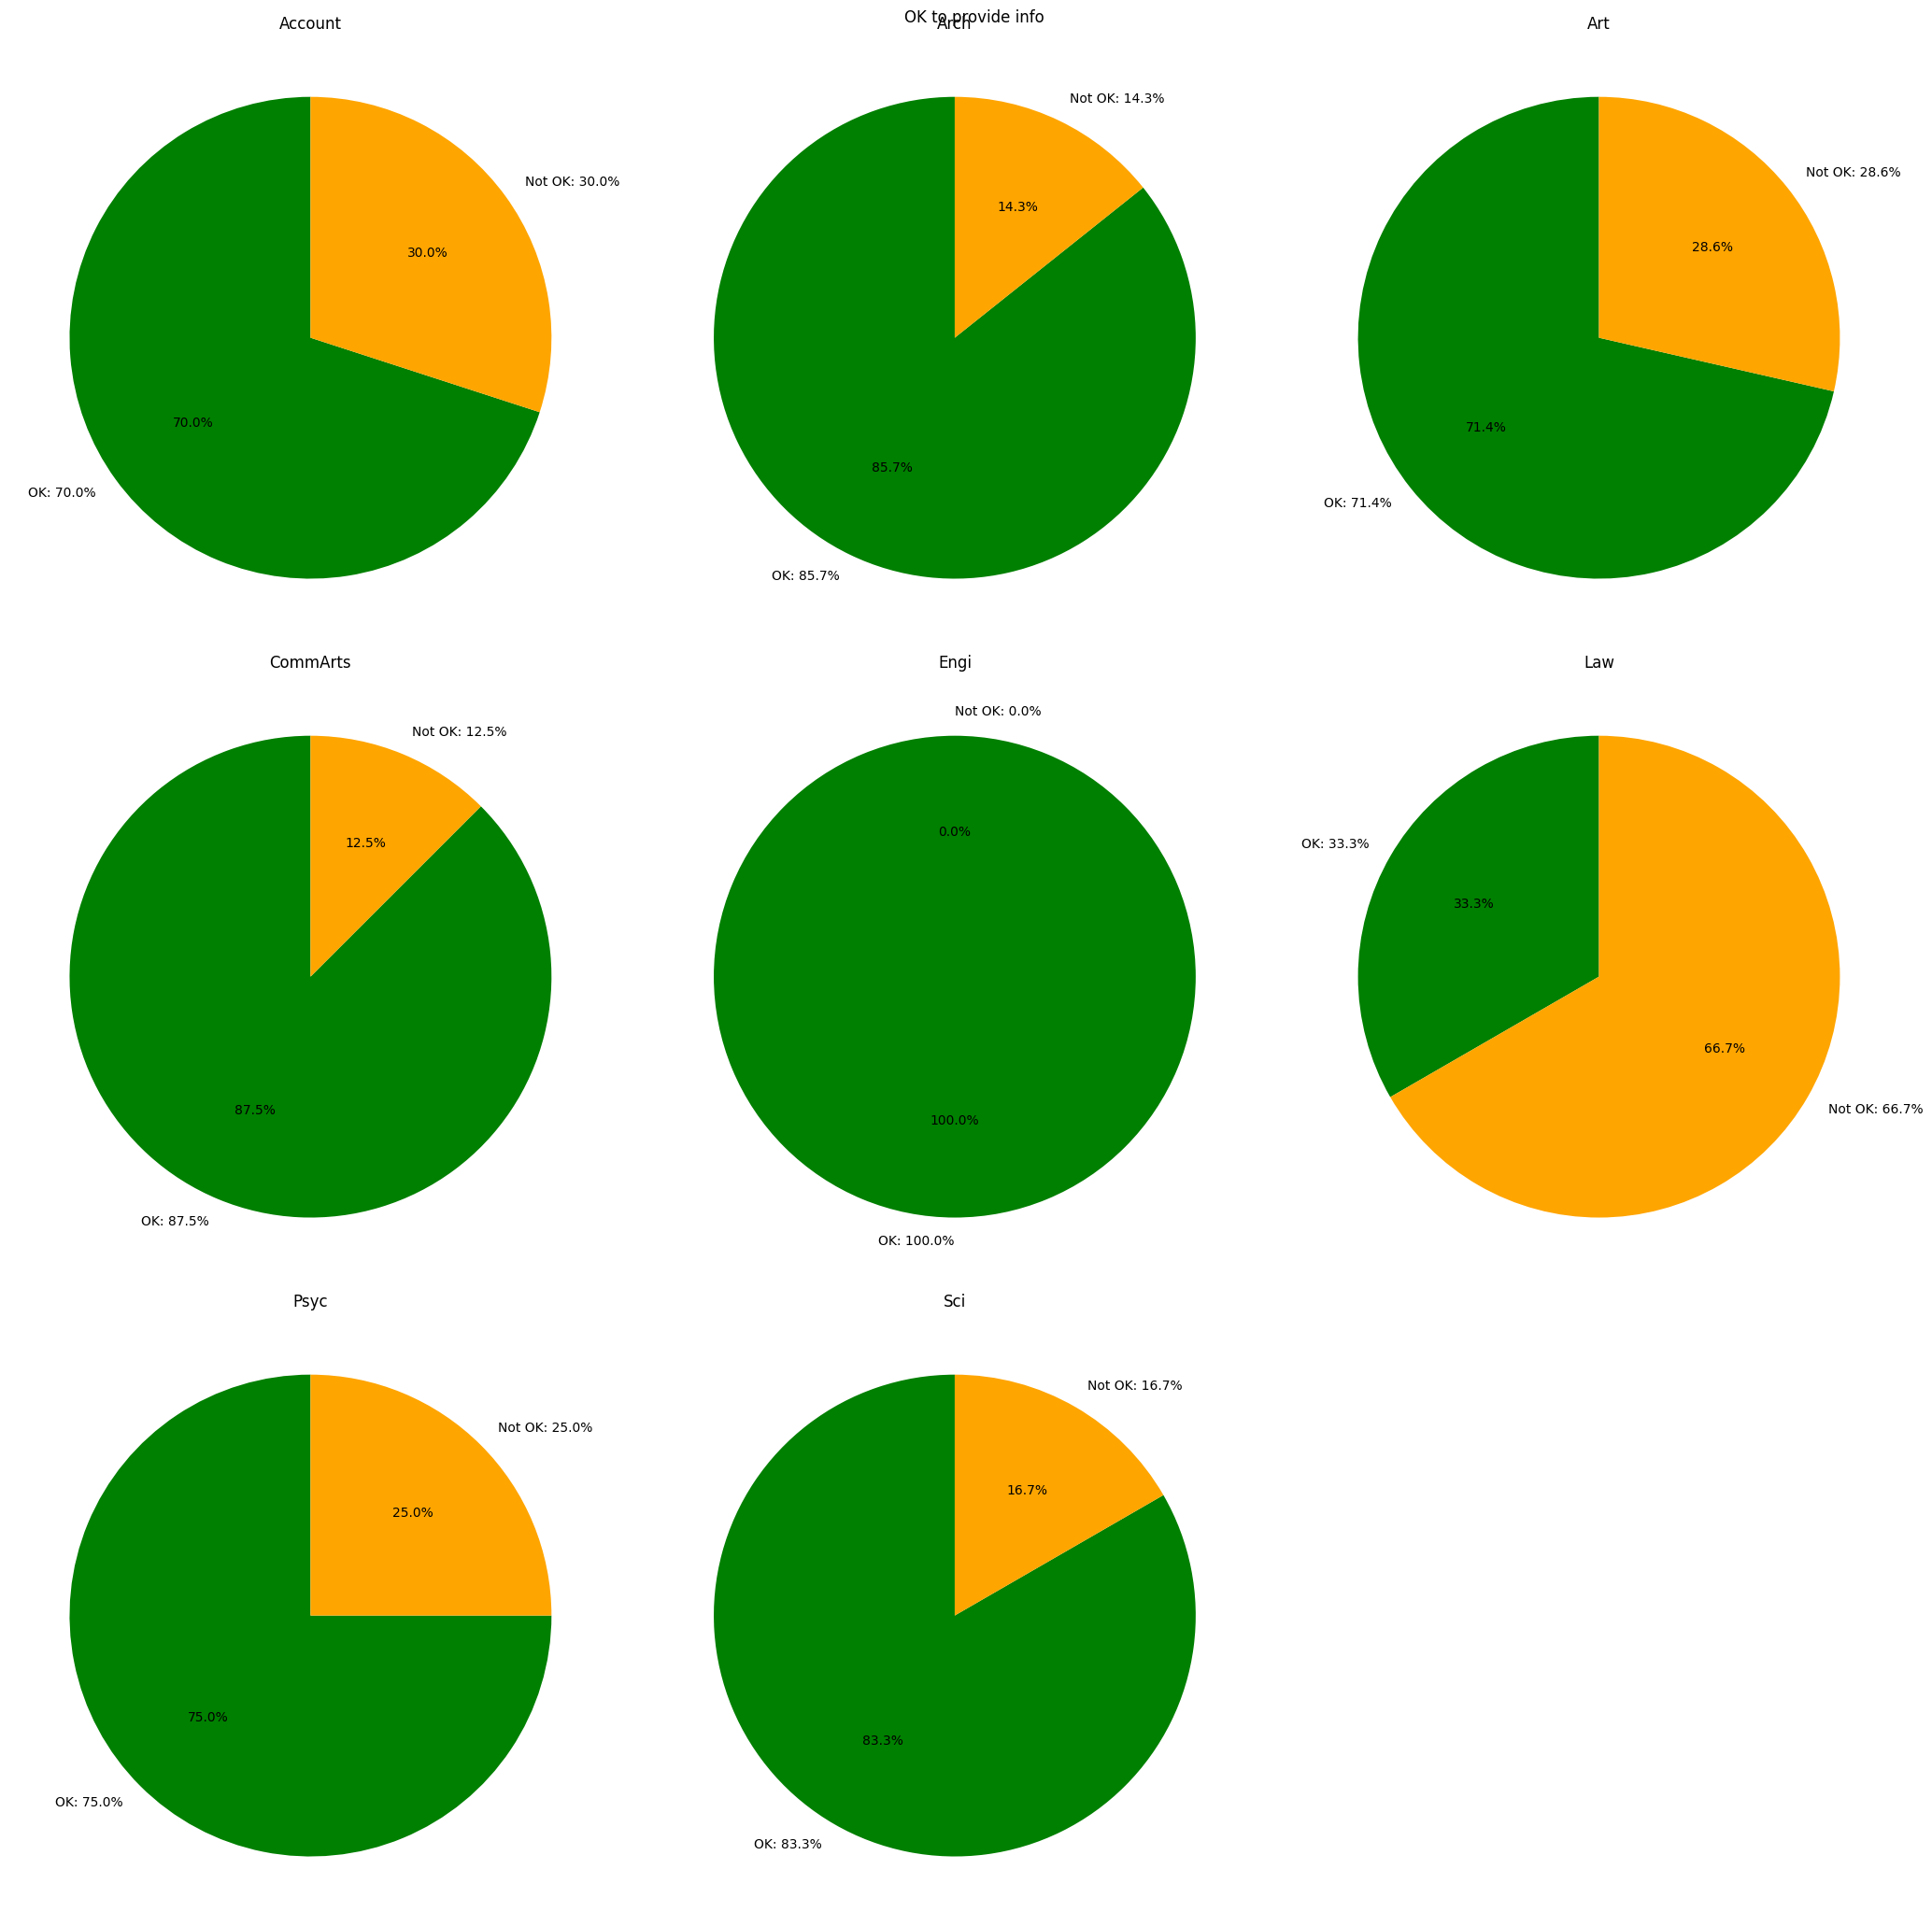

In [ ]:
# Step 1: Calculate the percentage of users who want to limit daily matches grouped by faculty
limit_counts = filtered_used.groupby('Faculty')['WillingToProvideInfo'].mean() * 100

# Step 2: Convert to DataFrame for better display
limit_percentage = limit_counts.reset_index()
limit_percentage.columns = ['Faculty', 'Percentage of WillingToProvideInfo']

# Step 3: Plotting multiple pie charts
num_faculties = limit_percentage.shape[0]
num_columns = 3  # Number of pie charts per row
num_rows = (num_faculties + num_columns - 1) // num_columns  # Calculate number of rows needed

# Increase the figure size for larger pie charts
fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 7, num_rows * 7))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for ax, (faculty, percentage) in zip(axes, limit_percentage.values):
    # Create a pie chart for each faculty
    ax.pie([percentage, 100 - percentage], labels=[f'OK: {percentage:.1f}%', f'Not OK: {100 - percentage:.1f}%'],
           autopct='%1.1f%%', startangle=90, colors=['green', 'orange'])
    ax.set_title(faculty)

# Hide any unused subplots if there are fewer faculties than slots
for i in range(num_faculties, len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('OK to provide info')
plt.tight_layout()
plt.show()

###### By Status

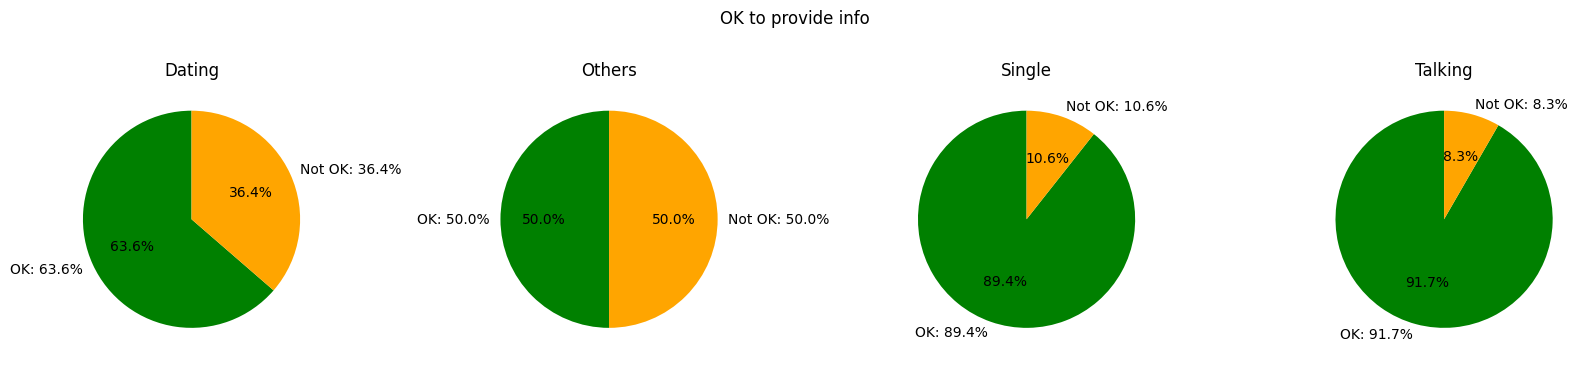

In [ ]:
# Assuming `filtered_used` is your DataFrame and it is already loaded

# Step 1: Calculate the percentage of users who want to limit daily matches grouped by faculty
limit_counts = used.groupby('Status')['WillingToProvideInfo'].mean() * 100

# Step 2: Convert to DataFrame for better display
limit_percentage = limit_counts.reset_index()
limit_percentage.columns = ['Status', 'Percentage of OK to provide info']

# Step 3: Plotting multiple pie charts
num_status = limit_percentage.shape[0]
fig, axes = plt.subplots(1, num_status, figsize=(num_status * 4, 4))

for ax, (status, percentage) in zip(axes, limit_percentage.values):
    # Create a pie chart for each faculty
    ax.pie([percentage, 100 - percentage], labels=[f'OK: {percentage:.1f}%', f'Not OK: {100 - percentage:.1f}%'],
           autopct='%1.1f%%', startangle=90, colors=['green', 'orange'])
    ax.set_title(status)

plt.suptitle('OK to provide info')
plt.tight_layout()
plt.show()

## Gender

In [ ]:
df1['Gender'].unique()

array(['F', 'LGBTQ+', 'M'], dtype=object)

### OVERALL

##### % used dating app by gender

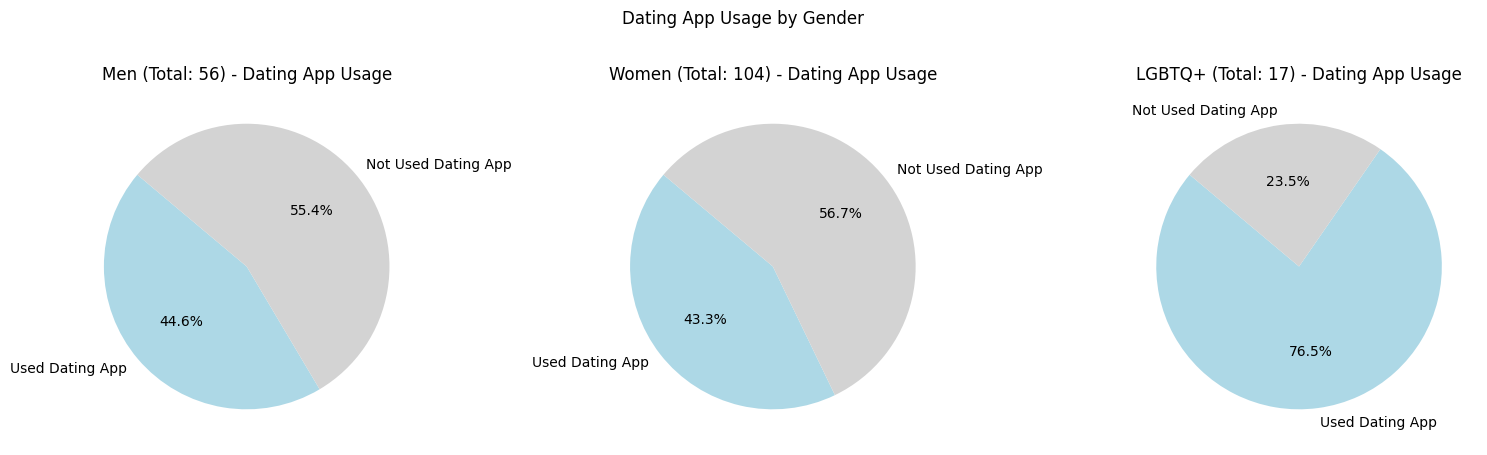

In [ ]:
# % used dating app by gender
men_total = df1[df1['Gender'] == 'M'].shape[0]
women_total = df1[df1['Gender'] == 'F'].shape[0]
LGBT_total = df1[df1['Gender'] == 'LGBTQ+'].shape[0]

men_used = df1[(df1['Gender'] == 'M') & (df1['UsedDatingApp'] == 1.0)].shape[0]
women_used = df1[(df1['Gender'] == 'F') & (df1['UsedDatingApp'] == 1.0)].shape[0]
LGBT_used = df1[(df1['Gender'] == 'LGBTQ+') & (df1['UsedDatingApp'] == 1.0)].shape[0]

percent_use_men = round((men_used/men_total)*100,2)
percent_use_women = round((women_used/women_total)*100,2)
percent_use_LGBT = round((LGBT_used/LGBT_total)*100,2)

# Data for each gender
data = {
    'Men': [men_used, men_total - men_used],
    'Women': [women_used, women_total - women_used],
    'LGBTQ+': [LGBT_used, LGBT_total - LGBT_used]
}

# Total counts for each gender
totals = {
    'Men': men_total,
    'Women': women_total,
    'LGBTQ+': LGBT_total
}

colors = ['lightblue', 'lightgray']  # Colors for 'Used' and 'Not Used'
labels = ['Used Dating App', 'Not Used Dating App']

# Plotting three separate pie charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (gender, values) in zip(axes, data.items()):
    total_count = totals[gender]
    ax.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{gender} (Total: {total_count}) - Dating App Usage')

plt.suptitle('Dating App Usage by Gender')
plt.tight_layout()
plt.show()

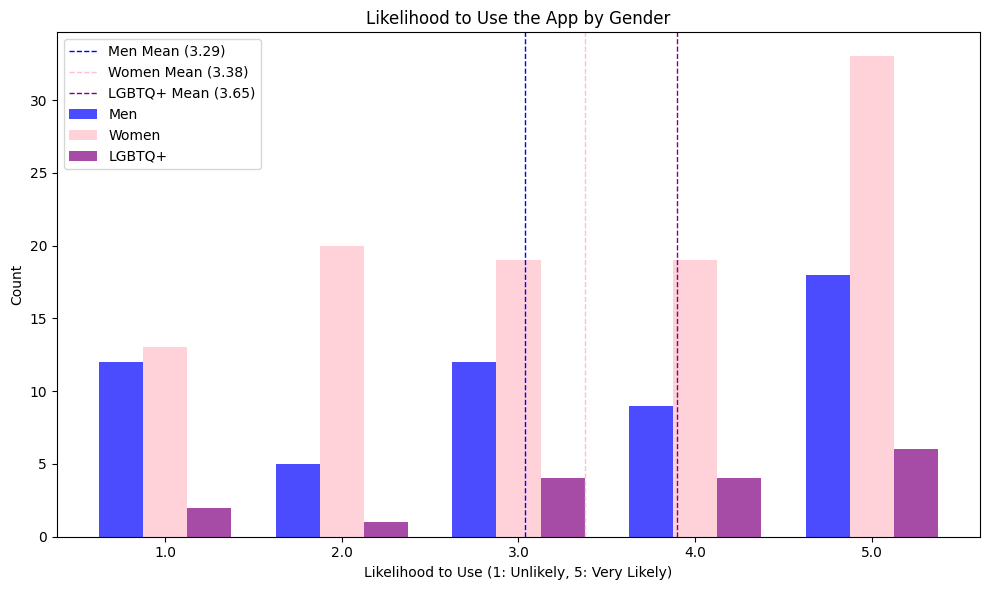

In [ ]:
# Likely Hood to use
men_likelihood = df1[df1['Gender'] == 'M']['LikelihoodToUse']
women_likelihood = df1[df1['Gender'] == 'F']['LikelihoodToUse']
LGBT_likelihood = df1[df1['Gender'] == 'LGBTQ+']['LikelihoodToUse']

counts_men = men_likelihood.value_counts().sort_index()
counts_women = women_likelihood.value_counts().sort_index()
counts_LGBT = LGBT_likelihood.value_counts().sort_index()

# Calculate the mean for both groups
mean_men = men_likelihood.mean()
mean_women = women_likelihood.mean()
mean_LGBT = LGBT_likelihood.mean()

# Define the data for each group
labels = counts_men.index  # Assuming the likelihood values are the same across groups
men_values = counts_men.values
women_values = counts_women.values
LGBT_values = counts_LGBT.values

# Set up the plot
plt.figure(figsize=(10, 6))

# Bar width for each group
bar_width = 0.25

# Bar positions for each group
r1 = np.arange(len(men_values))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width * 2 for x in r1]

# Plotting the bars
plt.bar(r1, men_values, color='blue', width=bar_width, label='Men', alpha=0.7)
plt.bar(r2, women_values, color='pink', width=bar_width, label='Women', alpha=0.7)
plt.bar(r3, LGBT_values, color='purple', width=bar_width, label='LGBTQ+', alpha=0.7)

# Adding vertical mean lines for each group
plt.axvline(x=mean_men - 1, color='blue', linestyle='--', linewidth=1, label=f'Men Mean ({mean_men:.2f})')
plt.axvline(x=mean_women - 1 + bar_width, color='pink', linestyle='--', linewidth=1, label=f'Women Mean ({mean_women:.2f})')
plt.axvline(x=mean_LGBT - 1 + bar_width * 2, color='purple', linestyle='--', linewidth=1, label=f'LGBTQ+ Mean ({mean_LGBT:.2f})')

# Adding labels and title
plt.xlabel('Likelihood to Use (1: Unlikely, 5: Very Likely)')
plt.ylabel('Count')
plt.title('Likelihood to Use the App by Gender')
plt.xticks([r + bar_width for r in range(len(labels))], labels)

# Show legend
plt.legend()

# Display plot
plt.tight_layout()
plt.show()


##### %limit daily match

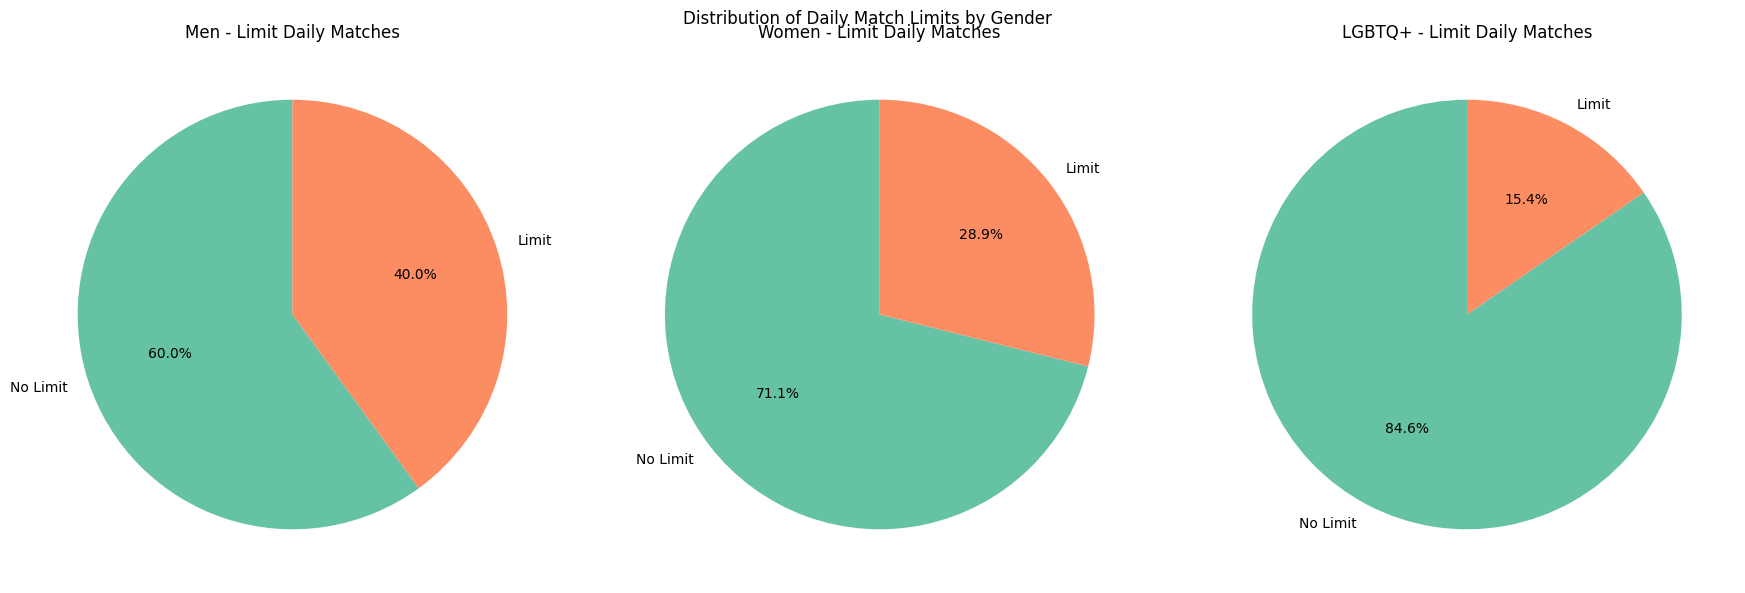

In [ ]:
# % limit daily match
men_limitMatch = df1[df1['Gender'] == 'M']['LimitDailyMatches']
women_limitMatch = df1[df1['Gender'] == 'F']['LimitDailyMatches']
LGBT_limitMatch = df1[df1['Gender'] == 'LGBTQ+']['LimitDailyMatches']

men_limitMatch_count = men_limitMatch.value_counts(normalize=True).sort_index() * 100
women_limitMatch_count = women_limitMatch.value_counts(normalize=True).sort_index() * 100
LGBT_limitMatch_count = LGBT_limitMatch.value_counts(normalize=True).sort_index() * 100

import matplotlib.pyplot as plt

# Values for each gender in percentage
data = {
    'Men': men_limitMatch_count,
    'Women': women_limitMatch_count,
    'LGBTQ+': LGBT_limitMatch_count
}

# Define colors and labels for each category
colors = ['#66c2a5', '#fc8d62']  # Customize colors as needed
labels = ['No Limit', 'Limit']   # Assuming '0' is "No Limit" and '1' is "Limit"

# Create subplots for each gender
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (gender, values) in zip(axes, data.items()):
    # Plot pie chart for each gender
    ax.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{gender} - Limit Daily Matches')

# Add an overall title and show the plot
plt.suptitle('Distribution of Daily Match Limits by Gender')
plt.tight_layout()
plt.show()

### USED

In [ ]:
used_men = used[used['Gender'] == 'M']
used_women = used[used['Gender'] == 'F']
used_LGBT = used[used['Gender'] == 'LGBTQ+']

##### purpose of use by gender

In [ ]:
men_purpose = {'Serious':0, 'Casual':0, 'Friends':0, 'Hook Up':0, 'Not Sure':0, 'Others':0}
women_purpose = {'Serious':0, 'Casual':0, 'Friends':0, 'Hook Up':0, 'Not Sure':0, 'Others':0}
LGBT_purpose = {'Serious':0, 'Casual':0, 'Friends':0, 'Hook Up':0, 'Not Sure':0, 'Others':0}
key = ['Serious', 'Casual', 'Friends', 'Hook Up', 'Not Sure']

for list_each in used_men['PurposeOfUse']:
  for each in list_each:
    if each in key:
      men_purpose[each] += 1
    else:
      men_purpose['Others'] +=1

for list_each in used_women['PurposeOfUse']:
  for each in list_each:
    if each in key:
      women_purpose[each] += 1
    else:
      women_purpose['Others'] +=1

for list_each in used_LGBT['PurposeOfUse']:
  for each in list_each:
    if each in key:
      LGBT_purpose[each] += 1
    else:
      LGBT_purpose['Others'] +=1

In [ ]:
print(men_purpose)
print(women_purpose)
print(LGBT_purpose)

{'Serious': 18, 'Casual': 13, 'Friends': 15, 'Hook Up': 8, 'Not Sure': 5, 'Others': 0}
{'Serious': 20, 'Casual': 20, 'Friends': 24, 'Hook Up': 4, 'Not Sure': 6, 'Others': 2}
{'Serious': 5, 'Casual': 7, 'Friends': 6, 'Hook Up': 5, 'Not Sure': 4, 'Others': 3}


In [ ]:
# Extract categories and corresponding values
men_values = list(men_purpose.values())
women_values = list(women_purpose.values())
LGBT_values = list(LGBT_purpose.values())

# Calculate totals
total_men = sum(men_purpose.values())
total_women = sum(women_purpose.values())
total_LGBT = sum(LGBT_purpose.values())

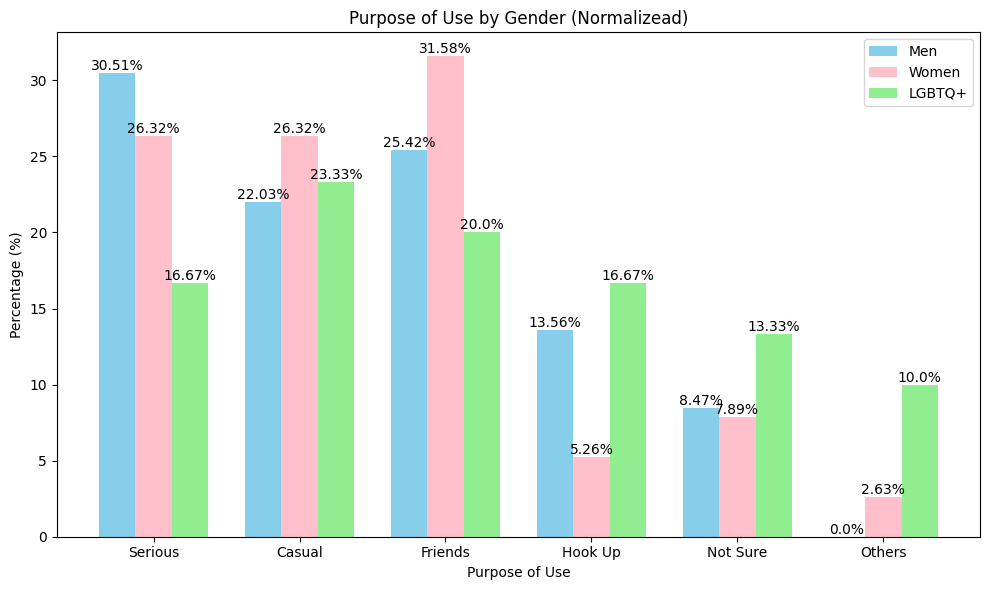

In [ ]:
# Data preparation
categories = list(men_purpose.keys())
men_values_normalized = [round(count / total_men * 100, 2) for count in men_purpose.values()]
women_values_normalized = [round(count / total_women * 100, 2) for count in women_purpose.values()]
LGBT_values_normalized = [round(count / total_LGBT * 100, 2) for count in LGBT_purpose.values()]

# Define positions for each category and width for each bar
x = np.arange(len(categories))
width = 0.25  # Width of each bar

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar charts for each gender
bars1 = ax.bar(x - width, men_values_normalized, width, label='Men', color='skyblue')
bars2 = ax.bar(x, women_values_normalized, width, label='Women', color='pink')
bars3 = ax.bar(x + width, LGBT_values_normalized, width, label='LGBTQ+', color='lightgreen')

# Labels and title
ax.set_xlabel('Purpose of Use')
ax.set_ylabel('Percentage (%)')
ax.set_title('Purpose of Use by Gender (Normalizead)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Show percentages on top of each bar
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

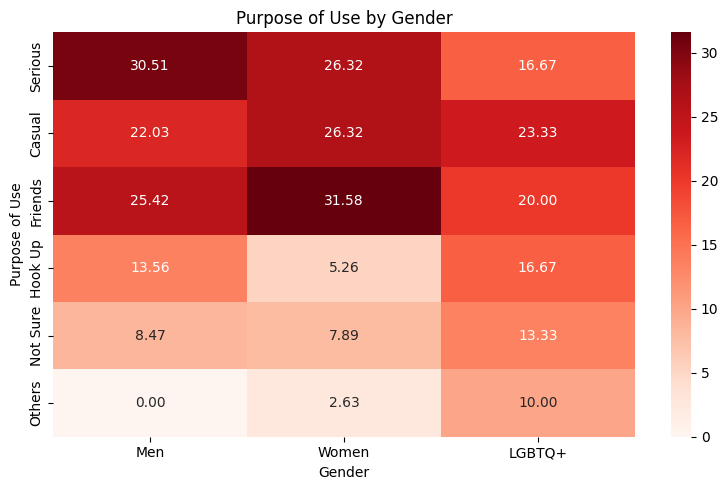

In [ ]:
data_purpose = pd.DataFrame({
    'Men': men_values_normalized,
    'Women': women_values_normalized,
    'LGBTQ+': LGBT_values_normalized
}, index=categories)

# Create the heatmap
plt.figure(figsize=(8, 5))  # Set the figure size
sns.heatmap(data_purpose, annot=True, cmap='Reds', fmt='.2f', cbar=True)  # Create heatmap with color map
plt.title('Purpose of Use by Gender')  # Add a title
plt.xlabel('Gender')  # Label for the x-axis
plt.ylabel('Purpose of Use')  # Label for the y-axis
plt.xticks(rotation=0)  # Rotate x labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()

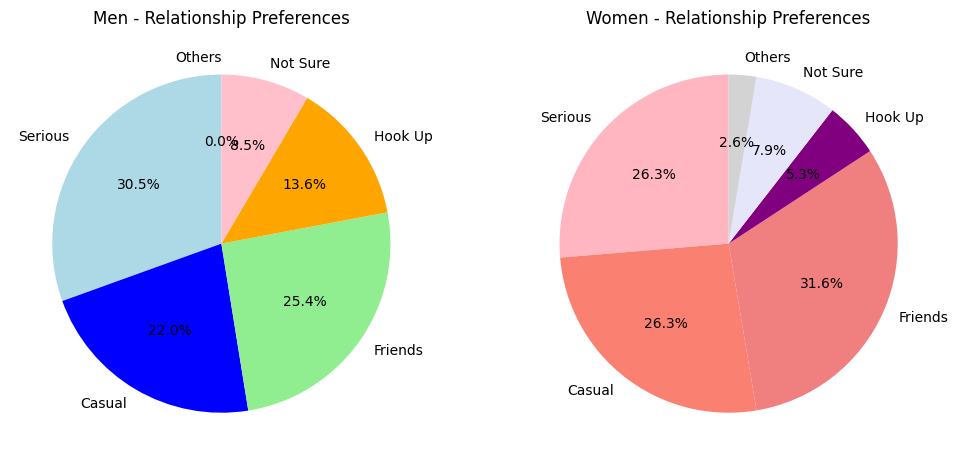

In [ ]:
labels = list(men_purpose.keys())

# Create pie charts side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Men pie chart
ax1.pie(men_values_normalized, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'blue', 'lightgreen', 'orange', 'pink', 'gray'])
ax1.set_title('Men - Relationship Preferences')

# Women pie chart
ax2.pie(women_values_normalized, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightpink', 'salmon', 'lightcoral', 'purple', 'lavender', 'lightgray'])
ax2.set_title('Women - Relationship Preferences')

plt.show()

  Preference  Men_Count  Men_Percentage  Women_Count  Women_Percentage
0    Serious         18           30.51           20             26.32
2    Friends         15           25.42           24             31.58
1     Casual         13           22.03           20             26.32
3    Hook Up          8           13.56            4              5.26
4   Not Sure          5            8.47            6              7.89
5     Others          0            0.00            2              2.63


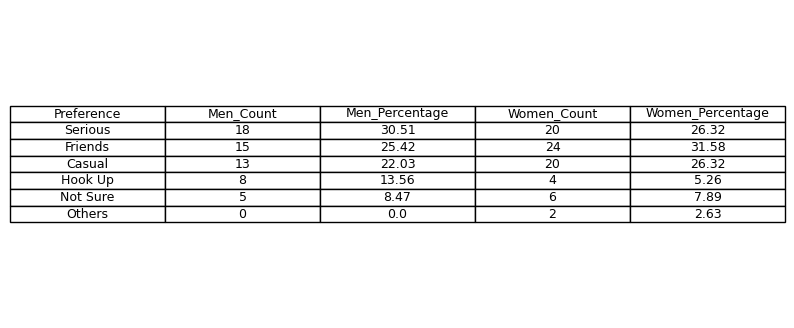

In [ ]:
# Create a DataFrame to store the results
df_new = pd.DataFrame({
    'Preference': men_purpose.keys(),
    'Men_Count': men_purpose.values(),
    'Men_Percentage': men_values_normalized,
    'Women_Count': women_purpose.values(),
    'Women_Percentage': women_values_normalized
})

# Sort the DataFrame by Men_Count
df_sorted = df_new.sort_values(by='Men_Count', ascending=False)

# Display the table
print(df_sorted)

# Optional: Display the table as a plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_sorted.values, colLabels=df_sorted.columns, cellLoc = 'center', loc='center')
plt.show()

In [ ]:
used.columns

Index(['Age', 'Gender', 'Year', 'Faculty', 'Major', 'Status', 'UsedDatingApp',
       'PurposeOfUse', 'FavApp', 'PreferredFeatures', 'FactorAge',
       'FactorFaculty', 'FactorYear', 'FactorInterests', 'FactorHobbies',
       'FactorMBTI', 'FactorUniversity', 'FactorSelfPic', 'FactorOtherPic',
       'BoughtSuperlike', 'BoughtSubscription', 'PainDidntMatch',
       'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo', 'PainOthers',
       'LimitDailyMatches', 'WillingToProvideInfo', 'MoreInfoLessAttract',
       'LikelihoodToUse', 'ReasonForUsingExclusiveApp'],
      dtype='object')

##### Like Factor by gender

In [ ]:
men_factor = used[used['Gender'] == 'M'][['FactorAge', 'FactorFaculty', 'FactorYear', 'FactorInterests', 'FactorHobbies', 'FactorMBTI', 'FactorUniversity', 'FactorSelfPic', 'FactorOtherPic']]
women_factor = used[used['Gender'] == 'F'][['FactorAge', 'FactorFaculty', 'FactorYear', 'FactorInterests', 'FactorHobbies', 'FactorMBTI', 'FactorUniversity', 'FactorSelfPic', 'FactorOtherPic']]
lgbt_factor = used[used['Gender'] == 'LGBTQ+'][['FactorAge', 'FactorFaculty', 'FactorYear', 'FactorInterests', 'FactorHobbies', 'FactorMBTI', 'FactorUniversity', 'FactorSelfPic', 'FactorOtherPic']]

men_mean = men_factor.mean().sort_values(ascending=False)
women_mean = women_factor.mean().sort_values(ascending=False)
lgbt_mean = lgbt_factor.mean().sort_values(ascending=False)
overall_mean = used[['FactorAge', 'FactorFaculty', 'FactorYear', 'FactorInterests', 'FactorHobbies', 'FactorMBTI', 'FactorUniversity', 'FactorSelfPic', 'FactorOtherPic']].mean().sort_values(ascending=False)

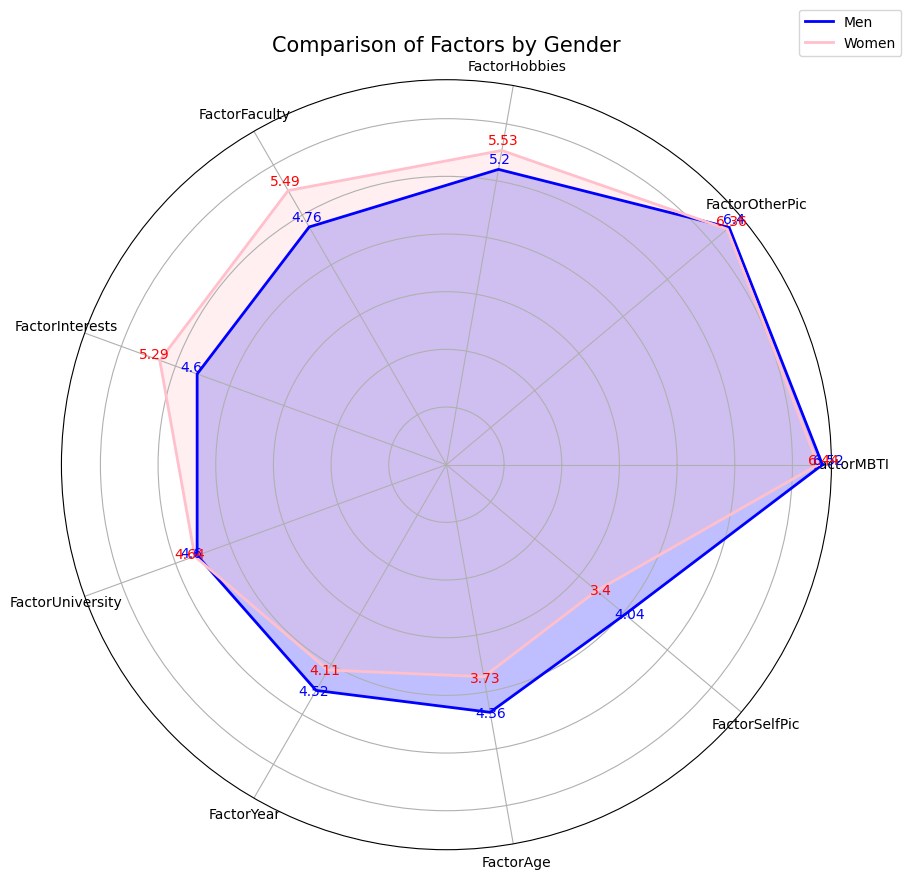

In [ ]:
# Categories and means for each gender
categories = men_mean.index
men_means = men_mean.values
women_means = women_mean.values

# Number of variables we're plotting
num_vars = len(categories)

# Compute angle for each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Repeat the first angle to close the circle

# Append the first value to close the chart for both men and women
men_means = np.append(men_means, men_means[0])
women_means = np.append(women_means, women_means[0])

# Set up the radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot men and women data
ax.plot(angles, men_means, color='blue', linewidth=2, linestyle='solid', label='Men')
ax.fill(angles, men_means, color='blue', alpha=0.25)

ax.plot(angles, women_means, color='pink', linewidth=2, linestyle='solid', label='Women')
ax.fill(angles, women_means, color='pink', alpha=0.25)

# Add labels and legend
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
ax.set_yticklabels([])  # Optional: Hide radial labels
ax.set_title('Comparison of Factors by Gender', size=15, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Annotate the values on the radar chart
for i in range(num_vars):
    # Round the values to 2 decimal places
    men_value = round(men_means[i], 2)
    women_value = round(women_means[i], 2)

    # Place the text slightly outside the radar chart
    ax.text(angles[i], men_means[i] + 0.1, str(men_value),
            horizontalalignment='center', color='blue', fontsize=10)
    ax.text(angles[i], women_means[i] + 0.1, str(women_value),
            horizontalalignment='center', color='red', fontsize=10)

plt.show()


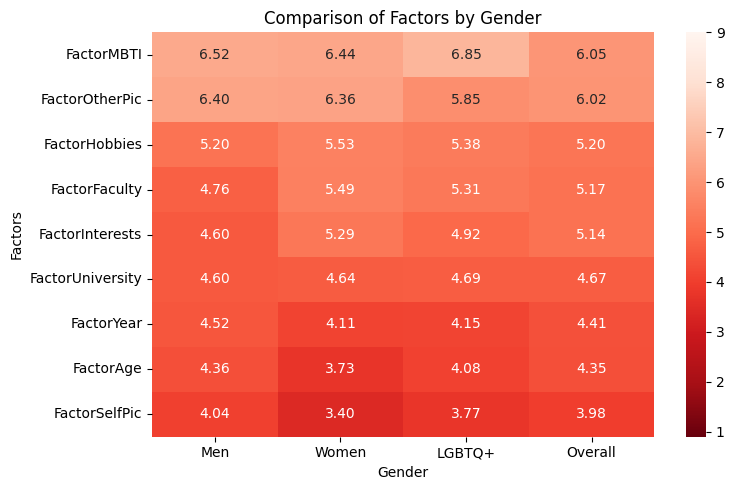

In [ ]:
# Categories and means for each gender
categories = men_mean.index
men_means = men_mean.values
women_means = women_mean.values
lgbt_means = lgbt_mean.values


# Create a DataFrame for the heatmap
data_means = pd.DataFrame({
    'Men': men_means,
    'Women': women_means,
    'LGBTQ+': lgbt_means,
    'Overall': overall_mean.values
}, index=categories)  # Set categories as the index

# Create the heatmap
plt.figure(figsize=(8, 5))  # Set the figure size
sns.heatmap(data_means, annot=True, cmap='Reds_r', fmt='.2f', cbar=True, vmin=9, vmax=1)  # Create heatmap with annotations
plt.title('Comparison of Factors by Gender')  # Add a title
plt.xlabel('Gender')  # Label for the x-axis
plt.ylabel('Factors')  # Label for the y-axis
plt.xticks(rotation=0)  # Rotate x labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()

In [ ]:
men_sorted = men_mean.sort_values(ascending=True).index
women_sorted = women_mean.sort_values(ascending=True).index
lgbt_sorted = lgbt_mean.sort_values(ascending=True).index

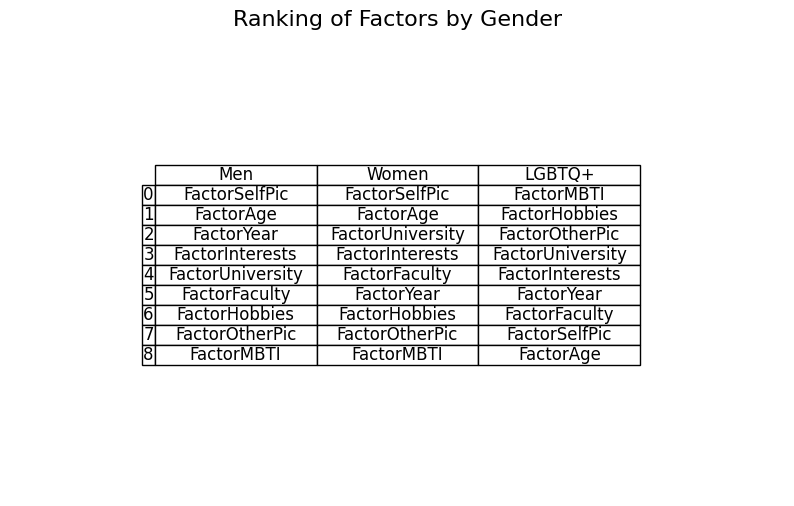

In [ ]:
# Create a DataFrame with the sorted factors for each gender
ranking_table = pd.DataFrame({
    'Men': men_sorted,
    'Women': women_sorted,
    'LGBTQ+': lgbt_sorted
})

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 6))

# Hide axes
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=ranking_table.values,
                 colLabels=ranking_table.columns,
                 rowLabels=ranking_table.index,
                 cellLoc = 'center',
                 loc='center')

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Scale table size
table.auto_set_column_width([0, 1, 2])  # Adjust column widths

# Set title
plt.title('Ranking of Factors by Gender', fontsize=16)

# Show the plot
plt.show()

<ipython-input-130-5976fb24b876>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(men_sorted.index, rotation=45, ha="right")
<ipython-input-130-5976fb24b876>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'#{men_ranks[i]}', ha='center', color='blue', fontsize=10)
<ipython-input-130-5976fb24b876>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(women_sorted.index, rotation=45, ha="right")
<ipython-input-130-5976fb24b876>:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integ

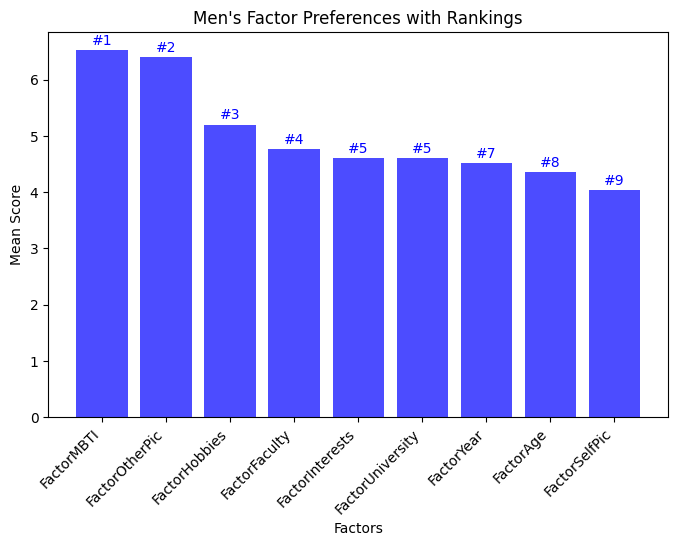

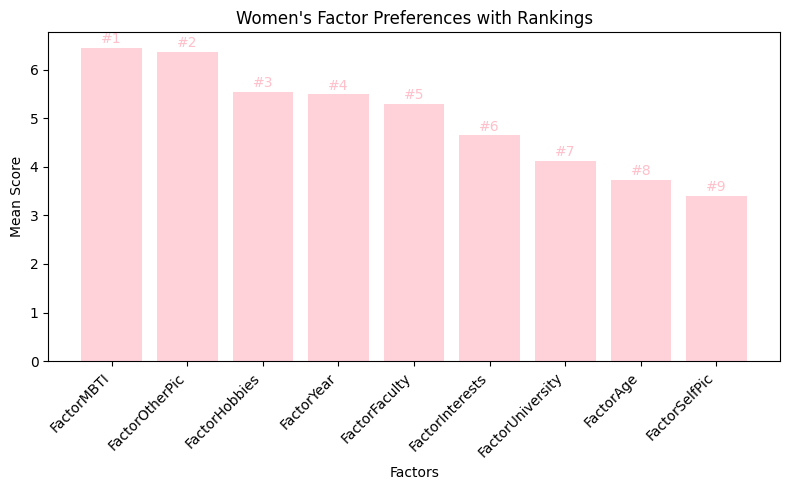

In [ ]:
# Sort means by value for each gender and rank them
men_sorted = men_mean.sort_values(ascending=False)
women_sorted = women_mean.sort_values(ascending=False)
men_ranks = men_sorted.rank(ascending=False, method='min').astype(int)
women_ranks = women_sorted.rank(ascending=False, method='min').astype(int)

# Plot for Men
fig, ax1 = plt.subplots(figsize=(8, 5))
bars_men = ax1.bar(men_sorted.index, men_sorted.values, color='blue', alpha=0.7)
ax1.set_title("Men's Factor Preferences with Rankings")
ax1.set_xlabel("Factors")
ax1.set_ylabel("Mean Score")
ax1.set_xticklabels(men_sorted.index, rotation=45, ha="right")

# Add rank annotations above each bar
for i, bar in enumerate(bars_men):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'#{men_ranks[i]}', ha='center', color='blue', fontsize=10)

# Plot for Women
fig, ax2 = plt.subplots(figsize=(8, 5))
bars_women = ax2.bar(women_sorted.index, women_sorted.values, color='pink', alpha=0.7)
ax2.set_title("Women's Factor Preferences with Rankings")
ax2.set_xlabel("Factors")
ax2.set_ylabel("Mean Score")
ax2.set_xticklabels(women_sorted.index, rotation=45, ha="right")

# Add rank annotations above each bar
for i, bar in enumerate(bars_women):
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'#{women_ranks[i]}', ha='center', color='pink', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
men_mean

FactorMBTI          6.52
FactorOtherPic      6.40
FactorHobbies       5.20
FactorFaculty       4.76
FactorInterests     4.60
FactorUniversity    4.60
FactorYear          4.52
FactorAge           4.36
FactorSelfPic       4.04
dtype: float64

In [ ]:
women_mean

FactorMBTI          6.444444
FactorOtherPic      6.355556
FactorHobbies       5.533333
FactorYear          5.488889
FactorFaculty       5.288889
FactorInterests     4.644444
FactorUniversity    4.111111
FactorAge           3.733333
FactorSelfPic       3.400000
dtype: float64

##### Pain by gender

In [ ]:
men_pain = used[used['Gender'] == 'M'][['PainDidntMatch', 'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo']]
women_pain = used[used['Gender'] == 'F'][['PainDidntMatch', 'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo']]
lgbt_pain = used[used['Gender'] == 'LGBTQ+'][['PainDidntMatch', 'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo']]

# men_pain_others = used[used['Gender']=='M']['PainOthers']
# women_pain_others = used[used['Gender']=='F']['PainOthers']
# lgbt_pain_others = used[used['Gender']=='LGBTQ+']['PainOthers']
overall_pain_others = used['PainOthers']

men_mean_pain = men_pain.mean().sort_values(ascending=False)
women_mean_pain = women_pain.mean().sort_values(ascending=False)
lgbt_mean_pain = lgbt_pain.mean().sort_values(ascending=False)
overall_mean_pain = used[['PainDidntMatch', 'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo']].mean().sort_values(ascending=False)

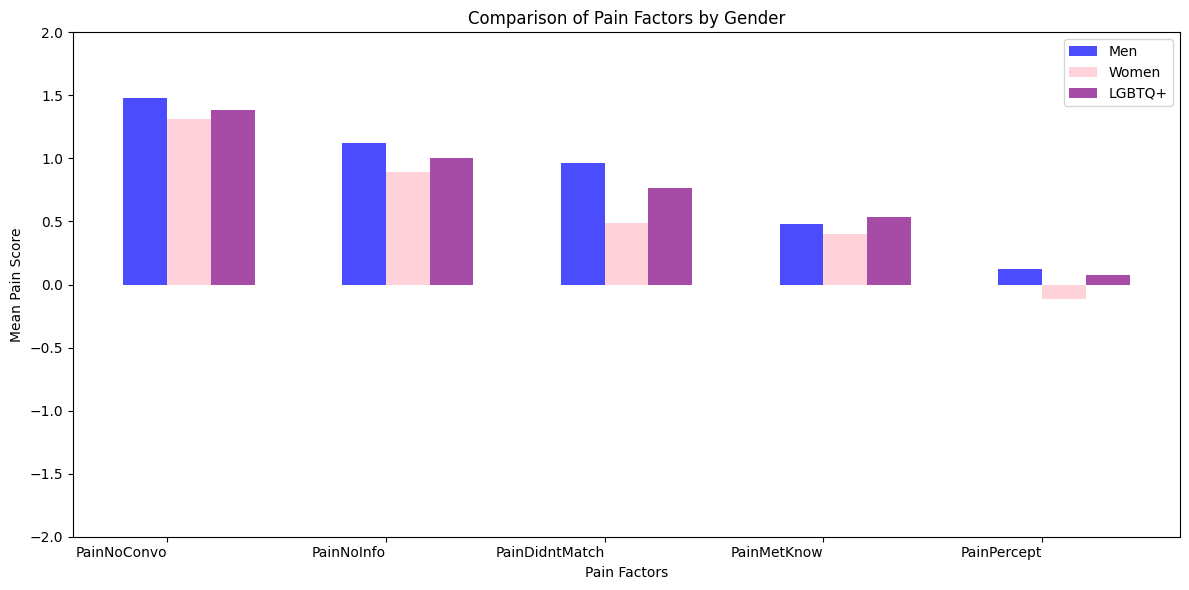

In [ ]:
# Get the pain factor categories
categories = men_mean_pain.index

# Set up positions and bar width for the grouped bar chart
index = np.arange(len(categories))
bar_width = 0.2

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for men and women
bars_men = ax.bar(index, men_mean_pain.values, bar_width, label='Men', color='blue', alpha=0.7)
bars_women = ax.bar(index + bar_width, women_mean_pain.values, bar_width, label='Women', color='pink', alpha=0.7)
bars_lgbt = ax.bar(index + 2 * bar_width, lgbt_mean_pain.values, bar_width, label='LGBTQ+', color='purple', alpha=0.7)

# Add labels and formatting
ax.set_xlabel('Pain Factors')
ax.set_ylabel('Mean Pain Score')
ax.set_title('Comparison of Pain Factors by Gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories, rotation=0, ha="right")
ax.set_ylim(-2, 2)  # Set y-axis range based on data range
ax.legend()

plt.tight_layout()
plt.show()

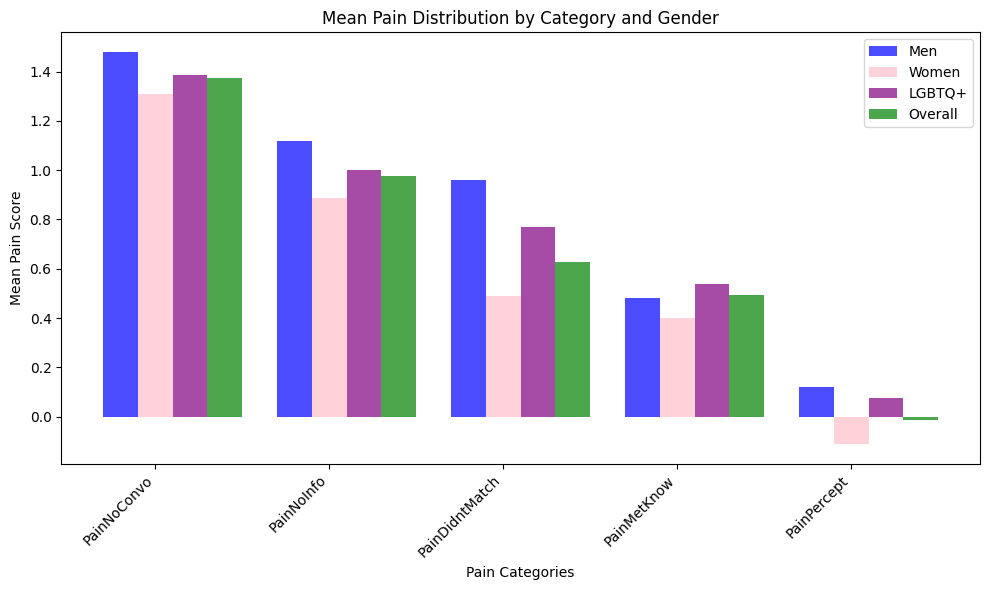

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
categories = men_mean_pain.index  # Use the index as categories
men_values = men_mean_pain.values
women_values = women_mean_pain.values
lgbt_values = lgbt_mean_pain.values
overall_values = overall_mean_pain.values

# Set up positions for the bars
x = np.arange(len(categories))
width = 0.2  # Width of each bar

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, men_values, width, label='Men', color='blue', alpha=0.7)
bars2 = ax.bar(x, women_values, width, label='Women', color='pink', alpha=0.7)
bars3 = ax.bar(x + width, lgbt_values, width, label='LGBTQ+', color='purple', alpha=0.7)
bars4 = ax.bar(x + 2*width, overall_values, width, label='Overall', color='green', alpha=0.7)

# Add labels and title
ax.set_xlabel('Pain Categories')
ax.set_ylabel('Mean Pain Score')
ax.set_title('Mean Pain Distribution by Category and Gender')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha="right")
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

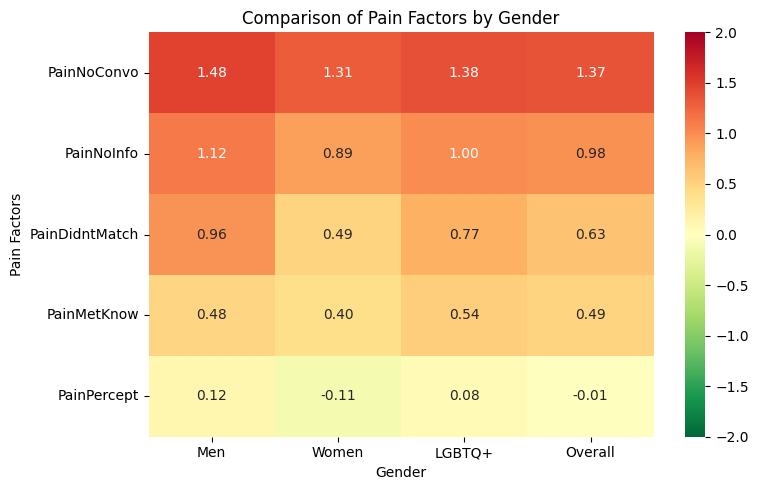

In [ ]:
# Get the pain factor categories
categories = men_mean_pain.index

# Create a DataFrame for the heatmap
data_pain_means = pd.DataFrame({
    'Men': men_mean_pain.values,
    'Women': women_mean_pain.values,
    'LGBTQ+': lgbt_mean_pain.values,
    'Overall': overall_mean_pain.values
}, index=categories)  # Set categories as the index

# Create the heatmap
plt.figure(figsize=(8, 5))  # Set the figure size
sns.heatmap(data_pain_means, annot=True, cmap='RdYlGn_r', fmt='.2f', cbar=True, vmin=-2, vmax=2)  # Create heatmap with annotations
plt.title('Comparison of Pain Factors by Gender')  # Add a title
plt.xlabel('Gender')  # Label for the x-axis
plt.ylabel('Pain Factors')  # Label for the y-axis
plt.xticks(rotation=0)  # Rotate x labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()


In [ ]:
overall_pain_others[overall_pain_others.notna()].tolist()

['เจอคนแปลกๆน่ากลัว',
 'catfishing',
 "People sometimes don't use their real pictures and put so much efforts to look aesthetic on social which contrast to their real lives ",
 'เจอคนรู้จัก+เสียภาพลักษณ์',
 'โดนอันแมชโดยไม่ทราบสาเหตุ คนที่คุยด้วยไม่ตอบแชท',
 'เอารูปปลอมมาใส่   มาเล่นเพื่อจุดประสงค์ไม่ดีอื่นๆ ซึ่งตามแต่ละคาแรคเตอร์ของแอปจะมี%ต่างกันในเรื่องนี้',
 'matchแล้วมีบทสนทนาเพียงแค่ไม่กี่วัน ก็จบแล้ว',
 'Avatar',
 'ไม่ตรงปก',
 'มีการเรียกใช้ค่าใช้จ่ายมากเกินไป',
 'ไม่ตรงปก',
 'Tinder can’t search university so it’s hard to see  each person by the way I use tinder platinum ',
 'ปัญหาทางเทคนิค',
 'การใช้โค้ดส่วนลดtinder gold แล้วเสี่ยงaccounted banned ',
 'ไม่มีการตอบกลับ',
 'Safety ครับ บางครั้งมันไม่สะอาด/อันตราย ครับ',
 'หาคนจริงจังได้ยาก',
 'แอปขึ้นคนเดิมซ้ำมาทั้งๆที่ปัดไปแล้ว',
 'ต่อบทสนทนาไม่ได้',
 'ไม่ตรงปก',
 'รูปไม่ตรงปก',
 'แมทช์แล้วไม่ค่อยคุย ภาพไม่ตรงปก',
 'คุยไม่เก่ง ไม่กล้าทัก',
 'ไม่ตรงปก',
 'รำคาญพวกแอคเค่อมุ่งนัดเยที่ไม่ใส่รูปไม่มีข้อมูลไรเลย เล่นทำไม😭']

PAIN OTHERS combined all genders: analyze by CHAT GPT

the answer can be grouped into these

Authenticity and Mismatched Expectations: (ส่วนมากคือไม่ตรงปก)

	'catfishing'
	"People sometimes don't use their real pictures and put so much efforts to look aesthetic on social which contrast to their real lives"
	'ไม่ตรงปก'
	'รูปไม่ตรงปก'
	'แมทช์แล้วไม่ค่อยคุย ภาพไม่ตรงปก'
	'เอารูปปลอมมาใส่ มาเล่นเพื่อจุดประสงค์ไม่ดีอื่นๆ ซึ่งตามแต่ละคาแรคเตอร์ของแอปจะมี%ต่างกันในเรื่องนี้'
	'Avatar'
Safety and Trust Issues:

	'เจอคนแปลกๆน่ากลัว'
	'Safety ครับ บางครั้งมันไม่สะอาด/อันตราย ครับ'
	'รำคาญพวกแอคเค่อมุ่งนัดเยที่ไม่ใส่รูปไม่มีข้อมูลไรเลย เล่นทำไม😭'
Lack of Serious Engagement:

	'หาคนจริงจังได้ยาก'
	'matchแล้วมีบทสนทนาเพียงแค่ไม่กี่วัน ก็จบแล้ว'
	'คุยไม่เก่ง ไม่กล้าทัก'
	'ไม่มีการตอบกลับ'
	'โดนอันแมชโดยไม่ทราบสาเหตุ คนที่คุยด้วยไม่ตอบแชท'
	'ต่อบทสนทนาไม่ได้'
Repetitive or Poor Matching Algorithms:

	'แอปขึ้นคนเดิมซ้ำมาทั้งๆที่ปัดไปแล้ว'
	'Tinder can’t search university so it’s hard to see each person by the way I use tinder platinum'
Reputation and Privacy Concerns:

	'เจอคนรู้จัก+เสียภาพลักษณ์'
Technical Issues:

	'ปัญหาทางเทคนิค'
	'การใช้โค้ดส่วนลดtinder gold แล้วเสี่ยงaccounted banned'
Monetization and Excessive Costs:

	'มีการเรียกใช้ค่าใช้จ่ายมากเกินไป'




#### Not Used

###### Why Not Use

In [ ]:
men_WhyNotUse = not_used[not_used['Gender'] == 'M']['WhyNotUse']
women_WhyNotUse = not_used[not_used['Gender'] == 'F']['WhyNotUse']
lgbt_WhyNotUse = not_used[not_used['Gender'] == 'LGBTQ+']['WhyNotUse']

In [ ]:
women_WhyNotUse

0                             [Prefer meeting in person]
1                             [Prefer meeting in person]
2      [Prefer meeting in person, Insecure or unconfi...
5      [Prefer meeting in person, Prefer developing r...
7      [Prefer meeting in person, Prefer developing r...
8      [People say it's bad or scary, Prefer meeting ...
11                            [Prefer meeting in person]
14     [Prefer meeting in person, Prefer developing r...
17     [Prefer meeting in person, Prefer developing r...
18                      [เจออุทาหรณ์จากคนรอบข้างเยอะมาก]
21     [Insecure or unconfident in using dating apps,...
22                            [Prefer meeting in person]
25     [Prefer meeting in person, Insecure or unconfi...
30     [Prefer developing relationship gradually, Afr...
31     [Prefer meeting in person, Prefer developing r...
36     [Prefer meeting in person, Insecure or unconfi...
37     [People say it's bad or scary, Prefer meeting ...
38     [Prefer developing relationship gradually, Ins...
39     [Prefer meeting in person, Prefer developing r...
40     [Prefer meeting in person, Prefer developing r...
41                            [Prefer meeting in person]
43     [Prefer developing relationship gradually, Ins...
47     [มีแฟนที่คบกันมานานก่อนที่จะอายุถึงในการอนุญาต...
48                            [Prefer meeting in person]
53     [Prefer meeting in person, Prefer developing r...
58     [Prefer meeting in person, Prefer developing r...
65     [People say it's bad or scary, Prefer meeting ...
70        [Afraid that someone you know might see you, ]
72                            [Prefer meeting in person]
75     [Prefer meeting in person, Prefer developing r...
76     [Prefer meeting in person, Prefer developing r...
83                        [People say it's bad or scary]
84                            [Prefer meeting in person]
87     [People say it's bad or scary, Prefer meeting ...
88                               [มีแฟนก่อนรู้จักแอพนี้]
91     [Prefer meeting in person, Prefer developing r...
93     [Prefer meeting in person, Prefer developing r...
104    [People say it's bad or scary, Prefer meeting ...
107    [People say it's bad or scary, Prefer developi...
111    [Prefer developing relationship gradually, Ins...
116    [People say it's bad or scary, Prefer meeting ...
119    [Prefer meeting in person, Prefer developing r...
120    [Prefer meeting in person, Insecure or unconfi...
134    [People say it's bad or scary, Prefer meeting ...
136    [Prefer developing relationship gradually, Afr...
137                           [Prefer meeting in person]
140    [Prefer meeting in person, Prefer developing r...
146    [People say it's bad or scary, ขี้เกียจลงทะเบียน]
149    [Prefer meeting in person, Prefer developing r...
151    [People say it's bad or scary, Prefer meeting ...
152    [Prefer meeting in person, Prefer developing r...
154                                    [ไม่รู้จะใช้ทำไม]
160    [Prefer meeting in person, Prefer developing r...
161    [Prefer meeting in person, Prefer developing r...
162    [Prefer meeting in person, Prefer developing r...
163           [Prefer developing relationship gradually]
165    [Prefer meeting in person, Prefer developing r...
169    [People say it's bad or scary, Prefer meeting ...
175    [People say it's bad or scary, Prefer meeting ...
Name: WhyNotUse, dtype: object

In [ ]:
men_score_map = {"People say it's bad or scary":0, "Prefer meeting in person":0, "Prefer developing relationship gradually":0, "Insecure or unconfident in using dating apps":0, "Afraid that someone you know might see you":0}
women_score_map = {"People say it's bad or scary":0, "Prefer meeting in person":0, "Prefer developing relationship gradually":0, "Insecure or unconfident in using dating apps":0, "Afraid that someone you know might see you":0}
lgbt_score_map = {"People say it's bad or scary":0, "Prefer meeting in person":0, "Prefer developing relationship gradually":0, "Insecure or unconfident in using dating apps":0, "Afraid that someone you know might see you":0}

Others_men_notUsed = []
Others_women_notUsed = []
Others_lgbt_notUsed = []

for each_list in men_WhyNotUse:
  for each in each_list:
    if each in men_score_map:
      men_score_map[each] += 1
    else:
      Others_men_notUsed.append(each.strip())

for each_list in women_WhyNotUse:
  for each in each_list:
    if each in women_score_map:
      women_score_map[each] += 1
    else:
      if each != '':
        Others_women_notUsed.append(each.strip())

for each_list in lgbt_WhyNotUse:
  for each in each_list:
    if each in lgbt_score_map:
      lgbt_score_map[each] += 1
    else:
      if each != '':
        Others_lgbt_notUsed.append(each.strip())

In [ ]:
print(men_score_map)

{"People say it's bad or scary": 5, 'Prefer meeting in person': 17, 'Prefer developing relationship gradually': 19, 'Insecure or unconfident in using dating apps': 9, 'Afraid that someone you know might see you': 8}


In [ ]:
print(women_score_map)

{"People say it's bad or scary": 13, 'Prefer meeting in person': 44, 'Prefer developing relationship gradually': 33, 'Insecure or unconfident in using dating apps': 16, 'Afraid that someone you know might see you': 21}


In [ ]:
print(lgbt_score_map)

{"People say it's bad or scary": 2, 'Prefer meeting in person': 3, 'Prefer developing relationship gradually': 4, 'Insecure or unconfident in using dating apps': 2, 'Afraid that someone you know might see you': 3}


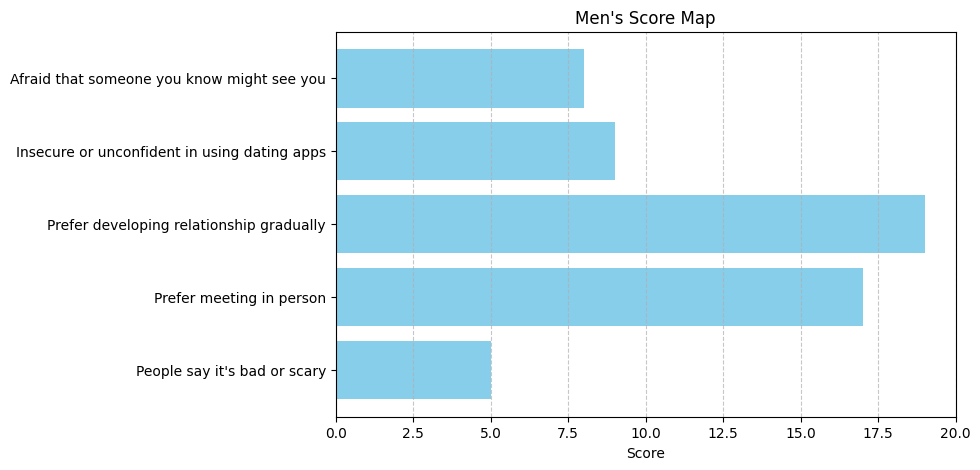

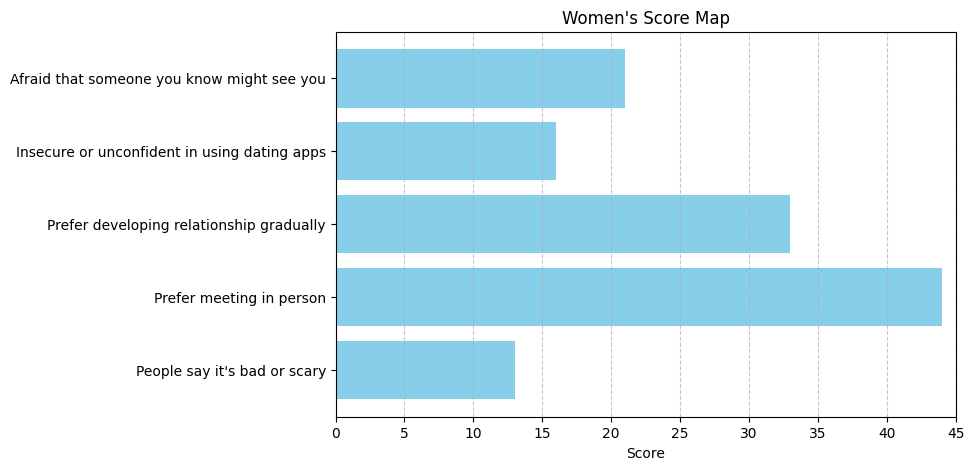

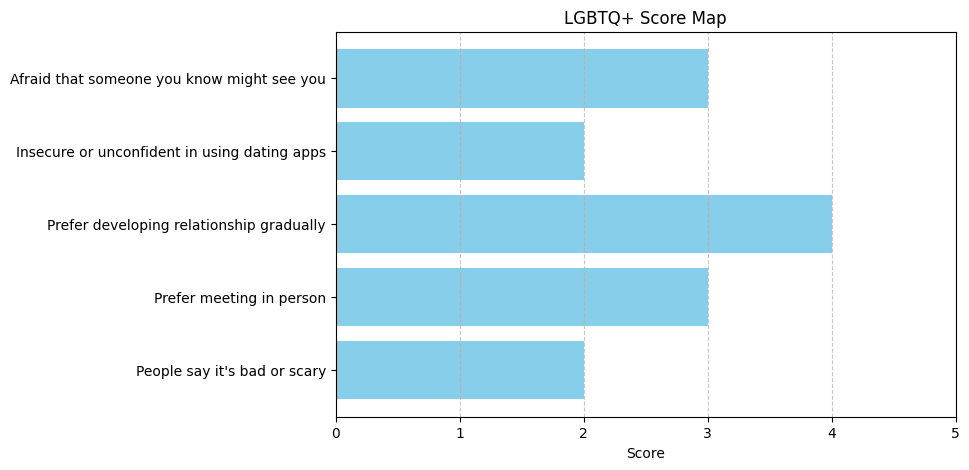

In [ ]:
def plot_score_map(score_map, title):
    categories = list(score_map.keys())
    scores = list(score_map.values())

    plt.figure(figsize=(8, 5))
    plt.barh(categories, scores, color='skyblue')
    plt.xlabel('Score')
    plt.title(title)
    plt.xlim(0, max(scores) + 1)  # Set x limit to make space for bars
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# Plotting the score maps
plot_score_map(men_score_map, "Men's Score Map")
plot_score_map(women_score_map, "Women's Score Map")
plot_score_map(lgbt_score_map, "LGBTQ+ Score Map")

In [ ]:
Others_men_notUsed

['คนดีๆที่ไหนจะเล่น',
 'ไม่รู้จะเล่นทำไม',
 'ไม่รู้สึกว่าความรักจะมาจากการใช้แิพหาคู่ได้ เหมือนวาาเราเหงามากกว่า']

In [ ]:
Others_women_notUsed

['เชื่อมั่นในผู้ 2d',
 'เจออุทาหรณ์จากคนรอบข้างเยอะมาก',
 'มีแฟนที่คบกันมานานก่อนที่จะอายุถึงในการอนุญาตใช้งานdating apps',
 'มีแฟนก่อนรู้จักแอพนี้',
 'ขี้เกียจลงทะเบียน',
 'ไม่รู้จะใช้ทำไม']

In [ ]:
Others_lgbt_notUsed

[]

# Theme

## More Info less attractive

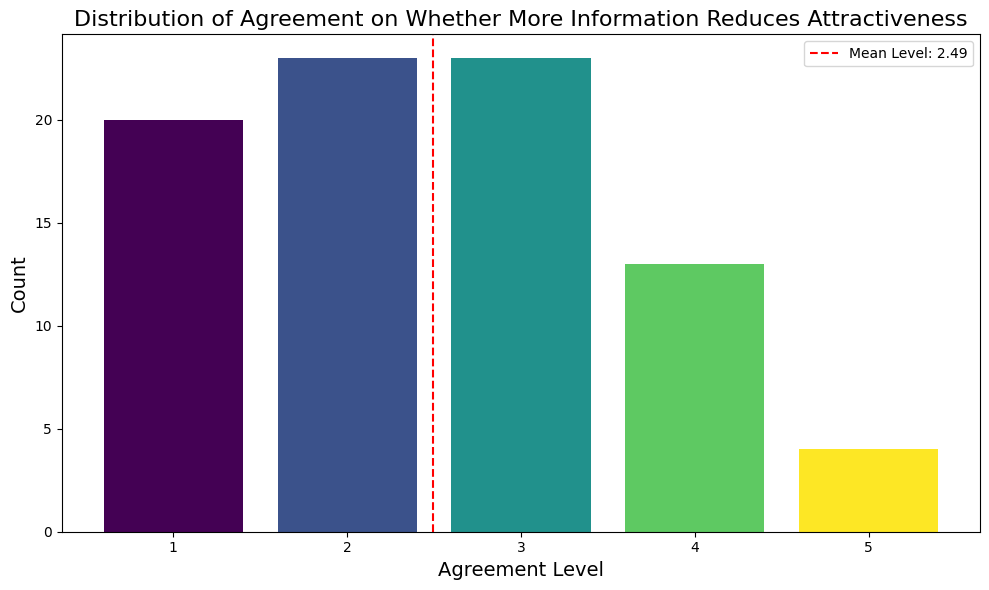

In [ ]:
more_info_counts = used['MoreInfoLessAttract'].value_counts().sort_index()

# Step 2: Calculate the mean of the x-values directly
mean_x_value = np.average(more_info_counts.index, weights=more_info_counts.values)

# Step 3: Define a color map based on the count values
colors = plt.cm.viridis(np.linspace(0, 1, len(more_info_counts)))

# Step 4: Plot the bar chart with specified colors
plt.figure(figsize=(10, 6))
bars = plt.bar(more_info_counts.index, more_info_counts.values, color=colors)

# Step 5: Add mean line vertically
plt.axvline(mean_x_value, color='red', linestyle='--', label=f'Mean Level: {mean_x_value:.2f}')

# Step 6: Add labels and title
plt.xlabel('Agreement Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Agreement on Whether More Information Reduces Attractiveness', fontsize=16)
plt.legend()

# Step 7: Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

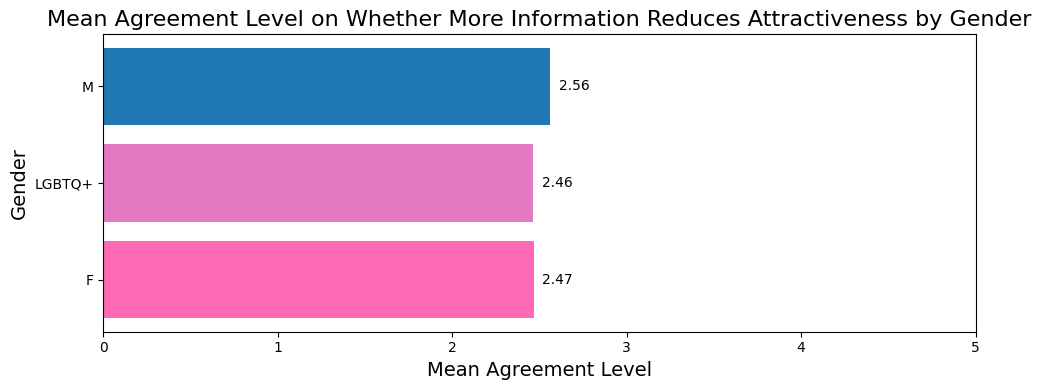

In [ ]:
# Step 1: Calculate the mean agreement level for each gender
gender_agreement_means = used.groupby('Gender')['MoreInfoLessAttract'].mean()

# Step 2: Define colors for each gender
gender_colors = {
    'M': '#1f77b4',      # Blue for Male
    'F': '#ff69b4',      # Pink for Female
    'LGBTQ+': '#e377c2'  # Purple for LGBTQ+
}

# Step 3: Create the horizontal bar chart with gender-specific colors
plt.figure(figsize=(10, 4))
bars = plt.barh(gender_agreement_means.index, gender_agreement_means.values,
                color=[gender_colors.get(gender, 'grey') for gender in gender_agreement_means.index])

# Add data labels on the right side of each bar
for bar in bars:
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center')

# Step 4: Add labels and title
plt.ylabel('Gender', fontsize=14)
plt.xlabel('Mean Agreement Level', fontsize=14)
plt.title('Mean Agreement Level on Whether More Information Reduces Attractiveness by Gender', fontsize=16)
plt.xlim(0, 5)  # Set x-axis limits

# Step 5: Show the plot
plt.tight_layout()
plt.show()


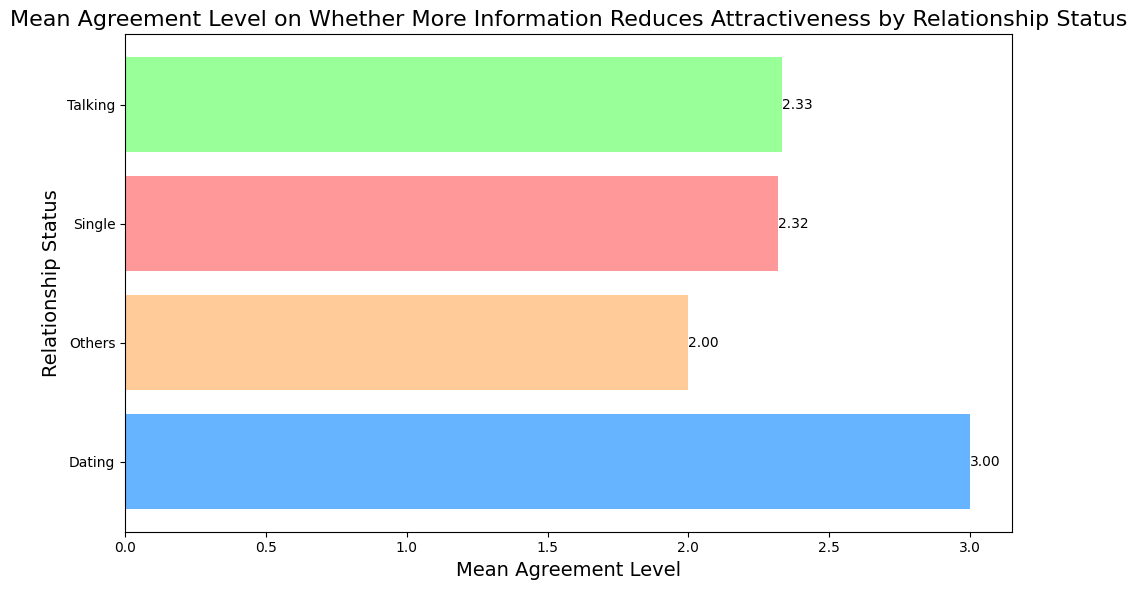

In [ ]:
# Step 1: Calculate the mean agreement level for each relationship status
status_agreement_means = used.groupby('Status')['MoreInfoLessAttract'].mean()

# Step 2: Define colors for each status
status_colors = {
    'Single': '#ff9999',      # Light Red for Single
    'Dating': '#66b3ff',      # Light Blue for Dating
    'Talking': '#99ff99',      # Light Green for Talking
    'Others': '#ffcc99'       # Light Orange for Others
}

# Step 3: Create the horizontal bar chart with status-specific colors
plt.figure(figsize=(10, 6))
bars = plt.barh(status_agreement_means.index, status_agreement_means.values,
                color=[status_colors.get(status, 'grey') for status in status_agreement_means.index])

# Add data labels to the right of each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             ha='left', va='center')

# Step 4: Add labels and title
plt.xlabel('Mean Agreement Level', fontsize=14)
plt.ylabel('Relationship Status', fontsize=14)
plt.title('Mean Agreement Level on Whether More Information Reduces Attractiveness by Relationship Status', fontsize=16)

# Step 5: Show the plot
plt.tight_layout()
plt.show()


## Faculty

### % used dating app of each faculty

In [ ]:
df.columns

Index(['Age', 'Gender', 'Year', 'Faculty', 'Major', 'Status', 'UsedDatingApp',
       'PurposeOfUse', 'FavApp', 'PreferredFeatures', 'FactorAge',
       'FactorFaculty', 'FactorYear', 'FactorInterests', 'FactorHobbies',
       'FactorMBTI', 'FactorUniversity', 'FactorSelfPic', 'FactorOtherPic',
       'BoughtSuperlike', 'BoughtSubscription', 'PainDidntMatch',
       'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo', 'PainOthers',
       'LimitDailyMatches', 'WillingToProvideInfo', 'MoreInfoLessAttract',
       'WhyNotUse', 'Explanation', 'LikelihoodToUse',
       'ReasonForUsingExclusiveApp'],
      dtype='object')

In [ ]:
used_count_by_faculty = used.groupby('Faculty')['Faculty'].count()
count_by_faculty = df.groupby('Faculty')['Faculty'].count()
print(used_count_by_faculty, count_by_faculty)

low_size_mask = (count_by_faculty >= 10)

count_by_faculty = count_by_faculty[low_size_mask]
used_count_by_faculty = used_count_by_faculty[low_size_mask]
used_percent_by_faculty = (used_count_by_faculty / count_by_faculty * 100).round(2)
print(used_percent_by_faculty)

Faculty
Account      10
Agri          1
Arch          7
Art           7
CommArts      8
Dent          3
Econ          4
Edu           2
Engi         17
FineArt       1
HealthSci     2
Law           3
Politic       3
Psyc          8
Sci           6
Vet           1
Name: Faculty, dtype: int64 Faculty
Account      26
Agri          1
Arch         15
Art          11
CommArts     11
Dent          8
Econ          5
Edu           3
Engi         48
FineArt       2
HealthSci     2
Inno          1
Law          10
Pharma        1
Politic       3
Psyc         16
Sci          13
Vet           1
Name: Faculty, dtype: int64
Faculty
Account     38.46
Arch        46.67
Art         63.64
CommArts    72.73
Engi        35.42
Law         30.00
Psyc        50.00
Sci         46.15
Name: Faculty, dtype: float64


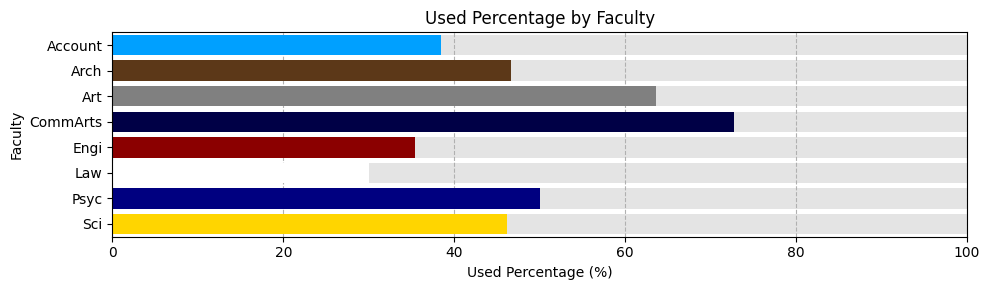

In [ ]:
# Define a color dictionary for each faculty with valid Matplotlib color names or hex codes
faculty_colors = {
    'Account': '#00a0ff',
    'Edu': 'orange',
    'CommArts': '#000046',       # dark navy
    'Psyc': 'navy',
    'Nursing': 'red',
    'Dent': 'purple',
    'Med': 'forestgreen',
    'Law': '#FFFFFF',            # white (will be visible only if border is added separately)
    'Pharma': 'lightgreen',
    'Politic': 'black',
    'Econ': 'gold',
    'Sci': '#ffd500',
    'Arch': '#5c3818',           # brown
    'Sport': '#FFA07A',          # light orange
    'HealthSci': '#8A2BE2',      # blueviolet
    'Engi': '#8B0000',           # deep red
    'Vet': '#ADD8E6',            # pale blue
    'FineArt': '#FF0000',        # bright red
    'Art': 'grey'
}

# Set the colors for each bar based on the faculty
colors = [faculty_colors.get(faculty, 'skyblue') for faculty in used_percent_by_faculty.index]

# Create a horizontal bar chart with grey background bars for remaining space
plt.figure(figsize=(10, 3))  # Set the figure size
ax = used_percent_by_faculty.plot(kind='barh', color=colors, zorder=2)  # Create horizontal bars with custom colors

# Set a grey background for the unused percentage area
for index, (faculty, value) in enumerate(used_percent_by_faculty.items()):
    ax.barh(index, 100, color='lightgrey', alpha=0.6, zorder=1)  # Full-length grey bar for 100%
    ax.barh(index, value, color=colors[index], zorder=2)  # Overlay colored bar for actual value

# Set x-axis to display percentage up to 100%
plt.xlim(0, 100)
plt.xlabel('Used Percentage (%)')  # Label for the x-axis
plt.ylabel('Faculty')  # Label for the y-axis
plt.title('Used Percentage by Faculty')  # Add a title
plt.grid(axis='x', linestyle='--', zorder=0)  # Add grid only for x-axis
plt.gca().invert_yaxis()  # Optional: Invert y-axis to show top-down order
plt.tight_layout()  # Adjust layout to prevent clipping

# Step 3: Show the plot
plt.show()



### Average Pain for each faculty

In [ ]:
# Assuming mean_pain_by_faculty is already calculated
mean_pain_by_faculty = used.groupby('Faculty')[['PainDidntMatch', 'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo']].mean()

# Filter with low_size_mask if it's defined
mean_pain_by_faculty = mean_pain_by_faculty[low_size_mask]

# Calculate overall mean across the filtered faculties
overall_mean = mean_pain_by_faculty.mean()

# Create a new DataFrame for the overall mean
overall_mean_df = pd.DataFrame(overall_mean).T
overall_mean_df.index = ['Overall']  # Set the index name

# Concatenate the overall mean with the existing DataFrame
mean_pain_by_faculty_with_overall = pd.concat([mean_pain_by_faculty, overall_mean_df])

# Print the updated DataFrame
print(mean_pain_by_faculty_with_overall)


          PainDidntMatch  PainNoConvo  PainMetKnow  PainPercept  PainNoInfo
Account         0.300000     1.400000     0.800000     0.000000    0.100000
Arch            0.000000     1.142857     1.142857     0.000000    0.857143
Art             0.142857     1.285714     0.000000     0.142857    1.142857
CommArts        1.375000     1.875000    -0.125000    -0.375000    1.250000
Engi            1.058824     1.529412     0.529412     0.352941    1.117647
Law             0.666667     1.666667     0.333333     0.000000    0.666667
Psyc            0.750000     1.125000    -0.375000    -0.250000    0.875000
Sci             1.000000     1.333333     1.166667     0.333333    1.500000
Overall         0.661668     1.419748     0.434034     0.025516    0.938664


<ipython-input-154-e19f6044083d>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_pain_by_faculty = mean_pain_by_faculty[low_size_mask]


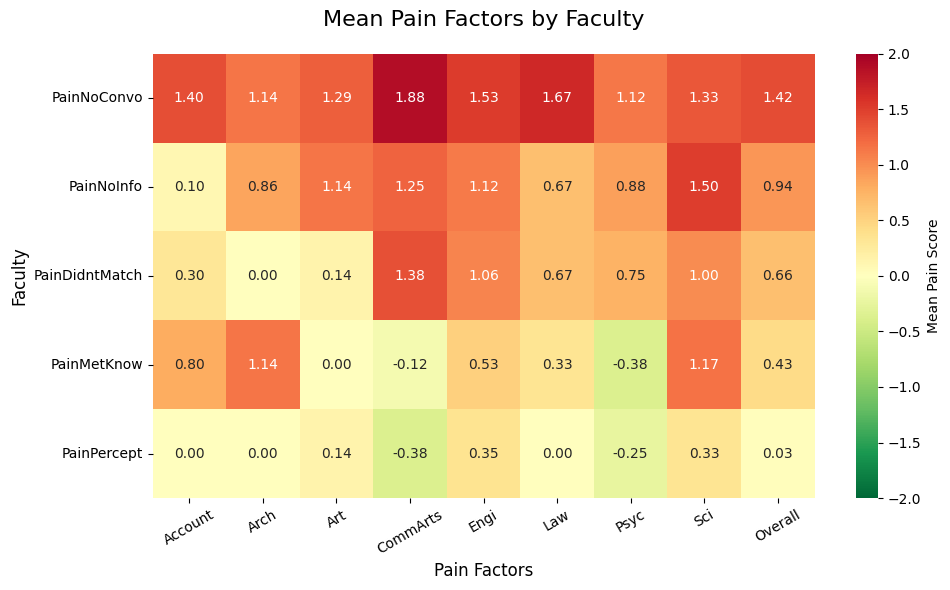

In [ ]:
# Set up the figure size for the heatmap
plt.figure(figsize=(10, 6))

# Create the heatmap with the custom color map
sns.heatmap(mean_pain_by_faculty_with_overall.T.sort_values(by='Overall', ascending=False),  # Transpose the DataFrame
            annot=True,
            cmap="RdYlGn_r",
            center=0,
            cbar_kws={'label': 'Mean Pain Score'},
            fmt=".2f",
            vmin=-2,
            vmax=2)

# Customize the plot
plt.title("Mean Pain Factors by Faculty", fontsize=16, pad=20)
plt.xlabel("Pain Factors", fontsize=12)
plt.ylabel("Faculty", fontsize=12)
plt.xticks(rotation=30)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to fit labels

# Display the heatmap
plt.show()


### Average Likelihood to use

In [ ]:
mean_likelihood_by_faculty = used.groupby('Faculty')['LikelihoodToUse'].mean()[low_size_mask]

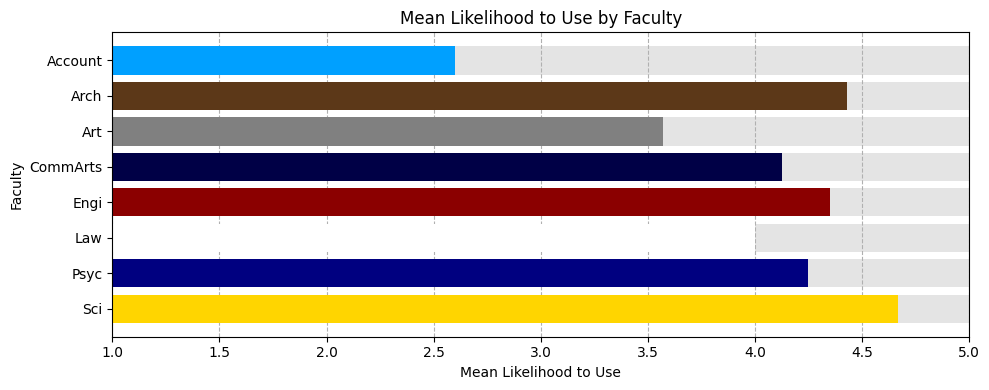

In [ ]:
faculty_colors = {
    'Account': '#00a0ff',
    'Edu': 'orange',
    'CommArts': '#000046',       # dark navy
    'Psyc': 'navy',
    'Nursing': 'red',
    'Dent': 'purple',
    'Med': 'forestgreen',
    'Law': '#FFFFFF',            # white (will be visible only if border is added separately)
    'Pharma': 'lightgreen',
    'Politic': 'black',
    'Econ': 'gold',
    'Sci': '#ffd500',
    'Arch': '#5c3818',           # brown
    'Sport': '#FFA07A',          # light orange
    'HealthSci': '#8A2BE2',      # blueviolet
    'Engi': '#8B0000',           # deep red
    'Vet': '#ADD8E6',            # pale blue
    'FineArt': '#FF0000',        # bright red
    'Art': 'grey'
}

# Set the colors for each bar based on the faculty
colors = [faculty_colors.get(faculty, 'skyblue') for faculty in mean_likelihood_by_faculty.index]

# Create a horizontal bar chart with grey background bars for remaining space
plt.figure(figsize=(10, 4))  # Set the figure size
ax = plt.barh(mean_likelihood_by_faculty.index, mean_likelihood_by_faculty.values, color=colors, zorder=2)  # Create horizontal bars

# Set a grey background for the unused percentage area
for index, value in enumerate(mean_likelihood_by_faculty.values):
    ax = plt.barh(mean_likelihood_by_faculty.index[index], 100, color='lightgrey', alpha=0.6, zorder=1)  # Full-length grey bar for 100%
    plt.barh(mean_likelihood_by_faculty.index[index], value, color=colors[index], zorder=2)  # Overlay colored bar for actual value


plt.xlim(1, 5)
plt.xlabel('Mean Likelihood to Use')  # Label for the x-axis
plt.ylabel('Faculty')  # Label for the y-axis
plt.title('Mean Likelihood to Use by Faculty')  # Add a title
plt.grid(axis='x', linestyle='--', zorder=0)  # Add grid only for x-axis
plt.gca().invert_yaxis()  # Invert y-axis to show top-down order
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()

## Major

### Average Pain

In [ ]:
# Assuming mean_pain_by_major is already calculated
mean_pain_by_major = used.groupby('Major')[['PainDidntMatch', 'PainNoConvo', 'PainMetKnow', 'PainPercept', 'PainNoInfo']].mean()

# Calculate overall mean across all majors
overall_mean = mean_pain_by_major.mean()

# Create a new DataFrame for the overall mean
overall_mean_df = pd.DataFrame(overall_mean).T
overall_mean_df.index = ['Overall']  # Set the index name

# Concatenate the overall mean with the existing DataFrame
mean_pain_by_major_with_overall = pd.concat([mean_pain_by_major, overall_mean_df])

# Print the updated DataFrame
print(mean_pain_by_major_with_overall)

         PainDidntMatch  PainNoConvo  PainMetKnow  PainPercept  PainNoInfo
Inter          0.833333     1.333333    -0.333333    -0.333333    0.833333
Thai           0.610390     1.376623     0.558442     0.012987    0.987013
Overall        0.721861     1.354978     0.112554    -0.160173    0.910173


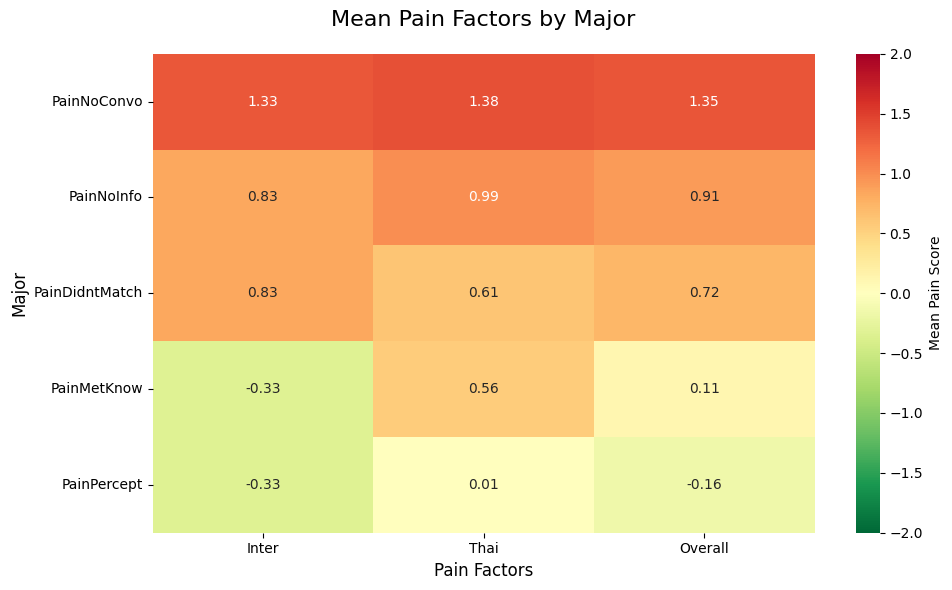

In [ ]:
# Set up the figure size for the heatmap
plt.figure(figsize=(10, 6))

# Create the heatmap with the custom color map
sns.heatmap(mean_pain_by_major_with_overall.T.sort_values(by='Overall', ascending=False), annot=True, cmap="RdYlGn_r", center=0,
            cbar_kws={'label': 'Mean Pain Score'}, fmt=".2f", vmin=-2, vmax=2)

# Customize the plot
plt.title("Mean Pain Factors by Major", fontsize=16, pad=20)  # Updated title
plt.xlabel("Pain Factors", fontsize=12)
plt.ylabel("Major", fontsize=12)  # Updated y-label
plt.tight_layout()  # Adjust layout to fit labels

# Display the heatmap
plt.show()


### %buy micro transactions

In [ ]:
bougth_slike_count_by_major = used[used['BoughtSuperlike'] == 1].groupby('Major')['Major'].count()
count_by_major = used.groupby('Major')['Major'].count()
print("--Bougth Superlikes--\n", bougth_slike_count_by_major)
print("--------Total--------\n", count_by_major)


slike_percent_by_major = (bougth_slike_count_by_major / count_by_major * 100).round(2)
print("-----Use Rate(%)-----\n", slike_percent_by_major)

--Bougth Superlikes--
 Major
Inter     1
Thai     11
Name: Major, dtype: int64
--------Total--------
 Major
Inter     6
Thai     77
Name: Major, dtype: int64
-----Use Rate(%)-----
 Major
Inter    16.67
Thai     14.29
Name: Major, dtype: float64


insufficient sample size

In [ ]:
bougth_sub_count_by_major = used[used['BoughtSubscription'] == 1].groupby('Major')['Major'].count()
print("--Bougth Subscription--\n", bougth_sub_count_by_major)
print("--------Total--------\n", count_by_major)


sub_percent_by_major = (bougth_sub_count_by_major / count_by_major * 100).round(2)
print("-----Use Rate(%)-----\n", sub_percent_by_major)

--Bougth Subscription--
 Major
Inter     4
Thai     34
Name: Major, dtype: int64
--------Total--------
 Major
Inter     6
Thai     77
Name: Major, dtype: int64
-----Use Rate(%)-----
 Major
Inter    66.67
Thai     44.16
Name: Major, dtype: float64


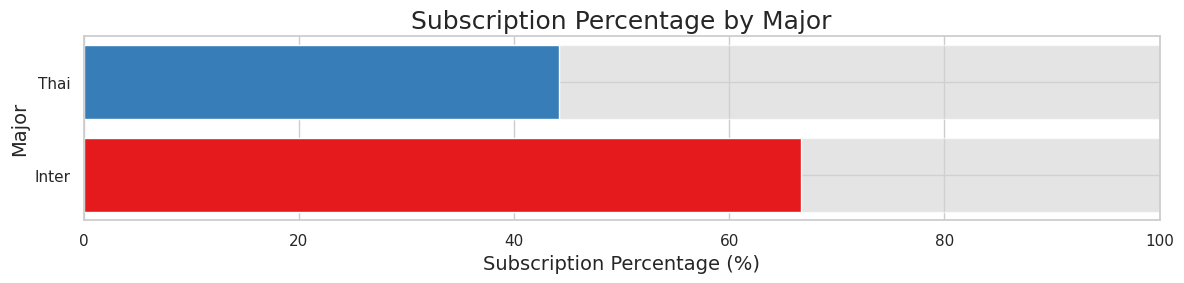

In [ ]:
sns.set(style='whitegrid')  # Use a clean grid style

plt.figure(figsize=(12, 3))  # Set the figure size

# Get colors from the 'Set1' palette
set1_colors = sns.color_palette("Set1", n_colors=len(sub_percent_by_major))

# Create horizontal bars for subscription percentage by major with specified colors
# Create the grey background bars for the unused percentage area (assuming max is 100)
for index, value in enumerate(sub_percent_by_major.values):
    plt.barh(sub_percent_by_major.index[index], 100, color='lightgrey', alpha=0.6, zorder=1)  # Full-length grey bar for 100%
    plt.barh(sub_percent_by_major.index[index], value, color=set1_colors[index], zorder=2)  # Overlay colored bar for actual value

# Add labels and title
plt.ylabel('Major', fontsize=14)
plt.xlabel('Subscription Percentage (%)', fontsize=14)
plt.title('Subscription Percentage by Major', fontsize=18)


plt.xlim(0, 100)  # Set the x-axis limit to 100
plt.tight_layout()  # Adjust layout to fit labels

# Show the plot
plt.show()

## Likelihood to use

Status
Dating     2.976190
Single     3.526786
Talking    3.055556
Name: LikelihoodToUse, dtype: float64
Status
Dating      42
Others       5
Single     112
Talking     18
Name: LikelihoodToUse, dtype: int64


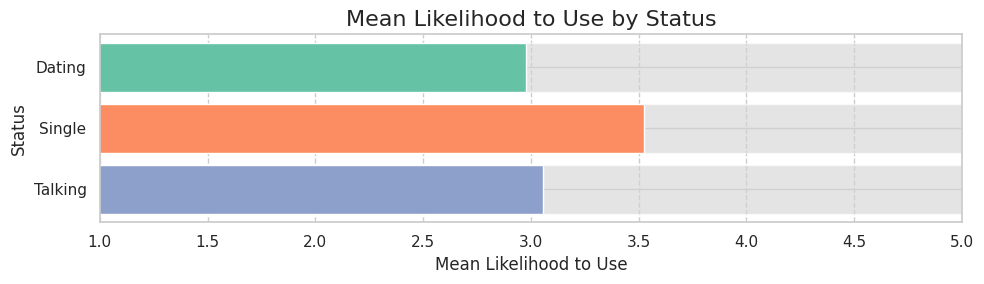

In [ ]:
# Group by 'Status' and calculate the mean likelihood to use
status_likely = df[df['Status'] != 'Others'].groupby('Status')['LikelihoodToUse'].mean()

print(status_likely)
print(df.groupby('Status')['LikelihoodToUse'].count())

# Set up the figure size for the plot
plt.figure(figsize=(10, 3))  # Set the figure size

# Get colors from the 'Set1' palette
set1_colors = sns.color_palette("Set2", n_colors=len(status_likely))

# Create horizontal bars for the mean Likelihood to Use by Status with specified colors
# First, create the grey background bars for the unused percentage area
for index, value in enumerate(status_likely.values):
    plt.barh(status_likely.index[index], 5, color='lightgrey', alpha=0.6, zorder=1)  # Full-length grey bar for 5 (max value)
    plt.barh(status_likely.index[index], value, color=set1_colors[index], zorder=2)  # Overlay colored bar for actual value

# Set the x-axis limit to 5
plt.xlim(1, 5)  # Set maximum limit to 5

# Add labels and title
plt.xlabel('Mean Likelihood to Use', fontsize=12)  # Corrected x-axis label
plt.ylabel('Status', fontsize=12)  # Corrected y-axis label
plt.title('Mean Likelihood to Use by Status', fontsize=16)

plt.gca().invert_yaxis()  # Invert y-axis to show top-down order
plt.grid(axis='x', linestyle='--', zorder=0)  # Add grid only for x-axis
plt.tight_layout()  # Adjust layout to fit labels

# Show the plot
plt.show()


Gender
F         3.432836
LGBTQ+    3.666667
M         3.666667
Name: LikelihoodToUse, dtype: float64
Gender
F         67
LGBTQ+    12
M         33
Name: LikelihoodToUse, dtype: int64


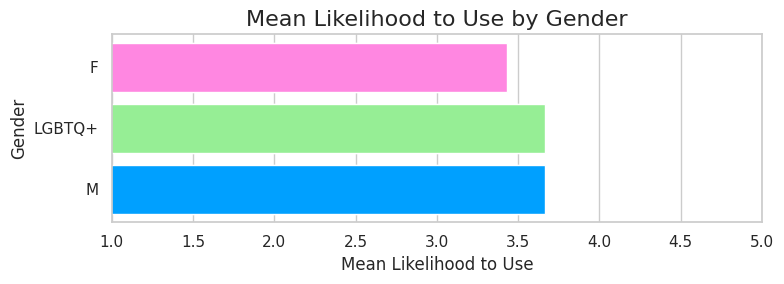

In [ ]:
# Group by 'Gender' and calculate the mean of 'LikelihoodToUse'
sns.set(style='whitegrid')
gender_likely = df[df['Status'] == 'Single'].groupby('Gender')['LikelihoodToUse'].mean()
print(gender_likely)
print(df[df['Status'] == 'Single'].groupby('Gender')['LikelihoodToUse'].count())

# Set up the figure size for the plot
plt.figure(figsize=(8, 3))

# Define colors for each gender category
colors = ['#00a0ff' if gender == 'M' else '#ff87e1' if gender == 'F' else '#96ee95' for gender in gender_likely.index]

# Create a horizontal bar plot for mean Likelihood to Use by Gender with specified colors
sns.barplot(x=gender_likely.values, y=gender_likely.index, color='gray', orient='h')  # Use a single color here

# Customize the bars with the specific colors
for i in range(len(gender_likely)):
    plt.barh(i, gender_likely.values[i], color=colors[i])

# Set the x-axis limit to 5
plt.xlim(1, 5)  # Set maximum limit to 5

# Add labels and title
plt.xlabel('Mean Likelihood to Use', fontsize=12)  # Corrected x-axis label
plt.ylabel('Gender', fontsize=12)  # Corrected y-axis label
plt.title('Mean Likelihood to Use by Gender', fontsize=16)

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


Faculty
Account     2.857143
Arch        4.000000
Art         3.250000
CommArts    4.000000
Engi        3.709677
Law         3.000000
Psyc        3.272727
Sci         4.000000
Name: LikelihoodToUse, dtype: float64


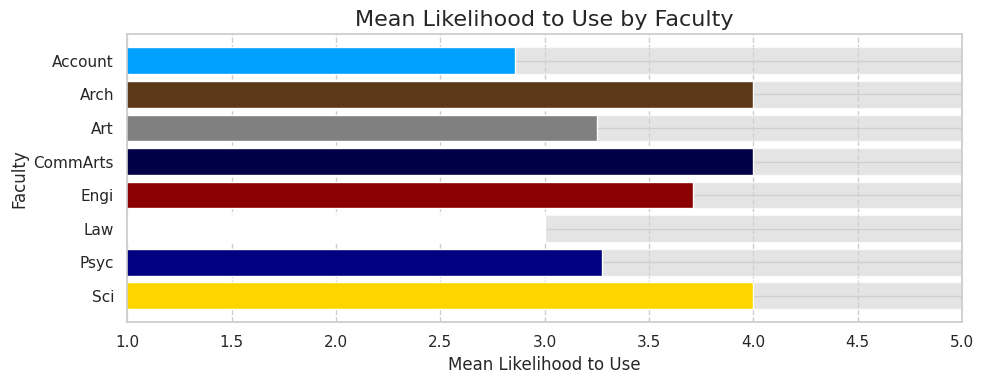

In [ ]:
# Assuming you have a low_size_mask and faculty colors defined
faculty_colors = {
    'Account': '#00a0ff',
    'Edu': 'orange',
    'CommArts': '#000046',       # dark navy
    'Psyc': 'navy',
    'Nursing': 'red',
    'Dent': 'purple',
    'Med': 'forestgreen',
    'Law': '#FFFFFF',            # white (will be visible only if border is added separately)
    'Pharma': 'lightgreen',
    'Politic': 'black',
    'Econ': 'gold',
    'Sci': '#ffd500',
    'Arch': '#5c3818',           # brown
    'Sport': '#FFA07A',          # light orange
    'HealthSci': '#8A2BE2',      # blueviolet
    'Engi': '#8B0000',           # deep red
    'Vet': '#ADD8E6',            # pale blue
    'FineArt': '#FF0000',        # bright red
    'Art': 'grey'
}

# Calculate mean likelihood to use by faculty, applying the low_size_mask
faculty_likely = df[df['Status'] == 'Single'].groupby('Faculty')['LikelihoodToUse'].mean()[low_size_mask]

print(faculty_likely)

# Set up the figure size for the plot
plt.figure(figsize=(10, 4))  # Set the figure size

# Define colors for each faculty category based on the predefined dictionary
colors = [faculty_colors[faculty] for faculty in faculty_likely.index]

# Create horizontal bars for the mean Likelihood to Use by Faculty with specified colors
# First, create the grey background bars for the unused percentage area
for index, value in enumerate(faculty_likely.values):
    plt.barh(faculty_likely.index[index], 5, color='lightgrey', alpha=0.6, zorder=1)  # Full-length grey bar for 5 (max value)
    plt.barh(faculty_likely.index[index], value, color=colors[index], zorder=2)  # Overlay colored bar for actual value

# Set the x-axis limit to 5
plt.xlim(1, 5)  # Set maximum limit to 5

# Add labels and title
plt.xlabel('Mean Likelihood to Use', fontsize=12)  # Corrected x-axis label
plt.ylabel('Faculty', fontsize=12)  # Corrected y-axis label
plt.title('Mean Likelihood to Use by Faculty', fontsize=16)

plt.gca().invert_yaxis()  # Invert y-axis to show top-down order
plt.grid(axis='x', linestyle='--', zorder=0)  # Add grid only for x-axis
plt.tight_layout()  # Adjust layout to fit labels

# Show the plot
plt.show()



Major
Inter    3.000000
Thai     3.614583
Name: LikelihoodToUse, dtype: float64


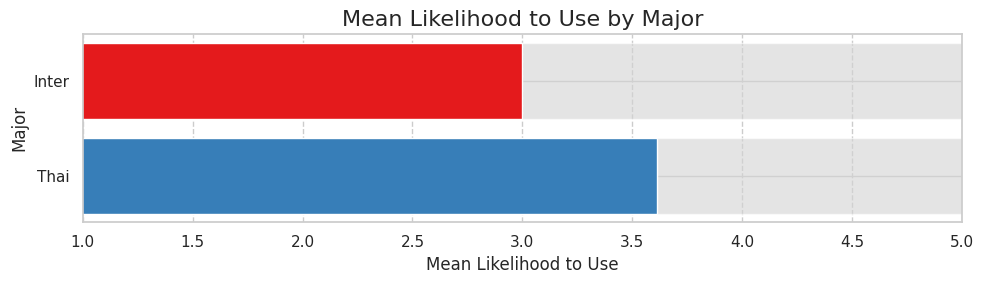

In [ ]:
major_likely = df[df['Status'] == 'Single'].groupby('Major')['LikelihoodToUse'].mean()

print(major_likely)

# Set up the figure size for the plot
plt.figure(figsize=(10, 3))  # Set the figure size

# Get colors from the 'Set1' palette
set1_colors = sns.color_palette("Set1", n_colors=len(major_likely))

# Create horizontal bars for the mean Likelihood to Use by Major with specified colors
# First, create the grey background bars for the unused percentage area
for index, value in enumerate(major_likely.values):
    plt.barh(major_likely.index[index], 5, color='lightgrey', alpha=0.6, zorder=1)  # Full-length grey bar for 5 (max value)
    plt.barh(major_likely.index[index], value, color=set1_colors[index], zorder=2)  # Overlay colored bar for actual value

# Set the x-axis limit to 5
plt.xlim(1, 5)  # Set maximum limit to 5

# Add labels and title
plt.xlabel('Mean Likelihood to Use', fontsize=12)  # Corrected x-axis label
plt.ylabel('Major', fontsize=12)  # Corrected y-axis label
plt.title('Mean Likelihood to Use by Major', fontsize=16)

plt.gca().invert_yaxis()  # Invert y-axis to show top-down order
plt.grid(axis='x', linestyle='--', zorder=0)  # Add grid only for x-axis
plt.tight_layout()  # Adjust layout to fit labels

# Show the plot
plt.show()

# Purpose of Use and Preferred App correlation

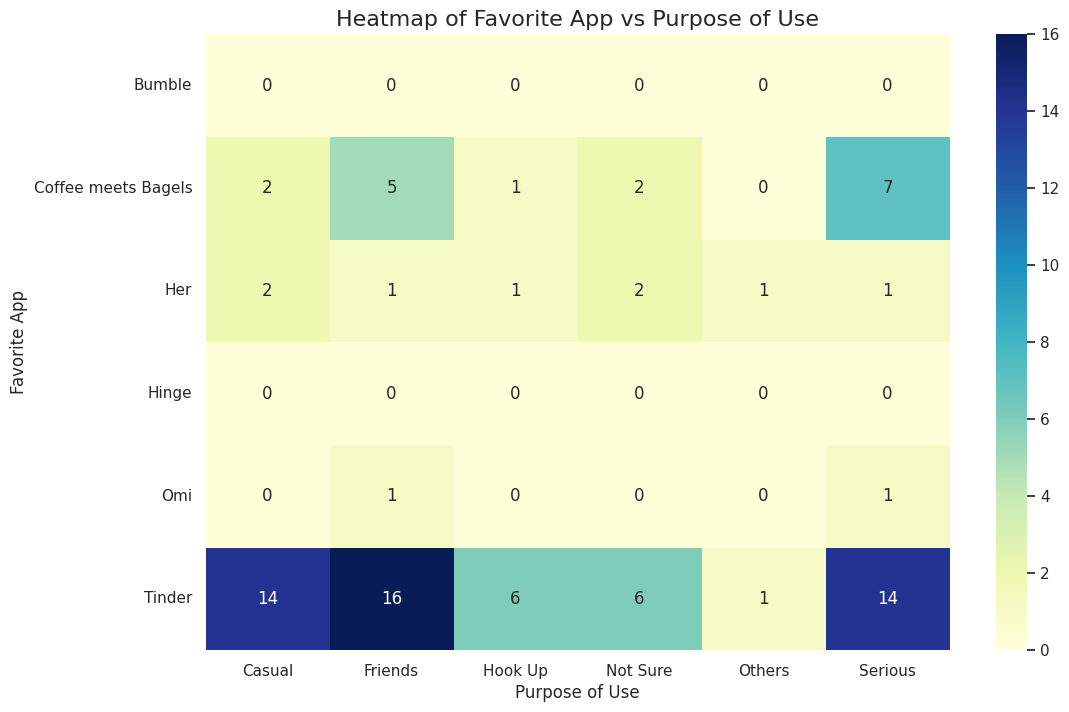

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
# Step 1: Use MultiLabelBinarizer to one-hot encode the PurposeOfUse
mlb = MultiLabelBinarizer()
purpose_one_hot = mlb.fit_transform(used['PurposeOfUse'])

# Create a DataFrame for the one-hot encoded purposes
purpose_df = pd.DataFrame(purpose_one_hot, columns=mlb.classes_)

# Step 2: Combine with FavApp
combined_df = pd.concat([df['FavApp'], purpose_df], axis=1)

# Step 3: Create a contingency table
heatmap_data = combined_df.groupby('FavApp').sum()

# Set up the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', cbar=True)

# Add labels and title
plt.xlabel('Purpose of Use', fontsize=12)
plt.ylabel('Favorite App', fontsize=12)
plt.title('Heatmap of Favorite App vs Purpose of Use', fontsize=16)

# Show the plot
plt.show()

